## Business Understanding

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specializes in lending various types of loans to urban customers. You have to use EDA to analyze the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company:

- **Approved**: The Company has approved loan Application.

- **Cancelled**: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.

- **Refused**: The company had rejected the loan (because the client does not meet their requirements etc.).

- **Unused offer**: Loan has been cancelled by the client but at different he tendency to default.
he tendency to default.
.

##### Dataset Information

1. 'application_data.csv'  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.

Importing all the required libraries

In [6]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# pd.set_option("display.max_columns",None)
# pd.set_option("display.max_rows",None)

### Data Sourcing

In [9]:
#Importing the application datase
df = pd.read_csv("application_data.csv")
df.head(20)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
1       100003       0         Cash loans           F            N   
2       100004       0    Revolving loans           M            Y   
3       100006       0         Cash loans           F            N   
4       100007       0         Cash loans           M            N   
5       100008       0         Cash loans           M            N   
6       100009       0         Cash loans           F            Y   
7       100010       0         Cash loans           M            Y   
8       100011       0         Cash loans           F            N   
9       100012       0    Revolving loans           M            N   
10      100014       0         Cash loans           F            N   
11      100015       0         Cash loans           F            N   
12      100016       0         Cash loans           F            N   
13      100017       0         Cash loans           M            Y   
14      100018       0         Cash loans           F            N   
15      100019       0         Cash loans           M            Y   
16      100020       0         Cash loans           M            N   
17      100021       0    Revolving loans           F            N   
18      100022       0    Revolving loans           F            N   
19      100023       0         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0        202500.000    406597.5      24700.5   
1                N             0        270000.000   1293502.5      35698.5   
2                Y             0         67500.000    135000.0       6750.0   
3                Y             0        135000.000    312682.5      29686.5   
4                Y             0        121500.000    513000.0      21865.5   
5                Y             0         99000.000    490495.5      27517.5   
6                Y             1        171000.000   1560726.0      41301.0   
7                Y             0        360000.000   1530000.0      42075.0   
8                Y             0        112500.000   1019610.0      33826.5   
9                Y             0        135000.000    405000.0      20250.0   
10               Y             1        112500.000    652500.0      21177.0   
11               Y             0         38419.155    148365.0      10678.5   
12               Y             0         67500.000     80865.0       5881.5   
13               N             1        225000.000    918468.0      28966.5   
14               Y             0        189000.000    773680.5      32778.0   
15               Y             0        157500.000    299772.0      20160.0   
16               N             0        108000.000    509602.5      26149.5   
17               Y             1         81000.000    270000.0      13500.0   
18               Y             0        112500.000    157500.0       7875.0   
19               Y             1         90000.000    544491.0      17563.5   

    ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0   ...                 0                0                0                0   
1   ...                 0                0                0                0   
2   ...                 0                0                0                0   
3   ...                 0                0                0                0   
4   ...                 0                0                0                0   
5   ...                 0                0                0                0   
6   ...                 0                0                0                0   
7   ...                 0                0                0                0   
8   ...                 0                0                0                0   
9   ...                 0                0                0              

Determinning the characteristics of the dataset

In [11]:
#Checking the shape of the datatset
df.shape

(307511, 122)

In [12]:
#Checking the information of the dataset using info()
df.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [13]:
#Checking descriptive statistics of the columns using describe() function
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [14]:
#Checking the columns name from the dataset
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

### Data Cleaning

In this step we will first identify the total number if missing values. Then we check what will be the best feasible way to deal the missing values

Cleaning the missing values

In [18]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

# The above syntax is used to show number of columns and row as they were not coming as full.

In [19]:
#Displaying the null value count
null_df = df.isnull().sum()
null_df

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [20]:
#Checking the overall percent of missing data
nullpercent_df = df.apply(lambda x: round(100 * x.isnull().sum() / len(df), 2))
nullpercent_df

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [21]:
#Remove the empty row greater than 40% of null values.

remove = list(nullpercent_df[nullpercent_df.values>=40].index)
df.drop(labels=remove,axis=1,inplace=True)
print(len(remove))

49


In [22]:
df.shape

(307511, 73)

We have removed the columns with more than 40% of missing values as we can't determine the insights with the almost half of missing values

In [24]:
# pd.set_option("display.max_columns",None)
# pd.set_option("display.max_rows",None)

In [25]:
#Checking again the missing values
df.apply(lambda x: round(100 * x.isnull().sum() / len(df), 2)).sort_values(ascending = False)

OCCUPATION_TYPE                31.35
EXT_SOURCE_3                   19.83
AMT_REQ_CREDIT_BUREAU_YEAR     13.50
AMT_REQ_CREDIT_BUREAU_QRT      13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
AMT_REQ_CREDIT_BUREAU_WEEK     13.50
AMT_REQ_CREDIT_BUREAU_DAY      13.50
AMT_REQ_CREDIT_BUREAU_HOUR     13.50
NAME_TYPE_SUITE                 0.42
OBS_30_CNT_SOCIAL_CIRCLE        0.33
DEF_30_CNT_SOCIAL_CIRCLE        0.33
OBS_60_CNT_SOCIAL_CIRCLE        0.33
DEF_60_CNT_SOCIAL_CIRCLE        0.33
EXT_SOURCE_2                    0.21
AMT_GOODS_PRICE                 0.09
FLAG_DOCUMENT_7                 0.00
DAYS_LAST_PHONE_CHANGE          0.00
FLAG_DOCUMENT_2                 0.00
FLAG_DOCUMENT_3                 0.00
FLAG_DOCUMENT_4                 0.00
FLAG_DOCUMENT_5                 0.00
FLAG_DOCUMENT_6                 0.00
FLAG_DOCUMENT_11                0.00
FLAG_DOCUMENT_8                 0.00
FLAG_DOCUMENT_9                 0.00
FLAG_DOCUMENT_10                0.00
LIVE_CITY_NOT_WORK_CITY         0.00
F

We have now successfully deleted the missing value with more than 40%. We will now check the variables with missing and determine if it is feasible to impute them or not.

Before that we need to remove few columns which we will not be required for our analysis

In [27]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [28]:
useless_col = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13','FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
               'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
               'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'FLAG_EMAIL', 
               'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',  'EXT_SOURCE_2', "EXT_SOURCE_3" ]

# Dropping the columns
df.drop(columns=useless_col, inplace=True)
df.shape


(307511, 43)

We deleted the above columns as there were not much importance

In [30]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEE

In [31]:
nullpercent_df_new = df.apply(lambda x: round(100 * x.isnull().sum() / len(df), 2))

nullpercent_df_new[(nullpercent_df_new<=15) & (nullpercent_df_new>0)].sort_values(ascending=False)

AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
NAME_TYPE_SUITE                0.42
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
AMT_GOODS_PRICE                0.09
dtype: float64

We will now analyse every variables with the missing values

In [33]:
#Checking for the unique value counts
df["AMT_REQ_CREDIT_BUREAU_HOUR"].value_counts()

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: count, dtype: int64

In [34]:
#imputing the missing values
df["AMT_REQ_CREDIT_BUREAU_HOUR"].fillna(0,inplace = True)
df["AMT_REQ_CREDIT_BUREAU_HOUR"].value_counts()

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    305885
1.0      1560
2.0        56
3.0         9
4.0         1
Name: count, dtype: int64

The variable seems categorical in nature. So we will repalce the missing values with 0 which is the most common answer.

In [36]:
print("Before Imputation: ",df["AMT_REQ_CREDIT_BUREAU_DAY"].value_counts())
df["AMT_REQ_CREDIT_BUREAU_DAY"].fillna(0,inplace = True)
print("After Imputation: ", df["AMT_REQ_CREDIT_BUREAU_DAY"].value_counts())

Before Imputation:  AMT_REQ_CREDIT_BUREAU_DAY
0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: count, dtype: int64
After Imputation:  AMT_REQ_CREDIT_BUREAU_DAY
0.0    306022
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: count, dtype: int64


In [37]:
print("Before Imputation: ",df["AMT_REQ_CREDIT_BUREAU_WEEK"].value_counts())
df["AMT_REQ_CREDIT_BUREAU_WEEK"].fillna(0,inplace = True)
print("After Imputation: ", df["AMT_REQ_CREDIT_BUREAU_WEEK"].value_counts())

Before Imputation:  AMT_REQ_CREDIT_BUREAU_WEEK
0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: count, dtype: int64
After Imputation:  AMT_REQ_CREDIT_BUREAU_WEEK
0.0    298975
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: count, dtype: int64


In [38]:
print("Before Imputation: ",df["AMT_REQ_CREDIT_BUREAU_MON"].value_counts())
df["AMT_REQ_CREDIT_BUREAU_MON"].fillna(0,inplace = True)
print("After Imputation: ", df["AMT_REQ_CREDIT_BUREAU_MON"].value_counts())

Before Imputation:  AMT_REQ_CREDIT_BUREAU_MON
0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: count, dtype: int64
After Imputation:  AMT_REQ_CREDIT_BUREAU_MON
0.0     263752
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: count, dtype: int64


In [39]:
print("Before Imputation: ",df["AMT_REQ_CREDIT_BUREAU_QRT"].value_counts())
df["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(0,inplace = True)
print("After Imputation: ", df["AMT_REQ_CREDIT_BUREAU_QRT"].value_counts())

Before Imputation:  AMT_REQ_CREDIT_BUREAU_QRT
0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: count, dtype: int64
After Imputation:  AMT_REQ_CREDIT_BUREAU_QRT
0.0      256936
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: count, dtype: int64


In [40]:
print("Before Imputation: ",df["AMT_REQ_CREDIT_BUREAU_YEAR"].value_counts())
df["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(0,inplace = True)
print("After Imputation: ", df["AMT_REQ_CREDIT_BUREAU_YEAR"].value_counts())

Before Imputation:  AMT_REQ_CREDIT_BUREAU_YEAR
0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: count, dtype: int64
After Imputation:  AMT_REQ_CREDIT_BUREAU_YEAR
0.0     113320
1.0      63405
2.0      50192
3.0      33628
4.0      20714
5.0      12052
6.0       6967
7.0       3869
8.0       2127
9.0       1096
11.0        31
12.0        30
10.0        22
13.0        19
14.0        10
17.0         7
15.0         6
19.0         4
18.0         4
16.0         3
25.0         1
23.0         1
22.0         1
21.0         1
20.0         1
Name: count, dtype: int64


We have imputed all the missing values with the mode of the partcular variable to handle the missing values

In [42]:
df.NAME_TYPE_SUITE.value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [43]:
df["NAME_TYPE_SUITE"].fillna("Unaccompanied",inplace = True)
df.NAME_TYPE_SUITE.value_counts()

NAME_TYPE_SUITE
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [44]:
df.OBS_30_CNT_SOCIAL_CIRCLE.value_counts()

OBS_30_CNT_SOCIAL_CIRCLE
0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
25.0         11
24.0         11
27.0          5
26.0          3
30.0          2
28.0          1
29.0          1
47.0          1
348.0         1
Name: count, dtype: int64

In [45]:
df["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(0,inplace = True)
df.OBS_30_CNT_SOCIAL_CIRCLE.value_counts()

OBS_30_CNT_SOCIAL_CIRCLE
0.0      164931
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
25.0         11
24.0         11
27.0          5
26.0          3
30.0          2
28.0          1
29.0          1
47.0          1
348.0         1
Name: count, dtype: int64

In [46]:
df.DEF_30_CNT_SOCIAL_CIRCLE.value_counts()

DEF_30_CNT_SOCIAL_CIRCLE
0.0     271324
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
7.0          1
34.0         1
8.0          1
Name: count, dtype: int64

In [47]:
df["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(0,inplace = True)
df.DEF_30_CNT_SOCIAL_CIRCLE.value_counts()

DEF_30_CNT_SOCIAL_CIRCLE
0.0     272345
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
7.0          1
34.0         1
8.0          1
Name: count, dtype: int64

In [48]:
df.OBS_60_CNT_SOCIAL_CIRCLE.value_counts()

OBS_60_CNT_SOCIAL_CIRCLE
0.0      164666
1.0       48870
2.0       29766
3.0       20215
4.0       13946
5.0        9463
6.0        6349
7.0        4344
8.0        2886
9.0        1959
10.0       1335
11.0        837
12.0        620
13.0        401
14.0        238
15.0        166
16.0        137
17.0         73
18.0         49
19.0         44
20.0         30
21.0         28
22.0         20
23.0         13
24.0         12
25.0         11
27.0          5
29.0          2
28.0          1
47.0          1
344.0         1
30.0          1
26.0          1
Name: count, dtype: int64

In [49]:
df["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(0,inplace = True)
df.OBS_60_CNT_SOCIAL_CIRCLE.value_counts()

OBS_60_CNT_SOCIAL_CIRCLE
0.0      165687
1.0       48870
2.0       29766
3.0       20215
4.0       13946
5.0        9463
6.0        6349
7.0        4344
8.0        2886
9.0        1959
10.0       1335
11.0        837
12.0        620
13.0        401
14.0        238
15.0        166
16.0        137
17.0         73
18.0         49
19.0         44
20.0         30
21.0         28
22.0         20
23.0         13
24.0         12
25.0         11
27.0          5
29.0          2
28.0          1
47.0          1
344.0         1
30.0          1
26.0          1
Name: count, dtype: int64

In [50]:
df.DEF_60_CNT_SOCIAL_CIRCLE.value_counts()

DEF_60_CNT_SOCIAL_CIRCLE
0.0     280721
1.0      21841
2.0       3170
3.0        598
4.0        135
5.0         20
6.0          3
7.0          1
24.0         1
Name: count, dtype: int64

In [51]:
df["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(0,inplace = True)
df.DEF_60_CNT_SOCIAL_CIRCLE.value_counts() 

DEF_60_CNT_SOCIAL_CIRCLE
0.0     281742
1.0      21841
2.0       3170
3.0        598
4.0        135
5.0         20
6.0          3
7.0          1
24.0         1
Name: count, dtype: int64

In [52]:
df.AMT_GOODS_PRICE.value_counts()

AMT_GOODS_PRICE
450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
180000.0     10123
454500.0      9157
1125000.0     9050
135000.0      8206
315000.0      5225
1350000.0     5037
679500.0      4824
238500.0      4696
360000.0      4553
247500.0      4318
463500.0      3873
540000.0      3763
495000.0      3463
202500.0      3222
90000.0       3169
405000.0      2954
472500.0      2828
157500.0      2704
585000.0      2647
337500.0      2501
229500.0      2438
112500.0      2170
630000.0      2164
1800000.0     2146
720000.0      1922
1575000.0     1875
688500.0      1824
292500.0      1708
148500.0      1674
477000.0      1611
810000.0      1568
67500.0       1505
697500.0      1408
382500.0      1396
765000.0      1396
904500.0      1375
283500.0      1372
252000.0      1368
234000.0      1279
45000.0       1169
945000.0      1161
855000.0      1113
1129500.0     1109
913500.0      1065
328500.0      1059
459000.0      1023
193500.0      1

In [53]:
df["AMT_GOODS_PRICE"].fillna(450000,inplace = True)
df.AMT_GOODS_PRICE.value_counts() 

AMT_GOODS_PRICE
450000.0     26300
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
180000.0     10123
454500.0      9157
1125000.0     9050
135000.0      8206
315000.0      5225
1350000.0     5037
679500.0      4824
238500.0      4696
360000.0      4553
247500.0      4318
463500.0      3873
540000.0      3763
495000.0      3463
202500.0      3222
90000.0       3169
405000.0      2954
472500.0      2828
157500.0      2704
585000.0      2647
337500.0      2501
229500.0      2438
112500.0      2170
630000.0      2164
1800000.0     2146
720000.0      1922
1575000.0     1875
688500.0      1824
292500.0      1708
148500.0      1674
477000.0      1611
810000.0      1568
67500.0       1505
697500.0      1408
382500.0      1396
765000.0      1396
904500.0      1375
283500.0      1372
252000.0      1368
234000.0      1279
45000.0       1169
945000.0      1161
855000.0      1113
1129500.0     1109
913500.0      1065
328500.0      1059
459000.0      1023
193500.0      1

In [54]:
nullpercent_df_new1 = df.apply(lambda x: round(100 * x.isnull().sum() / len(df), 2))

nullpercent_df_new1[(nullpercent_df_new1<=15) & (nullpercent_df_new1>0)].sort_values(ascending=False)

Series([], dtype: float64)

We have imputed all the missing values with their respective mode. Here all the variable are categorical in nature so we have replaced them all with the mode

##### Analysing the variables

We will check the data type of each variable and convert them into suitable type if required

In [58]:
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.075110e+05   
mean   5.990260e+05   27108.573909     5.383163e+05   
std    4.024908e+05   14493.737315     3.692890e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
count      307511.000000    307511.000000    307509.000000   
mean        -4986.120328     -2994.202373         2.152665   
std          3522.886321      1509.450419         0.910682   
min        -24672.000000     -7197.000000         1.000000   
25%         -7479.500000     -4299.000000         2.000000   
50%         -4504.000000     -3254.000000         2.000000   
75%         -2010.000000     -1720.000000         3.000000   
max             0.000000         0.000000        20.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            307511.000000               307511.000000   
mean                 12.063419                    0.015144   
std                   3.265832                    0.122126   
min                   0.000000                    0.000000   
25%                  10.000000                    0.000000   
50%                  12.000000                    0.000000   
75%                  14.000000                    0.000000   
max                  23.000000                    1.000000   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
count               307511.000000                307511.000000   
mean                     0.050769                     0.040659   
std                      0.219526                     0.197499   
min                      0.000000                     0.000000   
25%                      0.000000                     0.000000   
50%                      0.000000                     0.000000   
75%                      0.000000                     0.000000   
max                      1.000000                     1.000000   

       REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
count           307511.000000           307511.000000   
mean                 0.078173                0.230454   
std                  0.268444                0.421124   
min                  0.000000                0.000000   
25%                  0.000000                0.000000   
50%                  0.000000                0.000000   
75%                  0.000000                0.000000   
max                  1.000000                1.000000   

       LIVE_CITY_NOT_WORK_CITY  OB

In [59]:
#Checking the Data Type of the columns
df.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGIO

There are lot of variables with data type wrongly distinguished. We will now convert the data types in their proper format.

In [61]:
x = [
"OBS_30_CNT_SOCIAL_CIRCLE",
"DEF_30_CNT_SOCIAL_CIRCLE",
"OBS_60_CNT_SOCIAL_CIRCLE",
"DEF_60_CNT_SOCIAL_CIRCLE",
"DAYS_LAST_PHONE_CHANGE",
"AMT_REQ_CREDIT_BUREAU_HOUR",
"AMT_REQ_CREDIT_BUREAU_DAY",
"AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_MON",
"AMT_REQ_CREDIT_BUREAU_QRT",
"AMT_REQ_CREDIT_BUREAU_YEAR",
"TARGET",
"NAME_CONTRACT_TYPE",
"CODE_GENDER",
"FLAG_OWN_CAR",
"FLAG_OWN_REALTY",
"CNT_CHILDREN",
"NAME_TYPE_SUITE",
"NAME_INCOME_TYPE",
"NAME_EDUCATION_TYPE",
"NAME_FAMILY_STATUS",
"NAME_HOUSING_TYPE",
"OCCUPATION_TYPE",
"WEEKDAY_APPR_PROCESS_START",
"HOUR_APPR_PROCESS_START",
"REG_REGION_NOT_LIVE_REGION",
"REG_REGION_NOT_WORK_REGION",
"LIVE_REGION_NOT_WORK_REGION",
"REG_CITY_NOT_LIVE_CITY",
"REG_CITY_NOT_WORK_CITY",
"LIVE_CITY_NOT_WORK_CITY",
"ORGANIZATION_TYPE",
"OBS_30_CNT_SOCIAL_CIRCLE",
"DEF_30_CNT_SOCIAL_CIRCLE",
"OBS_60_CNT_SOCIAL_CIRCLE",
"DEF_60_CNT_SOCIAL_CIRCLE",
"CNT_FAM_MEMBERS",
]

for i in x:
    df[i] = df[i].astype('category')

In [62]:
#Checking the data type again
df.dtypes

SK_ID_CURR                        int64
TARGET                         category
NAME_CONTRACT_TYPE             category
CODE_GENDER                    category
FLAG_OWN_CAR                   category
FLAG_OWN_REALTY                category
CNT_CHILDREN                   category
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                category
NAME_INCOME_TYPE               category
NAME_EDUCATION_TYPE            category
NAME_FAMILY_STATUS             category
NAME_HOUSING_TYPE              category
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OCCUPATION_TYPE                category
CNT_FAM_MEMBERS                category
WEEKDAY_APPR_PROCESS_START     category
HOUR_APPR_PROCESS_START        category


In [63]:
df["SK_ID_CURR"].head(50)

0     100002
1     100003
2     100004
3     100006
4     100007
5     100008
6     100009
7     100010
8     100011
9     100012
10    100014
11    100015
12    100016
13    100017
14    100018
15    100019
16    100020
17    100021
18    100022
19    100023
20    100024
21    100025
22    100026
23    100027
24    100029
25    100030
26    100031
27    100032
28    100033
29    100034
30    100035
31    100036
32    100037
33    100039
34    100040
35    100041
36    100043
37    100044
38    100045
39    100046
40    100047
41    100048
42    100049
43    100050
44    100051
45    100052
46    100053
47    100054
48    100055
49    100056
Name: SK_ID_CURR, dtype: int64

In [64]:
#the variable doesnt seems to fit as int type. We will convert it to object.
df["SK_ID_CURR"] = df["SK_ID_CURR"].astype("object")

We have now cleaned the missing value and standardised the data type. Now we will analyse the variable and try to find information from them

In [66]:
#Checking the descriptive statistics of the numeric varibales
df.describe()

AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count      3.075110e+05  3.075110e+05  307499.000000     3.075110e+05   
mean       1.687979e+05  5.990260e+05   27108.573909     5.383163e+05   
std        2.371231e+05  4.024908e+05   14493.737315     3.692890e+05   
min        2.565000e+04  4.500000e+04    1615.500000     4.050000e+04   
25%        1.125000e+05  2.700000e+05   16524.000000     2.385000e+05   
50%        1.471500e+05  5.135310e+05   24903.000000     4.500000e+05   
75%        2.025000e+05  8.086500e+05   34596.000000     6.795000e+05   
max        1.170000e+08  4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  
count      307511.000000    307511.000000  
mean        -4986.120328     -2994.202373  
std          3522.886321      1509.450419  
min        -24672.000000     -7197.000000  
25%         -7479.500000     -4299.000000  
50%         -4504.000000     -3254.000000  
75%         -2010.000000     -1720.000000  
max             0.000000         0.000000

From the descritive statistic above we can see that we have few negative value as well for few columns. We will now fix them 

In [68]:
df["DAYS_BIRTH"] = df["DAYS_BIRTH"].abs()
df["DAYS_EMPLOYED"] = df["DAYS_EMPLOYED"].abs()
df["DAYS_REGISTRATION"] = df["DAYS_REGISTRATION"].abs()
df["DAYS_ID_PUBLISH"] = df["DAYS_ID_PUBLISH"].abs()

In [69]:
df[['DAYS_BIRTH' ,'DAYS_EMPLOYED' ,'DAYS_REGISTRATION' ,'DAYS_ID_PUBLISH']].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
count  307511.000000  307511.000000      307511.000000    307511.000000
mean    16036.995067   67724.742149        4986.120328      2994.202373
std      4363.988632  139443.751806        3522.886321      1509.450419
min      7489.000000       0.000000           0.000000         0.000000
25%     12413.000000     933.000000        2010.000000      1720.000000
50%     15750.000000    2219.000000        4504.000000      3254.000000
75%     19682.000000    5707.000000        7479.500000      4299.000000
max     25229.000000  365243.000000       24672.000000      7197.000000

We converted the negative to positive value using the abs() function

In [71]:
df["YEAR_BIRTH"] = df["DAYS_BIRTH"].apply(lambda x: round(x / 365, 0))

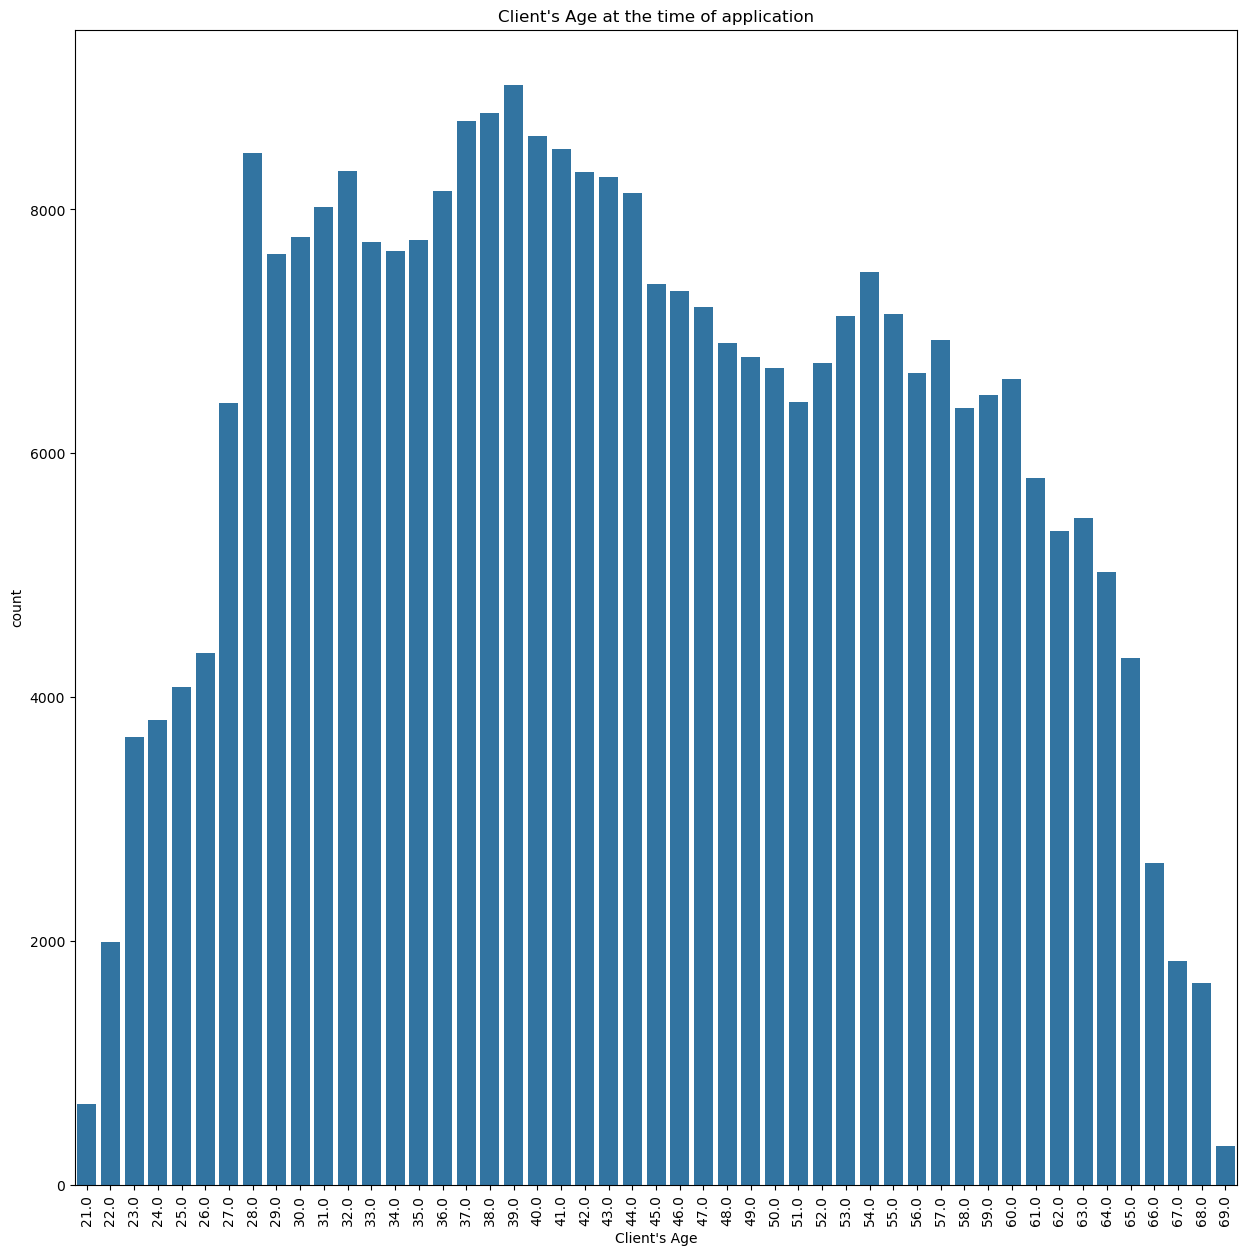

In [72]:
plt.figure(figsize=(15,15))
sns.countplot(x = df["YEAR_BIRTH"]).set_xlabel("Client's Age")
plt.xticks(rotation=90)
plt.title("Client's Age at the time of application")
# plt.savefig('YEAR_BIRTH.png', bbox_inches='tight')
plt.show()

We can determine that most of the clients are in their 30's or early 40's.

In [74]:
df["YEAR_EMPLOYED"] = df["DAYS_EMPLOYED"].apply(lambda x: round(x / 365, 0))

In [75]:
df["YEAR_REGISTRATION"] = df["DAYS_REGISTRATION"].apply(lambda x: round(x / 365, 0))

In [76]:
df["YEAR_ID_PUBLISH"] = df["DAYS_ID_PUBLISH"].apply(lambda x: round(x / 365, 0))

We converted the days to year as it will be very difficult to read the days

In [78]:
df["REGION_POPULATION_RELATIVE"].describe()

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

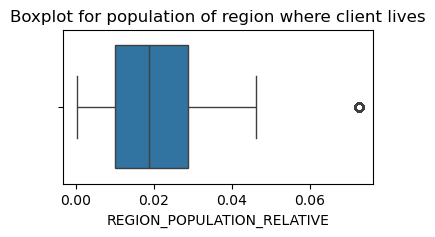

In [79]:
plt.figure(figsize = (4,2))
sns.boxplot(data= df, x= "REGION_POPULATION_RELATIVE").set_title("Boxplot for population of region where client lives") 
plt.show()

From the graph we can cleary see that we have outlier present in the data.But the datapoint is approx 0.02 units away from the upper whisker, it might be a marginal outlier. So it won't have much difference even if we remove them. So we will keep this one as it as

In [81]:
#Lets start with analyzing the income of the client
df["AMT_INCOME_TOTAL"].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

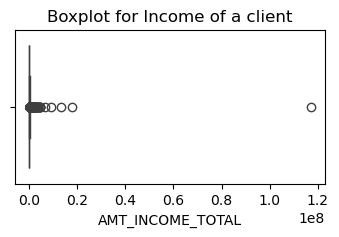

In [82]:
plt.figure(figsize = (4,2))
sns.boxplot(data= df, x= "AMT_INCOME_TOTAL").set_title("Boxplot for Income of a client") 
plt.show()

In [83]:
bins = [ 0,75000,125000,150000,200000,300000,500000,1000000,5000000,100000000,150000000]
ranges = ['0-75000','75000-125000','125000-150000','150000-200000','200000-300000','300000-500000','500000-1000000','1000000-5000000','5000000-100000000','100000000 and above']
df['AMT_INCOME_RANGE1'] = pd.cut(df['AMT_INCOME_TOTAL'], bins=bins, labels=ranges)
print(df['AMT_INCOME_RANGE1'].value_counts())

AMT_INCOME_RANGE1
75000-125000           83507
200000-300000          65176
150000-200000          64307
125000-150000          47890
0-75000                23892
300000-500000          20037
500000-1000000          2452
1000000-5000000          245
5000000-100000000          4
100000000 and above        1
Name: count, dtype: int64


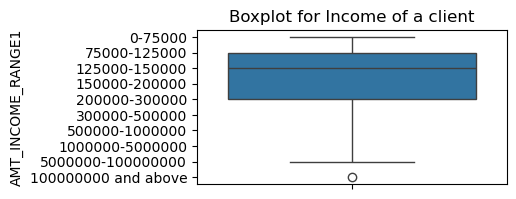

In [84]:
plt.figure(figsize = (4,2))
sns.boxplot(data= df, y= "AMT_INCOME_RANGE1").set_title("Boxplot for Income of a client") 
plt.show()

We have created the bins so that we can easily classify the records by category.We do have outler present in the data, outlier might be a correct data as we may have some individual with high income

In [86]:
df["AMT_CREDIT"].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [87]:
bins = [ 0,75000,125000,150000,200000,300000,500000,1000000,5000000,100000000,150000000]
ranges = ['0-75000','75000-125000','125000-150000','150000-200000','200000-300000','300000-500000','500000-1000000','1000000-5000000','5000000-100000000','100000000 and above']
df['AMT_CREDIT1'] = pd.cut(df['AMT_CREDIT'], bins=bins, labels=ranges)
print(df['AMT_CREDIT1'].value_counts())

AMT_CREDIT1
500000-1000000         108193
300000-500000           58376
200000-300000           54813
1000000-5000000         49985
150000-200000           17985
125000-150000            7925
75000-125000             7519
0-75000                  2715
5000000-100000000           0
100000000 and above         0
Name: count, dtype: int64


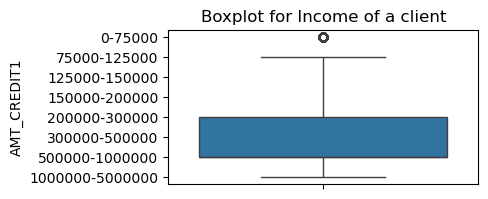

In [88]:
plt.figure(figsize = (4,2))
sns.boxplot(data= df, y= "AMT_CREDIT1").set_title("Boxplot for Income of a client") 
plt.show()

In [89]:
#Describing the numeric variables again
df.describe()

AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count      3.075110e+05  3.075110e+05  307499.000000     3.075110e+05   
mean       1.687979e+05  5.990260e+05   27108.573909     5.383163e+05   
std        2.371231e+05  4.024908e+05   14493.737315     3.692890e+05   
min        2.565000e+04  4.500000e+04    1615.500000     4.050000e+04   
25%        1.125000e+05  2.700000e+05   16524.000000     2.385000e+05   
50%        1.471500e+05  5.135310e+05   24903.000000     4.500000e+05   
75%        2.025000e+05  8.086500e+05   34596.000000     6.795000e+05   
max        1.170000e+08  4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868   16036.995067   67724.742149   
std                      0.013831    4363.988632  139443.751806   
min                      0.000290    7489.000000       0.000000   
25%                      0.010006   12413.000000     933.000000   
50%                      0.018850   15750.000000    2219.000000   
75%                      0.028663   19682.000000    5707.000000   
max                      0.072508   25229.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH     YEAR_BIRTH  YEAR_EMPLOYED  \
count      307511.000000    307511.000000  307511.000000  307511.000000   
mean         4986.120328      2994.202373      43.938646     185.608021   
std          3522.886321      1509.450419      11.964047     382.165887   
min             0.000000         0.000000      21.000000       0.000000   
25%          2010.000000      1720.000000      34.000000       3.000000   
50%          4504.000000      3254.000000      43.000000       6.000000   
75%          7479.500000      4299.000000      54.000000      16.000000   
max         24672.000000      7197.000000      69.000000    1001.000000   

       YEAR_REGISTRATION  YEAR_ID_PUBLISH  
count      307511.000000    307511.000000  
mean           13.659440         8.198575  
std             9.659369         4.151520  
min             0.000000         0.000000  
25%             6.000000         5.000000  
50%            12.000000         9.000000  
75%            20.000000        12.000000  
max            68.000000        20.000000

In [90]:
df.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

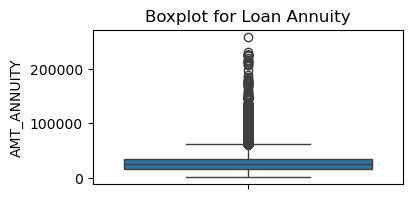

In [91]:
plt.figure(figsize = (4,2))
sns.boxplot(data= df, y= "AMT_ANNUITY").set_title("Boxplot for Loan Annuity") 
plt.show()

We can't determine anything here, so we will create bins to categorize the Loan Annunity.

In [93]:
bins = [ 0,25000,50000,75000,100000,125000,150000,200000,250000]
ranges = ['0-25000','25000-50000','50000-75000','75000-100000','100000-125000','125000-150000','150000-200000','200000 and above']
df['AMT_ANNUITY_RNG'] = pd.cut(df['AMT_ANNUITY'], bins=bins, labels=ranges)
print(df['AMT_ANNUITY_RNG'].value_counts())

AMT_ANNUITY_RNG
0-25000             154867
25000-50000         131335
50000-75000          19321
75000-100000          1471
100000-125000          342
125000-150000           95
200000 and above        35
150000-200000           32
Name: count, dtype: int64


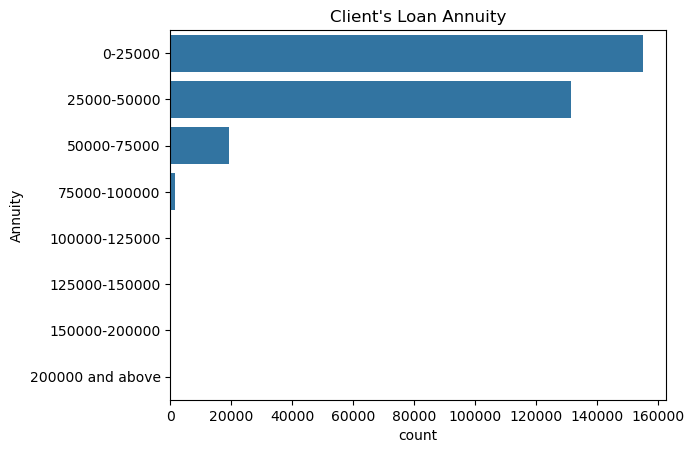

In [94]:
sns.countplot(df['AMT_ANNUITY_RNG']).set_ylabel("Annuity")
plt.title("Client's Loan Annuity")
# plt.savefig('AMT_ANNUITY_RNG.png', bbox_inches='tight')
plt.show()

From the above Graph we can see that until 50000 we have the most number of annuity.

We will now analyze the categorical variables

In [97]:
print("Unique values: ", df["TARGET"].unique())
print("Unique Counts: ", df["TARGET"].value_counts())

Unique values:  [1, 0]
Categories (2, int64): [0, 1]
Unique Counts:  TARGET
0    282686
1     24825
Name: count, dtype: int64


In [98]:
print("Unique values: ", df["NAME_CONTRACT_TYPE"].unique())
print("Unique Counts: ", df["NAME_CONTRACT_TYPE"].value_counts())

Unique values:  ['Cash loans', 'Revolving loans']
Categories (2, object): ['Cash loans', 'Revolving loans']
Unique Counts:  NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64


In [99]:
print("Unique values: ",df.CODE_GENDER.unique())
print("Value Counts: " , df.CODE_GENDER.value_counts())

Unique values:  ['M', 'F', 'XNA']
Categories (3, object): ['F', 'M', 'XNA']
Value Counts:  CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64


We will replace the XNA with the F as we have more counts for Female 

In [101]:
# df = df.loc[df['CODE_GENDER'] != 'XNA']

In [102]:
df['CODE_GENDER'] = df['CODE_GENDER'].replace({'XNA': 'F'})

In [103]:
df.loc[df.CODE_GENDER == 'XNA', 'CODE_GENDER'] = 'F'
print("Value Counts: " , df.CODE_GENDER.value_counts())

Value Counts:  CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64


In [104]:
print("Unique values: ", df["FLAG_OWN_CAR"].unique())
print("Unique Counts: ", df["FLAG_OWN_CAR"].value_counts())

Unique values:  ['N', 'Y']
Categories (2, object): ['N', 'Y']
Unique Counts:  FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64


In [105]:
print("Unique values: ", df["FLAG_OWN_REALTY"].unique())
print("Unique Counts: ", df["FLAG_OWN_REALTY"].value_counts())

Unique values:  ['Y', 'N']
Categories (2, object): ['N', 'Y']
Unique Counts:  FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64


In [106]:
print("Unique values: ", df["CNT_CHILDREN"].unique())
print("Unique Counts: ", df["CNT_CHILDREN"].value_counts())

Unique values:  [0, 1, 2, 3, 4, ..., 11, 12, 10, 19, 14]
Length: 15
Categories (15, int64): [0, 1, 2, 3, ..., 11, 12, 14, 19]
Unique Counts:  CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
10         2
12         2
19         2
11         1
Name: count, dtype: int64


We can clearly see that we have outliers present in the data. Outliers could be meaningful in some contexts, so we will create a new category with children 5 +

In [108]:
df['CNT_CHILDREN'] = df['CNT_CHILDREN'].apply(lambda x: '5+' if x > 5 else str(x))

In [109]:
print("Unique values: ", df["CNT_CHILDREN"].unique())
print("Unique Counts: ", df["CNT_CHILDREN"].value_counts())

Unique values:  ['0' '1' '2' '3' '4' '5+' '5']
Unique Counts:  CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
5+        42
Name: count, dtype: int64


In [110]:
print("Unique values: ", df["NAME_TYPE_SUITE"].unique())
print("Unique Counts: ", df["NAME_TYPE_SUITE"].value_counts())

Unique values:  ['Unaccompanied', 'Family', 'Spouse, partner', 'Children', 'Other_A', 'Other_B', 'Group of people']
Categories (7, object): ['Children', 'Family', 'Group of people', 'Other_A', 'Other_B', 'Spouse, partner', 'Unaccompanied']
Unique Counts:  NAME_TYPE_SUITE
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64


NAME_TYPE_SUITE provides the person who was accompanying client when he was applying for the loan. From the above data we have 2 category (Other_B and Other_B) that we can merge together as other.

In [112]:
df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].replace({'Other_A': 'Other', 'Other_B': 'Other'})

In [113]:
print("Unique values: ", df["NAME_INCOME_TYPE"].unique())
print("Unique Counts: ", df["NAME_INCOME_TYPE"].value_counts())

Unique values:  ['Working', 'State servant', 'Commercial associate', 'Pensioner', 'Unemployed', 'Student', 'Businessman', 'Maternity leave']
Categories (8, object): ['Businessman', 'Commercial associate', 'Maternity leave', 'Pensioner', 'State servant', 'Student', 'Unemployed', 'Working']
Unique Counts:  NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64


In [114]:
print("Unique values: ", df["NAME_EDUCATION_TYPE"].unique())
print("Unique Counts: ", df["NAME_EDUCATION_TYPE"].value_counts())

Unique values:  ['Secondary / secondary special', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Academic degree']
Categories (5, object): ['Academic degree', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Secondary / secondary special']
Unique Counts:  NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64


In [115]:
print("Unique values: ", df["NAME_FAMILY_STATUS"].unique())
print("Unique Counts: ", df["NAME_FAMILY_STATUS"].value_counts())

Unique values:  ['Single / not married', 'Married', 'Civil marriage', 'Widow', 'Separated', 'Unknown']
Categories (6, object): ['Civil marriage', 'Married', 'Separated', 'Single / not married', 'Unknown', 'Widow']
Unique Counts:  NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64


In [116]:
print("Unique values: ", df["NAME_HOUSING_TYPE"].unique())
print("Unique Counts: ", df["NAME_HOUSING_TYPE"].value_counts())

Unique values:  ['House / apartment', 'Rented apartment', 'With parents', 'Municipal apartment', 'Office apartment', 'Co-op apartment']
Categories (6, object): ['Co-op apartment', 'House / apartment', 'Municipal apartment', 'Office apartment', 'Rented apartment', 'With parents']
Unique Counts:  NAME_HOUSING_TYPE
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: count, dtype: int64


In [117]:
print("Unique values: ", df["OCCUPATION_TYPE"].unique())
print("Unique Counts: ", df["OCCUPATION_TYPE"].value_counts())

Unique values:  ['Laborers', 'Core staff', 'Accountants', 'Managers', NaN, ..., 'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff', 'HR staff']
Length: 19
Categories (18, object): ['Accountants', 'Cleaning staff', 'Cooking staff', 'Core staff', ..., 'Sales staff', 'Secretaries', 'Security staff', 'Waiters/barmen staff']
Unique Counts:  OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64


In [118]:
# df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].astype('category')
# df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].cat.add_categories("Don't Know")
# df['OCCUPATION_TYPE'].fillna('Don\'t Know', inplace=True)

In [119]:
# print("Unique values: ", df["OCCUPATION_TYPE"].unique())
# print("Unique Counts: ", df["OCCUPATION_TYPE"].value_counts())

This variable contains approx 32% of missing values. But we will not drop them as a whole beacuse the occuption type might provide useful information. So we will keep them as a different subset of dataset

In [121]:
df_occup = df.dropna(subset=['OCCUPATION_TYPE'])

In [122]:
df_occup.shape

(211120, 50)

##### Let's try interpreting the data from visualizations

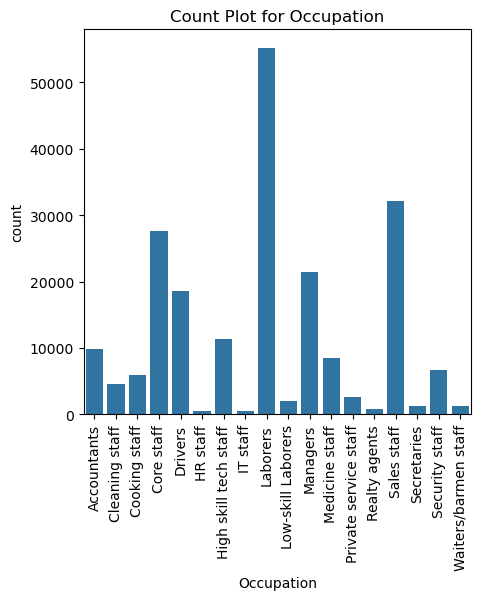

In [124]:
plt.figure(figsize=(5,5))
sns.countplot(x = df_occup["OCCUPATION_TYPE"]).set_xlabel("Occupation")
plt.title("Count Plot for Occupation")
plt.xticks(rotation=90)
plt.show()

From the Graph above we can clearly se that the laborers are the one with most number if application

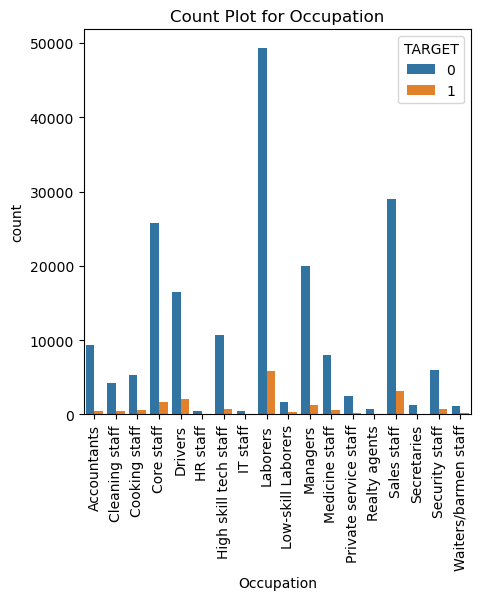

In [126]:
#Analysing the Occupation type with hue as Target
plt.figure(figsize=(5,5))
sns.countplot(x = df_occup["OCCUPATION_TYPE"], hue = df_occup["TARGET"]).set_xlabel("Occupation")
plt.title("Count Plot for Occupation")
plt.xticks(rotation=90)
# plt.savefig('OCCUPATION_TYPE.png', bbox_inches='tight')
plt.show()

In [127]:
df['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [128]:
df['TARGET'].value_counts(normalize = True)

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

From the above stats we can clearly see the imbalance of data. We have only 8% of records with payment difficulties

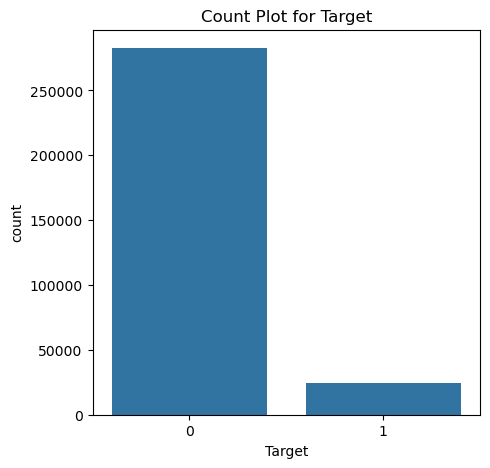

In [130]:
#Analyzing the target variable
plt.figure(figsize=(5,5))
sns.countplot(x = df["TARGET"]).set_xlabel("Target")
plt.title("Count Plot for Target")
# plt.savefig('Target.png', bbox_inches='tight')
plt.show()

From the above graph we can confirm that most of the client didn't faced any difficulty while doing payment

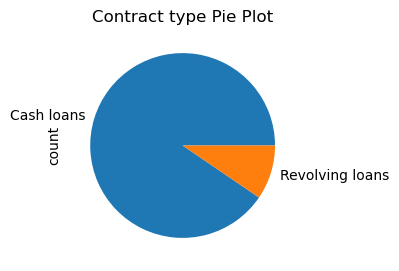

In [132]:
plt.figure(figsize=(3,3))
df["NAME_CONTRACT_TYPE"].value_counts().plot.pie()
plt.title("Contract type Pie Plot")
# plt.savefig('contract_type.png', bbox_inches='tight')
plt.show()

Most of the people preferred to have a cash loan rather than revolving loan

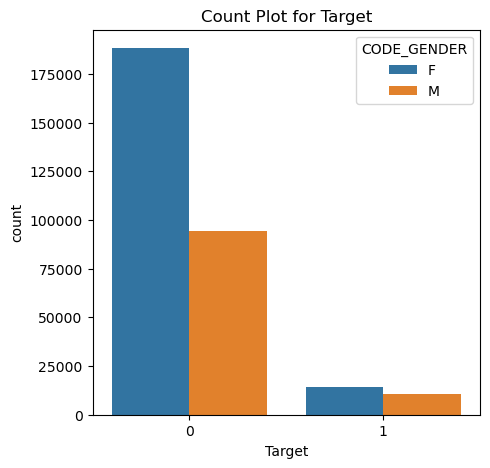

In [134]:
#Analyzing the gender variable with the target
plt.figure(figsize=(5,5))
sns.countplot(x = df["TARGET"], hue= df["CODE_GENDER"]).set_xlabel("Target")
plt.title("Count Plot for Target")
# plt.savefig('TargetByGender.png', bbox_inches='tight')
plt.show()

Female faced more payment difficulties the males. But they have more comparitavely more number of loan application. So the feamle are the one who will most likely to apply for the loan.

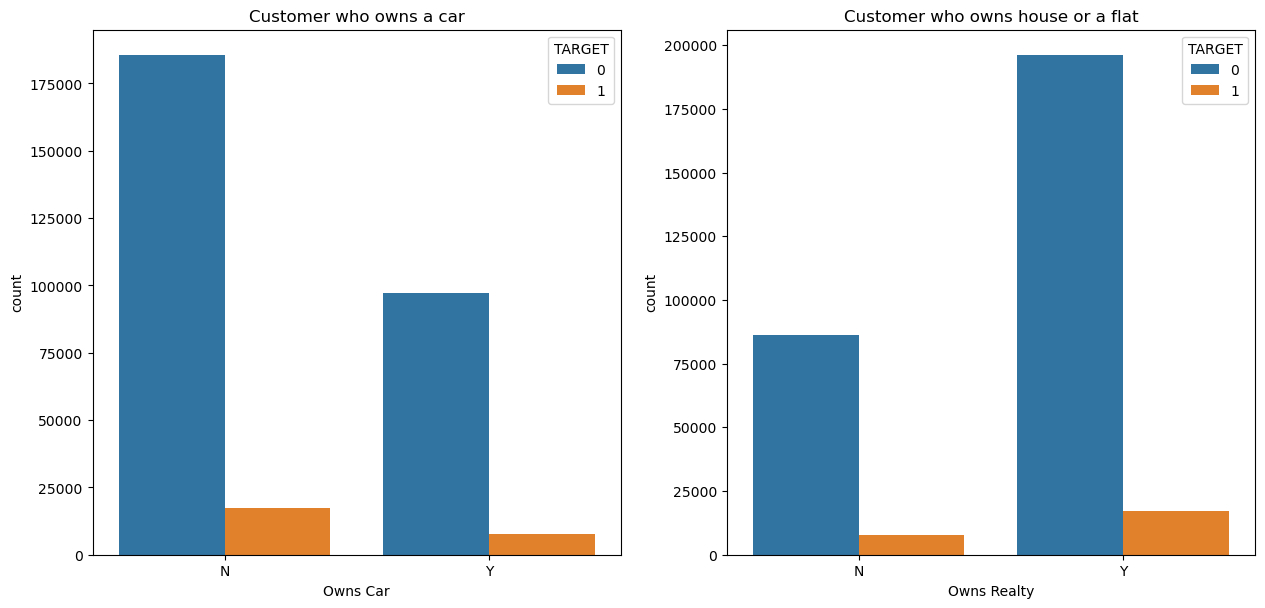

In [136]:
#creating the subplot by determing the demographics of the applicants whether they owns card and house or not
plt.figure(figsize=(15,15)) 

plt.subplot(221)
ax = sns.countplot(data= df,x='FLAG_OWN_CAR',hue='TARGET')
plt.xlabel("Owns Car")
plt.title('Customer who owns a car')

plt.subplot(222)
ax = sns.countplot(data=df,x='FLAG_OWN_REALTY',hue='TARGET')
plt.xlabel("Owns Realty")
plt.title('Customer who owns house or a flat')

# plt.savefig('CarRealty.png', bbox_inches='tight')
plt.show()

From the above plots we can determine that the person with own house faced more difficulties with the payment 

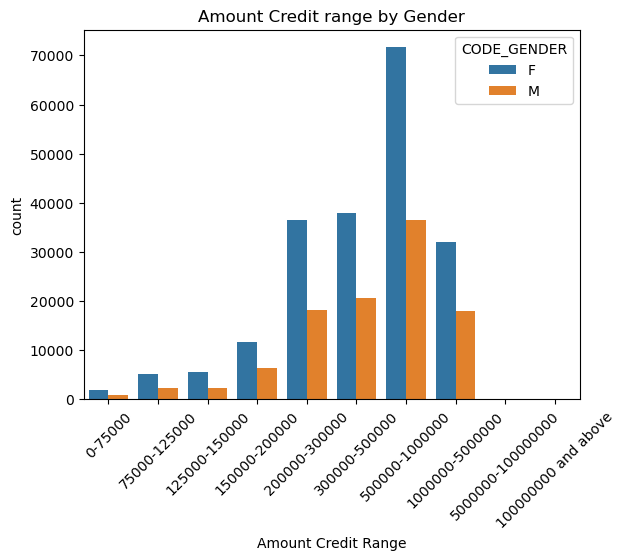

In [138]:
sns.countplot(x=df['AMT_CREDIT1'], hue=df['CODE_GENDER'])
plt.xticks(rotation=45)
plt.xlabel("Amount Credit Range")
plt.title("Amount Credit range by Gender")
# plt.savefig('AmtCredGen.png', bbox_inches='tight')
plt.show()

Most of the Loan credits are in range 150000L to 500000L

In [140]:
df_target_1 = df.loc[df['TARGET'] == 1]
df_target_0 = df.loc[df['TARGET'] == 0]

We created a subset of main dataset based on Target variable

In [142]:
#for plotting correaltion we will only take the numerical data
df_target_1_Main = df_target_1.select_dtypes(include=['number'])
df_target_0_Main = df_target_0.select_dtypes(include=['number'])

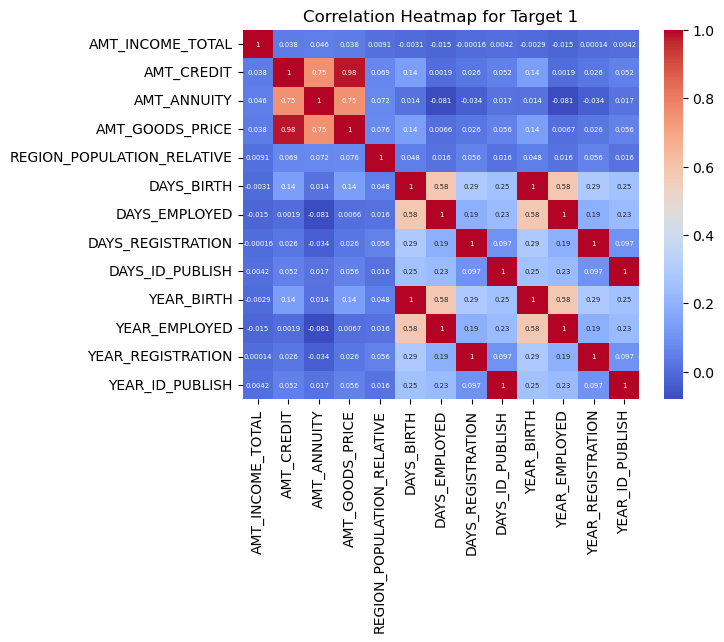

In [143]:
matrix_1 =  df_target_1_Main.corr()
sns.heatmap(matrix_1, annot=True, cmap='coolwarm', annot_kws={"size": 5})
plt.title("Correlation Heatmap for Target 1")
# plt.savefig('CorrTar_1.png', bbox_inches='tight')
plt.show()

In [144]:
matrix_1_new = matrix_1.unstack()

#We will remove the duplicates and self correlation
matrix_1_new = matrix_1_new[matrix_1_new != 1]
matrix_1_new = matrix_1_new.drop_duplicates()
strongest_correlations_1 = matrix_1_new.sort_values(key=abs, ascending=False)


print(strongest_correlations_1.head(5))
# At the end we will have the strongest 5 correlation

DAYS_EMPLOYED      YEAR_EMPLOYED        1.000000
DAYS_BIRTH         YEAR_BIRTH           0.999680
DAYS_REGISTRATION  YEAR_REGISTRATION    0.999500
DAYS_ID_PUBLISH    YEAR_ID_PUBLISH      0.997654
AMT_CREDIT         AMT_GOODS_PRICE      0.982783
dtype: float64


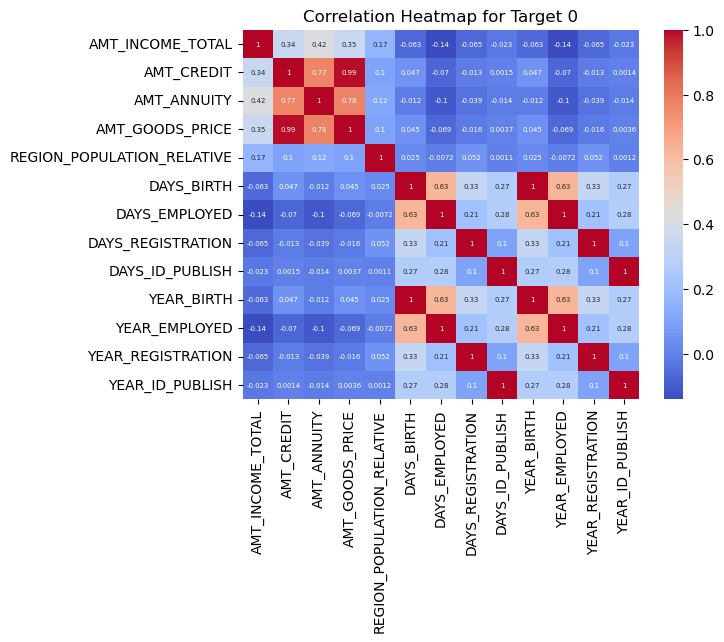

In [145]:
matrix_2 =  df_target_0_Main.corr()
sns.heatmap(matrix_2, annot=True, cmap='coolwarm', annot_kws={"size": 5})
plt.title("Correlation Heatmap for Target 0")
# plt.savefig('CorrTar_0.png', bbox_inches='tight')
plt.show()

In [146]:
matrix_2_new = matrix_2.unstack()
#We will remove the duplicates and self correlation
matrix_2_new = matrix_2_new[matrix_2_new != 1]
matrix_2_new = matrix_2_new.drop_duplicates()
strongest_correlations_0 = matrix_2_new.sort_values(key=abs, ascending=False)

print(strongest_correlations_0.head(5))


DAYS_EMPLOYED      YEAR_EMPLOYED        1.000000
DAYS_BIRTH         YEAR_BIRTH           0.999706
DAYS_REGISTRATION  YEAR_REGISTRATION    0.999560
DAYS_ID_PUBLISH    YEAR_ID_PUBLISH      0.997605
AMT_CREDIT         AMT_GOODS_PRICE      0.987022
dtype: float64


We can see that both the targets has the same highest correlation between two variables

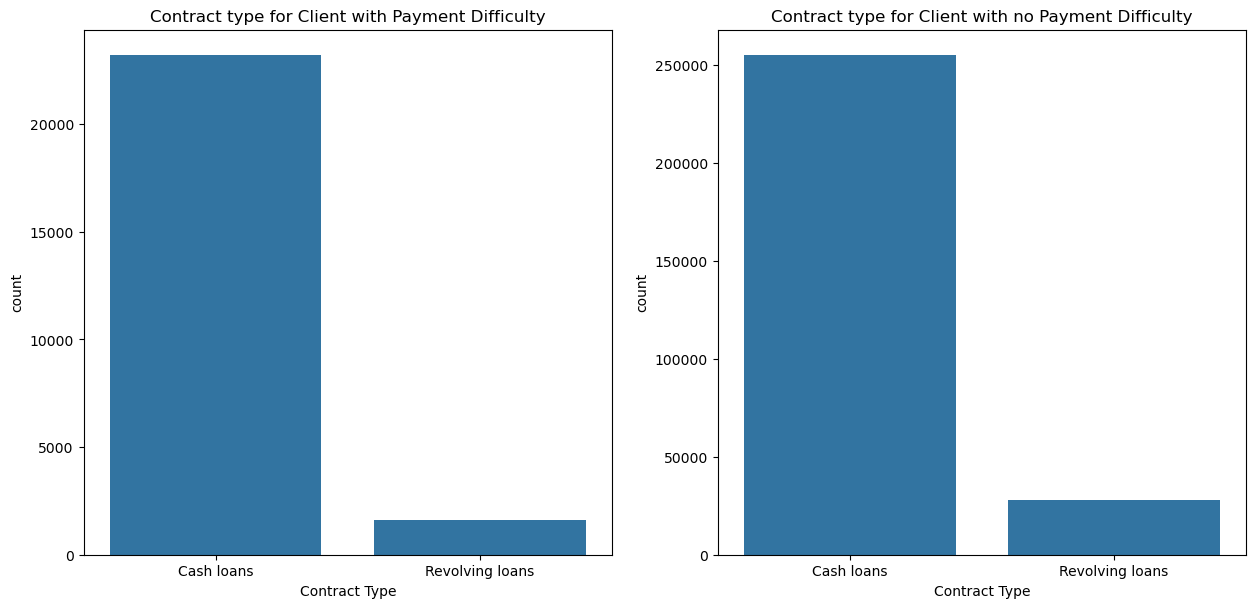

In [148]:
plt.figure(figsize=(15,15)) 

plt.subplot(221)
ax = sns.countplot(data= df_target_1,x='NAME_CONTRACT_TYPE')
plt.xlabel("Contract Type")
plt.title('Contract type for Client with Payment Difficulty')

plt.subplot(222)
ax = sns.countplot(data=df_target_0,x='NAME_CONTRACT_TYPE')
plt.xlabel("Contract Type")
plt.title('Contract type for Client with no Payment Difficulty')

# plt.savefig('CNTRType.png', bbox_inches='tight')

plt.show()

From the above graphs we can see that clients preferred Cash loan more than Revolving loans

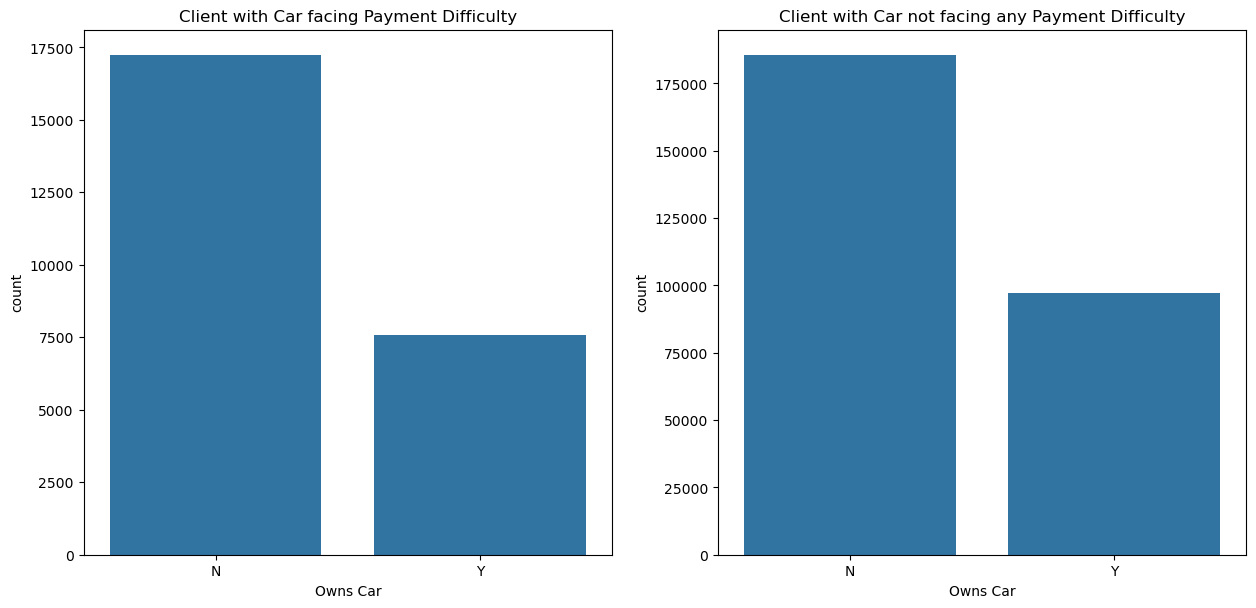

In [150]:
plt.figure(figsize=(15,15)) 

plt.subplot(221)
ax = sns.countplot(data= df_target_1,x='FLAG_OWN_CAR')
plt.xlabel("Owns Car")
plt.title('Client with Car facing Payment Difficulty')

plt.subplot(222)
ax = sns.countplot(data=df_target_0,x='FLAG_OWN_CAR')
plt.xlabel("Owns Car")
plt.title('Client with Car not facing any Payment Difficulty')

# plt.savefig('CarType.png', bbox_inches='tight')

plt.show()

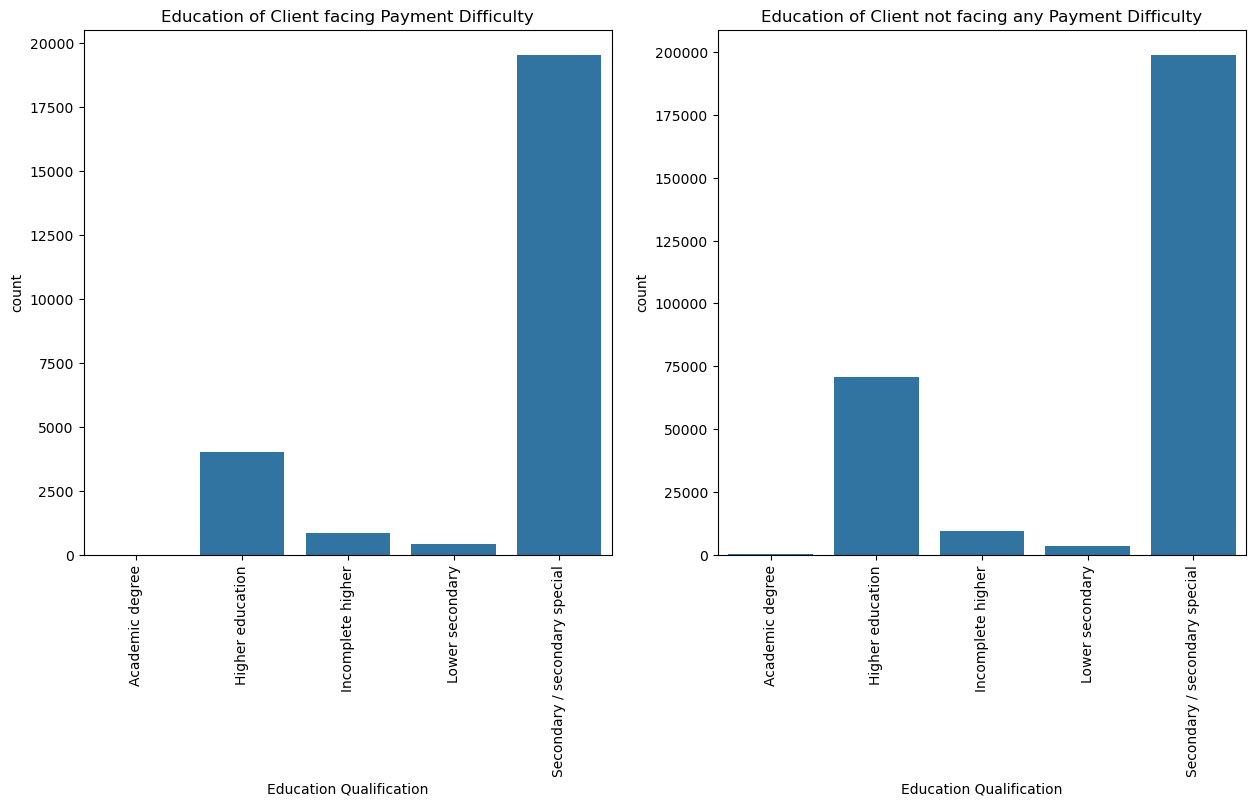

In [151]:
#plotting the graph of Education type of the client
plt.figure(figsize=(15,15)) 

plt.subplot(221)
ax = sns.countplot(data= df_target_1,x='NAME_EDUCATION_TYPE')
plt.xlabel("Education Qualification")
plt.xticks(rotation=90)
plt.title('Education of Client facing Payment Difficulty')

plt.subplot(222)
ax = sns.countplot(data=df_target_0,x='NAME_EDUCATION_TYPE')
plt.xlabel("Education Qualification")
plt.title('Education of Client not facing any Payment Difficulty')

plt.xticks(rotation=90)
# plt.savefig('EduType.png', bbox_inches='tight')
plt.show()

According to the categories above, the majority of the candidates had a secondary education. Perhaps the bank should focus more on clients with higher education because they are more likely to pay the X amount to the bank, whilst those with secondary education are more likely to apply for the loan.

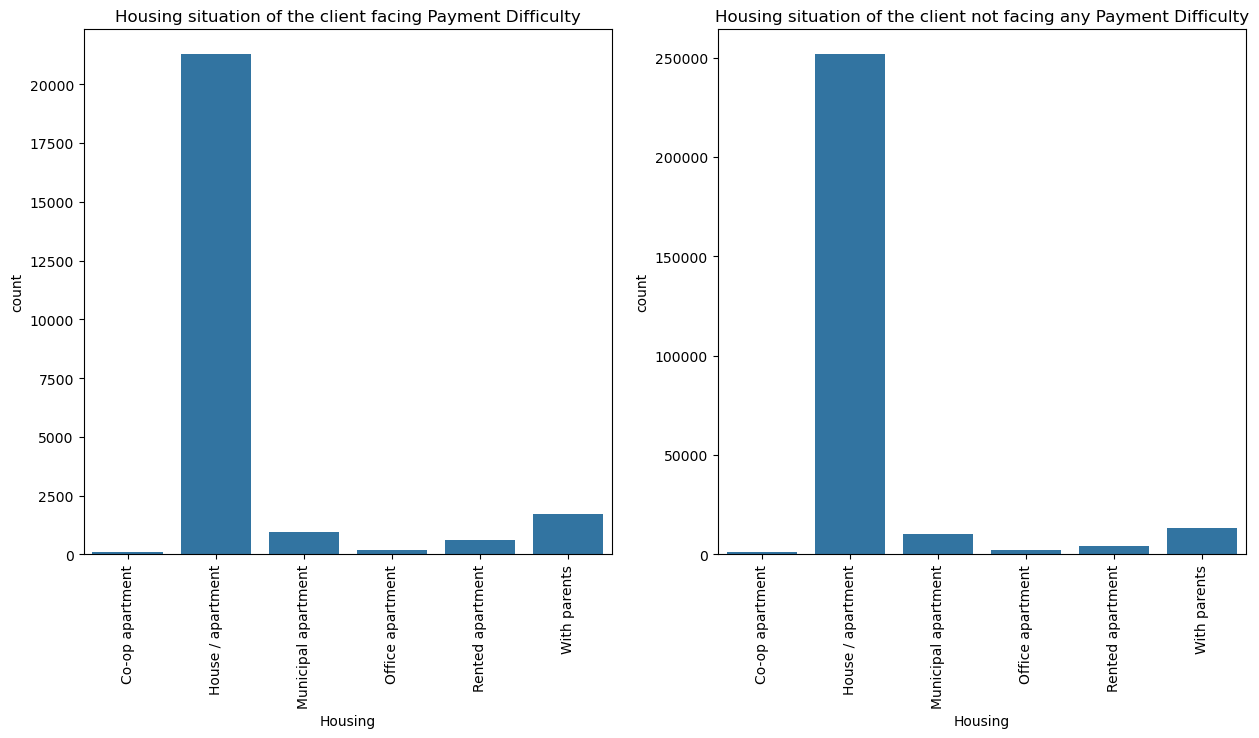

In [153]:
#Analyzing the housing type
plt.figure(figsize=(15,15)) 

plt.subplot(221)
ax = sns.countplot(data= df_target_1,x='NAME_HOUSING_TYPE')
plt.xlabel("Housing")
plt.xticks(rotation=90)
plt.title('Housing situation of the client facing Payment Difficulty')

plt.subplot(222)
ax = sns.countplot(data=df_target_0,x='NAME_HOUSING_TYPE')
plt.xlabel("Housing")
plt.title('Housing situation of the client not facing any Payment Difficulty')
plt.xticks(rotation=90)

# plt.savefig('HouseType.png', bbox_inches='tight')
plt.show()

Most of the client lives at House/ apartment

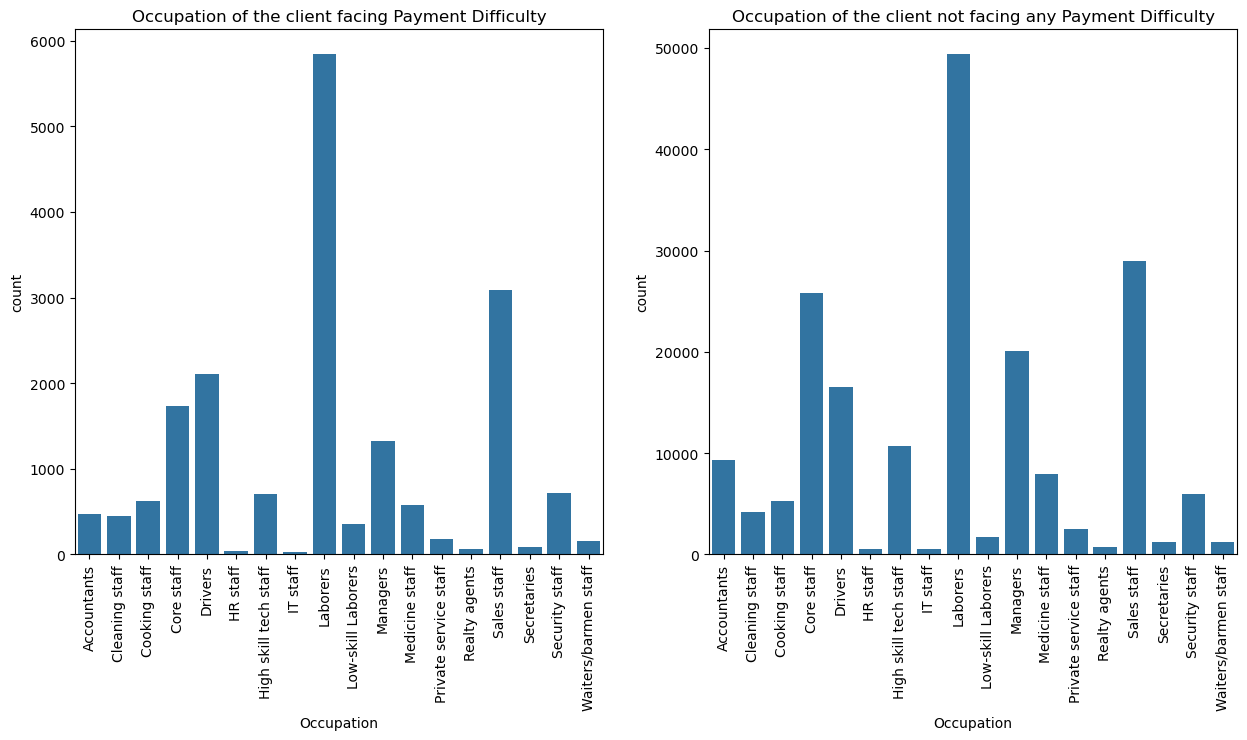

In [155]:
plt.figure(figsize=(15,15)) 

plt.subplot(221)
ax = sns.countplot(data= df_target_1,x='OCCUPATION_TYPE')
plt.xlabel("Occupation")
plt.xticks(rotation=90)
plt.title('Occupation of the client facing Payment Difficulty')

plt.subplot(222)
ax = sns.countplot(data=df_target_0,x='OCCUPATION_TYPE')
plt.xlabel("Occupation")
plt.title('Occupation of the client not facing any Payment Difficulty')
plt.xticks(rotation=90)
# plt.savefig('OccupType.png', bbox_inches='tight')

plt.show()

The majority of the customers are working professionals, and labourers are the ones with the most frequent occurrences.


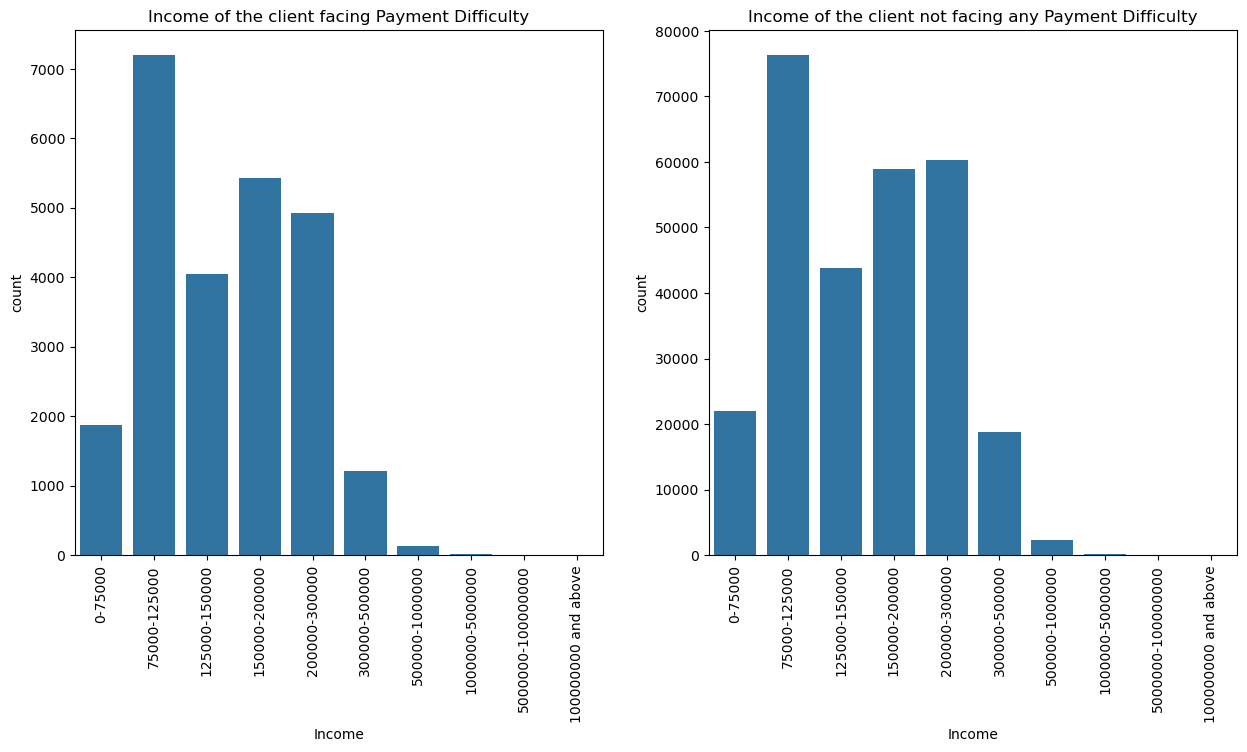

In [157]:
plt.figure(figsize=(15,15)) 

plt.subplot(221)
ax = sns.countplot(data= df_target_1,x='AMT_INCOME_RANGE1')
plt.xlabel("Income")
plt.xticks(rotation=90)
plt.title('Income of the client facing Payment Difficulty')

plt.subplot(222)
ax = sns.countplot(data=df_target_0,x='AMT_INCOME_RANGE1')
plt.xlabel("Income")
plt.title('Income of the client not facing any Payment Difficulty')
plt.xticks(rotation=90)
# plt.savefig('ICRanType.png', bbox_inches='tight')

plt.show()

Clients with incomes of 75K to 300K are most likely to apply for the loan.

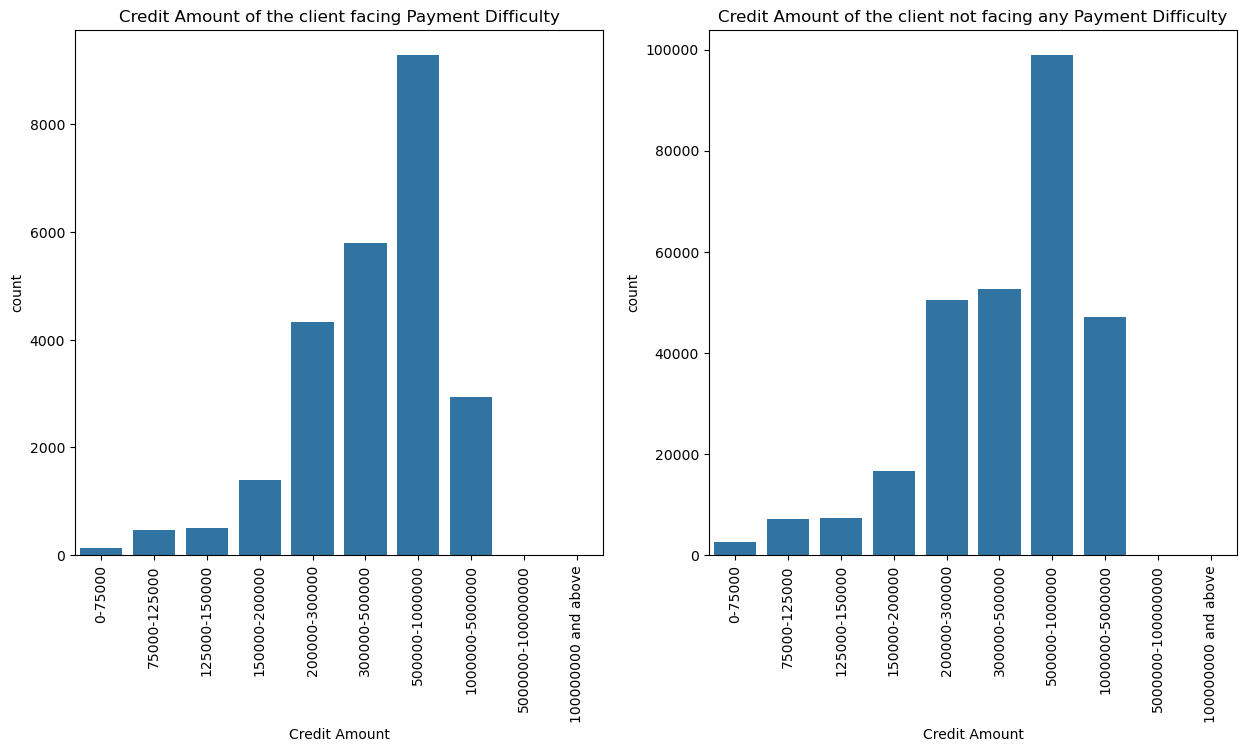

In [159]:
plt.figure(figsize=(15,15)) 

plt.subplot(221)
ax = sns.countplot(data= df_target_1,x='AMT_CREDIT1')
plt.xlabel("Credit Amount")
plt.xticks(rotation=90)
plt.title('Credit Amount of the client facing Payment Difficulty')

plt.subplot(222)
ax = sns.countplot(data=df_target_0,x='AMT_CREDIT1')
plt.xlabel("Credit Amount")
plt.title('Credit Amount of the client not facing any Payment Difficulty')
plt.xticks(rotation=90)
# plt.savefig('CreRanType.png', bbox_inches='tight')

plt.show()

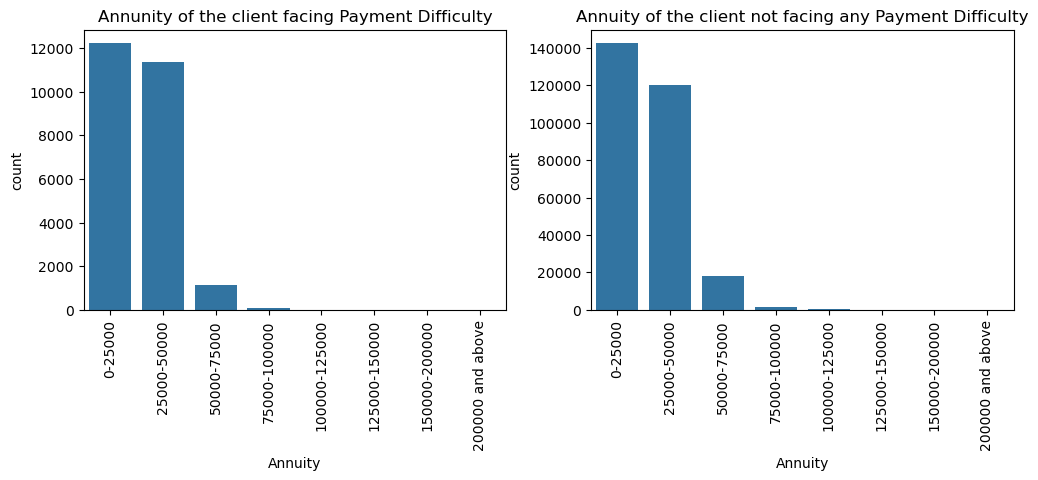

In [160]:
plt.figure(figsize=(12,8)) 

plt.subplot(221)
ax = sns.countplot(data= df_target_1,x='AMT_ANNUITY_RNG')
plt.xlabel("Annuity")
plt.xticks(rotation=90)
plt.title('Annunity of the client facing Payment Difficulty')

plt.subplot(222)
ax = sns.countplot(data=df_target_0,x='AMT_ANNUITY_RNG')
plt.xlabel("Annuity")
plt.title('Annuity of the client not facing any Payment Difficulty')
plt.xticks(rotation=90)

# plt.savefig('AnnuType.png', bbox_inches='tight')

plt.show()

Most customers have an annuity of less than $75,000.

[]

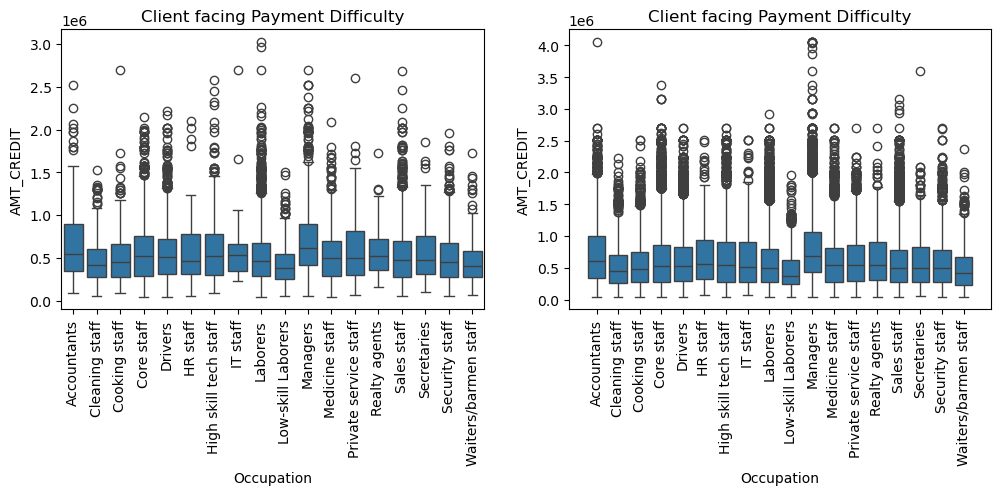

In [162]:
plt.figure(figsize=(12,8)) 

plt.subplot(221)
ax = sns.boxplot(data=df_target_1,y='AMT_CREDIT',x='OCCUPATION_TYPE')
plt.xlabel("Occupation")
plt.xticks(rotation=90)
plt.title('Client facing Payment Difficulty')

plt.subplot(222)
ax = sns.boxplot(data=df_target_0,y='AMT_CREDIT',x='OCCUPATION_TYPE')
plt.xlabel("Occupation")
plt.xticks(rotation=90)
plt.title('Client facing Payment Difficulty')

# plt.savefig('OccupAmtType.png', bbox_inches='tight')

plt.plot()

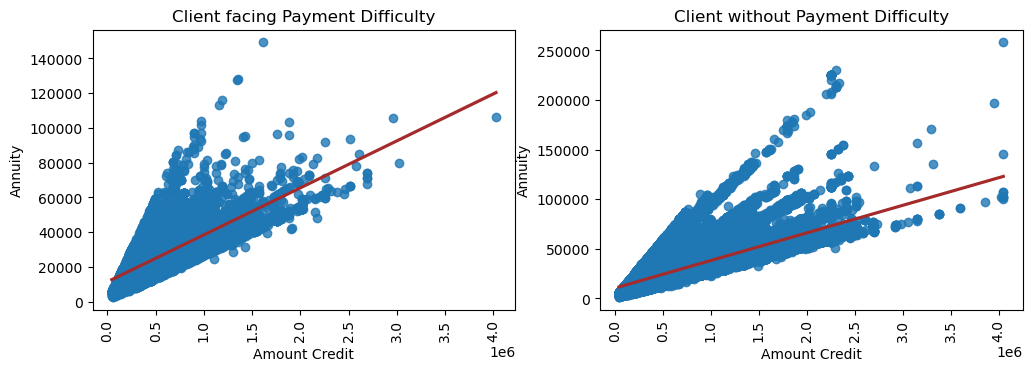

In [163]:
plt.figure(figsize=(12,8)) 

plt.subplot(221)
ax = sns.regplot(data= df_target_1,x='AMT_CREDIT',y='AMT_ANNUITY',line_kws= {"color": "brown"})
plt.xlabel("Amount Credit")
plt.ylabel("Annuity")
plt.xticks(rotation=90)
plt.title('Client facing Payment Difficulty')

plt.subplot(222)
ax = sns.regplot(data= df_target_0,x='AMT_CREDIT',y='AMT_ANNUITY',line_kws= {"color": "brown"})
plt.xlabel("Amount Credit")
plt.ylabel("Annuity")
plt.xticks(rotation=90)
plt.title('Client without Payment Difficulty')

# plt.savefig('RegPltCred.png', bbox_inches='tight')

plt.show()

We have positive correlation between the Credit amount and annuity. We can conclude that clients with bigger credit levels are more likely to receive higher annuity payouts.


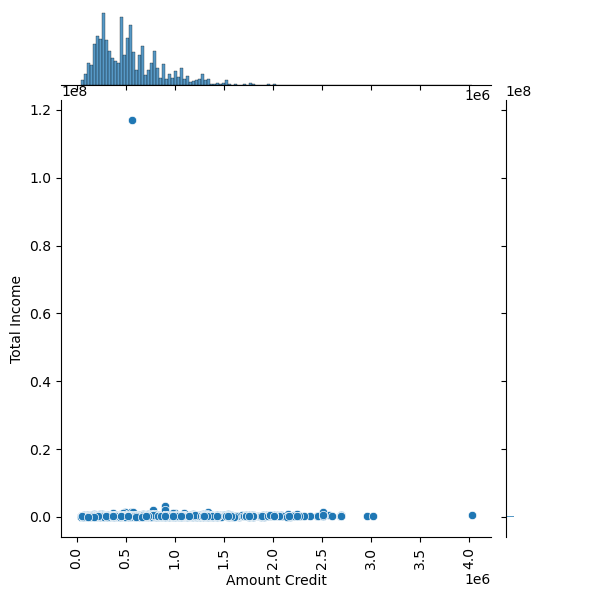

In [165]:
# plt.figure(figsize=(20,20)) 

sns.jointplot(data= df_target_1,x='AMT_CREDIT',y='AMT_INCOME_TOTAL')
plt.xlabel("Amount Credit")
plt.ylabel("Total Income")
plt.xticks(rotation=90)
# plt.title('Client facing Payment Difficulty')

plt.show()

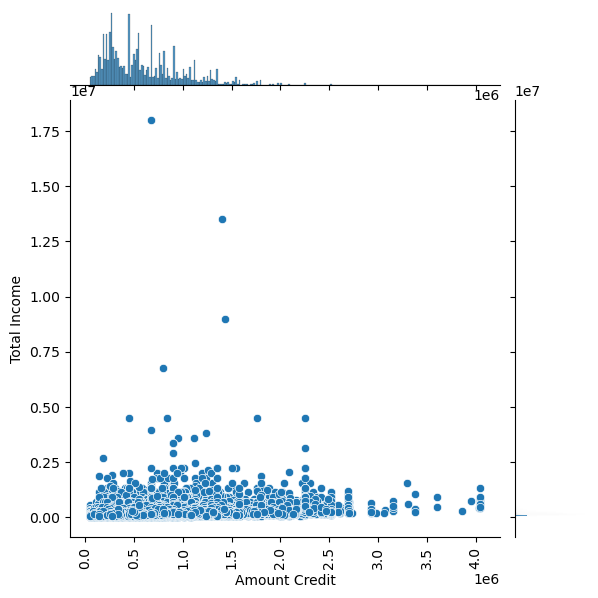

In [166]:

sns.jointplot(data= df_target_0,x='AMT_CREDIT',y='AMT_INCOME_TOTAL')
plt.xlabel("Amount Credit")
plt.ylabel("Total Income")
plt.xticks(rotation=90)
# plt.title('Client without Payment Difficulty')

plt.show()

[]

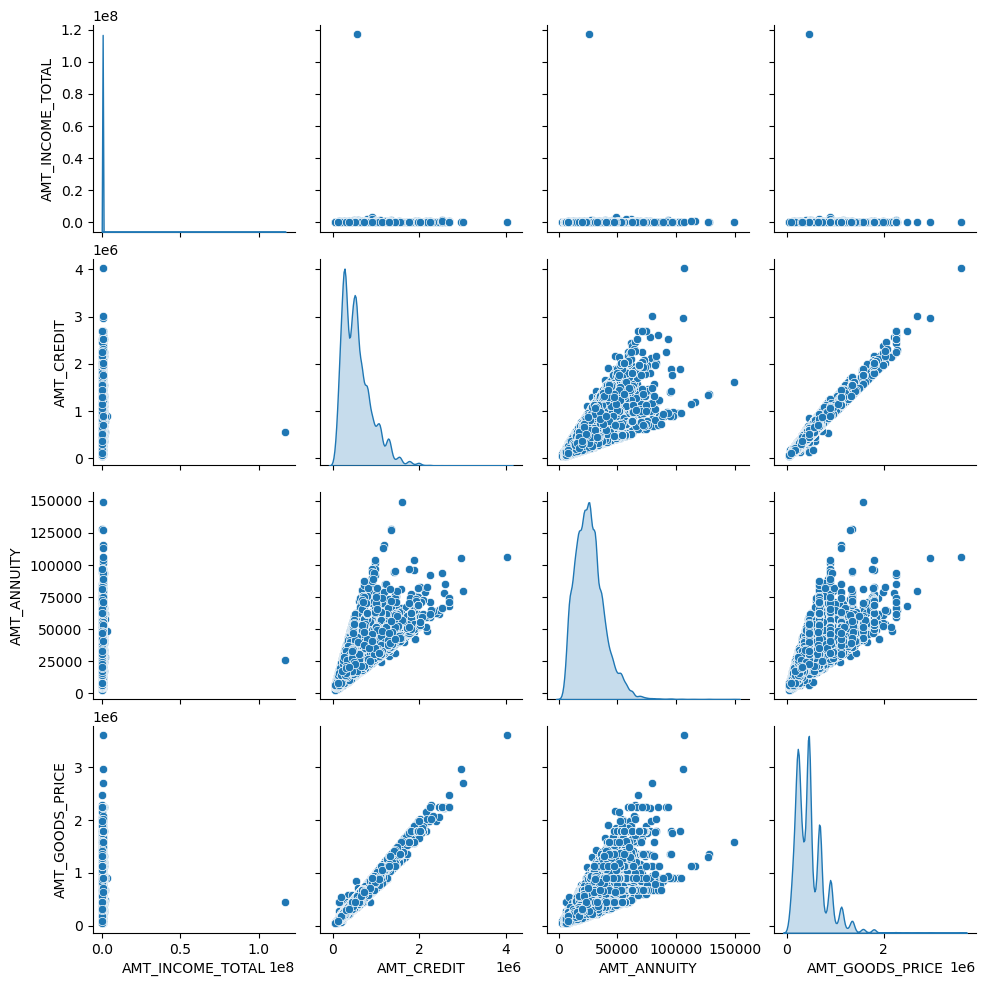

In [167]:
sns.pairplot(data = df_target_1, vars = ["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"],kind= "scatter", diag_kind= "kde")
# plt.savefig('PrPlt.png', bbox_inches='tight')

plt.plot()

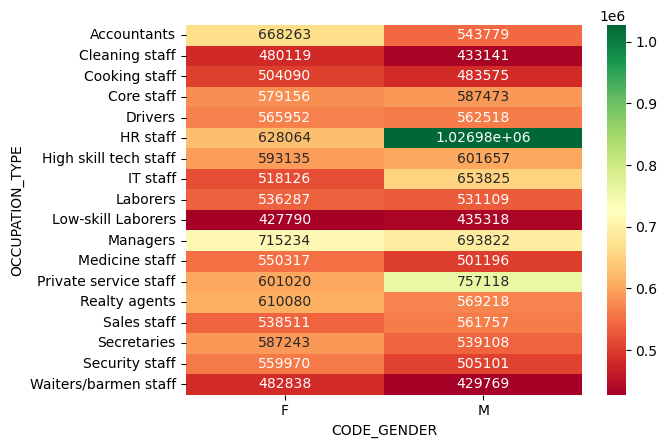

In [168]:
res=pd.pivot_table(data=df_target_1, index="OCCUPATION_TYPE", columns="CODE_GENDER", values="AMT_CREDIT")
sns.heatmap(res, annot= True, cmap="RdYlGn" ,fmt='g')
# plt.savefig('Tar_1HM.png', bbox_inches='tight')

plt.show()

Male HR Staff have highest credit amount

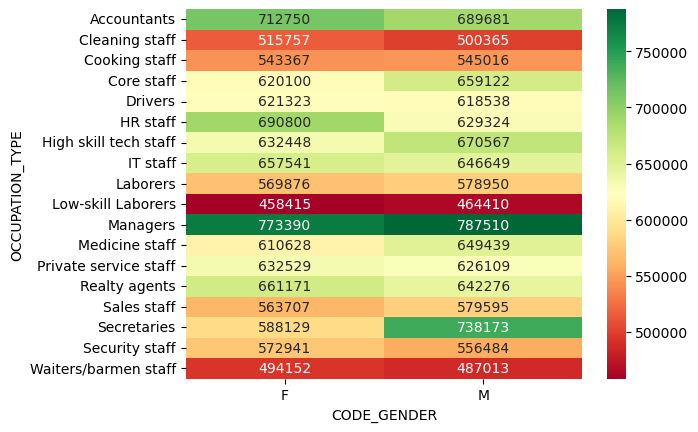

In [170]:
res=pd.pivot_table(data=df_target_0, index="OCCUPATION_TYPE", columns="CODE_GENDER", values="AMT_CREDIT")
sns.heatmap(res, annot= True, cmap="RdYlGn" ,fmt='g')
# plt.savefig('Tar_0HM.png', bbox_inches='tight')
plt.show()

Low skilled laborers has the least credit amount among the one with payment difficulties

### Lets merge datatset 2

In [173]:
#Importing the Previous application file
prev_data = pd.read_csv(r"previous_application.csv")
prev_data.head(5)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [174]:
#Anlyzing the basic description of the dataset

In [175]:
prev_data.shape

(1670214, 37)

In [176]:
prev_data.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [177]:
prev_data.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [178]:
# pd.set_option("display.max_columns",None)
# pd.set_option("display.max_rows",None)

In [179]:
#Displaying the null value count
null_df_pvd = prev_data.isnull().sum()
null_df_pvd

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [180]:
#Checking the overall percent of missing data
nullpercent_df_pvd = prev_data.apply(lambda x: round(100 * x.isnull().sum() / len(prev_data), 2))
nullpercent_df_pvd

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [181]:
#Remove the empty row greater than 40% of null values.

remove_pvd = list(nullpercent_df_pvd[nullpercent_df_pvd.values>=40].index)
prev_data.drop(labels=remove_pvd,axis=1,inplace=True)
print(len(remove_pvd))

11


In [182]:
#Checking aga#Checking again the missing values
prev_data.apply(lambda x: round(100 * x.isnull().sum() / len(prev_data), 2)).sort_values(ascending = False)

AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
NAME_PAYMENT_TYPE               0.00
NAME_YIELD_GROUP                0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_PORTFOLIO                  0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_STATUS            0.00
NAME_CASH_LOAN_PURPOSE          0.00
NFLAG_LAST_APPL_IN_DAY          0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
HOUR_APPR_PROCESS_START         0.00
WEEKDAY_APPR_PROCESS_START      0.00
AMT_CREDIT                      0.00
AMT_APPLICATION                 0.00
NAME_CONTRACT_TYPE              0.00
DAYS_DECISION                   0.00
dtype: float64

In [183]:
#Standardising the Data type

In [184]:
x = [
"NAME_CONTRACT_TYPE",
"WEEKDAY_APPR_PROCESS_START",
"FLAG_LAST_APPL_PER_CONTRACT",
"NAME_CASH_LOAN_PURPOSE",
"NAME_CONTRACT_STATUS",
"NAME_PAYMENT_TYPE",
"CODE_REJECT_REASON",
"NAME_CLIENT_TYPE",
"NAME_GOODS_CATEGORY",
"NAME_PORTFOLIO",
"NAME_PRODUCT_TYPE",
"CHANNEL_TYPE",
"NAME_SELLER_INDUSTRY",
"NAME_YIELD_GROUP",
"PRODUCT_COMBINATION",    
]

for i in x:
    prev_data[i] = prev_data[i].astype('category')

In [185]:
x = [
"NAME_CONTRACT_TYPE",
"WEEKDAY_APPR_PROCESS_START",
"FLAG_LAST_APPL_PER_CONTRACT",
"NAME_CASH_LOAN_PURPOSE",
"NAME_CONTRACT_STATUS",
"NAME_PAYMENT_TYPE",
"CODE_REJECT_REASON",
"NAME_CLIENT_TYPE",
"NAME_GOODS_CATEGORY",
"NAME_PORTFOLIO",
"NAME_PRODUCT_TYPE",
"CHANNEL_TYPE",]

for i in x:
    print("Unique values: ", prev_data[i].unique())
    print("Unique Counts: ", prev_data[i].value_counts())

Unique values:  ['Consumer loans', 'Cash loans', 'Revolving loans', 'XNA']
Categories (4, object): ['Cash loans', 'Consumer loans', 'Revolving loans', 'XNA']
Unique Counts:  NAME_CONTRACT_TYPE
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: count, dtype: int64
Unique values:  ['SATURDAY', 'THURSDAY', 'TUESDAY', 'MONDAY', 'FRIDAY', 'SUNDAY', 'WEDNESDAY']
Categories (7, object): ['FRIDAY', 'MONDAY', 'SATURDAY', 'SUNDAY', 'THURSDAY', 'TUESDAY', 'WEDNESDAY']
Unique Counts:  WEEKDAY_APPR_PROCESS_START
TUESDAY      255118
WEDNESDAY    255010
MONDAY       253557
FRIDAY       252048
THURSDAY     249099
SATURDAY     240631
SUNDAY       164751
Name: count, dtype: int64
Unique values:  ['Y', 'N']
Categories (2, object): ['N', 'Y']
Unique Counts:  FLAG_LAST_APPL_PER_CONTRACT
Y    1661739
N       8475
Name: count, dtype: int64
Unique values:  ['XAP', 'XNA', 'Repairs', 'Everyday expenses', 'Car repairs', ..., 'Wedding / gift / holiday', '

In [186]:
prev_data['NAME_CONTRACT_TYPE'] = prev_data['NAME_CONTRACT_TYPE'].replace({'XNA': 'Cash loans'})
prev_data['CODE_REJECT_REASON'] = prev_data['CODE_REJECT_REASON'].replace({'XNA': 'XAP'})
prev_data['NAME_CLIENT_TYPE'] = prev_data['NAME_CLIENT_TYPE'].replace({'XNA': 'Repeater'})
prev_data['NAME_PORTFOLIO'] = prev_data['NAME_PORTFOLIO'].replace({'XNA': 'POS'})

We have replaced the XNA with the mode of the variable. We did not update the XNA to all of the variable as the number were too high for the variables

In [188]:
x = [
"NAME_CONTRACT_TYPE",
"WEEKDAY_APPR_PROCESS_START",
"FLAG_LAST_APPL_PER_CONTRACT",
"NAME_CASH_LOAN_PURPOSE",
"NAME_CONTRACT_STATUS",
"NAME_PAYMENT_TYPE",
"CODE_REJECT_REASON",
"NAME_CLIENT_TYPE",
"NAME_GOODS_CATEGORY",
"NAME_PORTFOLIO",
"NAME_PRODUCT_TYPE",
"CHANNEL_TYPE",]

for i in x:
    print("Unique values: ", prev_data[i].unique())
    print("Unique Counts: ", prev_data[i].value_counts())

Unique values:  ['Consumer loans', 'Cash loans', 'Revolving loans']
Categories (3, object): ['Cash loans', 'Consumer loans', 'Revolving loans']
Unique Counts:  NAME_CONTRACT_TYPE
Cash loans         747899
Consumer loans     729151
Revolving loans    193164
Name: count, dtype: int64
Unique values:  ['SATURDAY', 'THURSDAY', 'TUESDAY', 'MONDAY', 'FRIDAY', 'SUNDAY', 'WEDNESDAY']
Categories (7, object): ['FRIDAY', 'MONDAY', 'SATURDAY', 'SUNDAY', 'THURSDAY', 'TUESDAY', 'WEDNESDAY']
Unique Counts:  WEEKDAY_APPR_PROCESS_START
TUESDAY      255118
WEDNESDAY    255010
MONDAY       253557
FRIDAY       252048
THURSDAY     249099
SATURDAY     240631
SUNDAY       164751
Name: count, dtype: int64
Unique values:  ['Y', 'N']
Categories (2, object): ['N', 'Y']
Unique Counts:  FLAG_LAST_APPL_PER_CONTRACT
Y    1661739
N       8475
Name: count, dtype: int64
Unique values:  ['XAP', 'XNA', 'Repairs', 'Everyday expenses', 'Car repairs', ..., 'Wedding / gift / holiday', 'Hobby', 'Gasification / water supply', '

In [189]:
#Correcting the Data type
prev_data["SK_ID_CURR"] = prev_data["SK_ID_CURR"].astype("object")

In [190]:
#Merging the dataframe on variable SK_ID_CURR.
final_df = pd.merge(df, prev_data, on='SK_ID_CURR', how='inner')

In [191]:
df.shape

(307511, 50)

In [192]:
prev_data.shape

(1670214, 26)

In [193]:
final_df.shape

(1413701, 75)

In [194]:
#Checking the columns of the new merged data
final_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START_x',
       'HOUR_APPR_PROCESS_START_x', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDI

We will now analyze variable NAME_CONTRACT_STATUS as it contains the status of the previous applications

In [196]:
final_df.NAME_CONTRACT_STATUS.unique()

['Approved', 'Canceled', 'Refused', 'Unused offer']
Categories (4, object): ['Approved', 'Canceled', 'Refused', 'Unused offer']

In [197]:
final_df.NAME_CONTRACT_STATUS.value_counts()

NAME_CONTRACT_STATUS
Approved        886099
Canceled        259441
Refused         245390
Unused offer     22771
Name: count, dtype: int64

[]

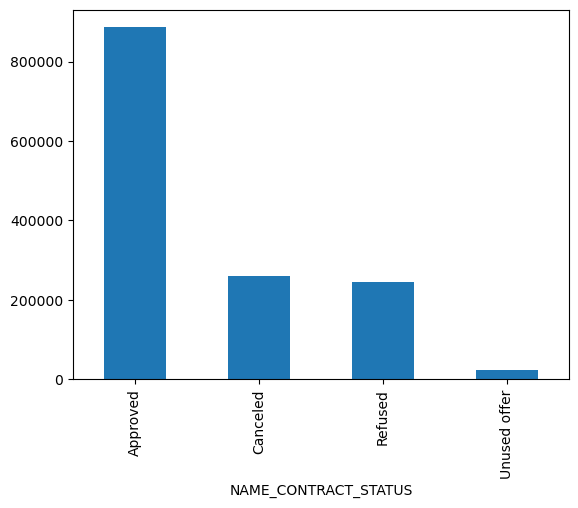

In [198]:
final_df.NAME_CONTRACT_STATUS.value_counts().plot.bar()
# plt.savefig('NAME_CONTRACT_STATUS.png', bbox_inches='tight')
plt.plot()

We have most of the Approved application from previous data

In [200]:
#Creating sub dataset based on the categories from NAME_CONTRACT_STATUS
df_Approved = final_df.loc[final_df['NAME_CONTRACT_STATUS'] == "Approved"]
df_Canceled = final_df.loc[final_df['NAME_CONTRACT_STATUS'] == "Canceled"]
df_Refused = final_df.loc[final_df['NAME_CONTRACT_STATUS'] == "Refused"]
df_UnusedOffer = final_df.loc[final_df['NAME_CONTRACT_STATUS'] == "Unused offer"]

In [201]:
#Print the shape pf each of the sub dataset
print("Approved Shape: ",df_Approved.shape)
print("Canceled Shape: ",df_Canceled.shape)
print("Refused Shape: ",df_Refused.shape)
print("Unused offer Shape: ",df_UnusedOffer.shape)

Approved Shape:  (886099, 75)
Canceled Shape:  (259441, 75)
Refused Shape:  (245390, 75)
Unused offer Shape:  (22771, 75)


We will now analyze the variables with each of the sub dataset

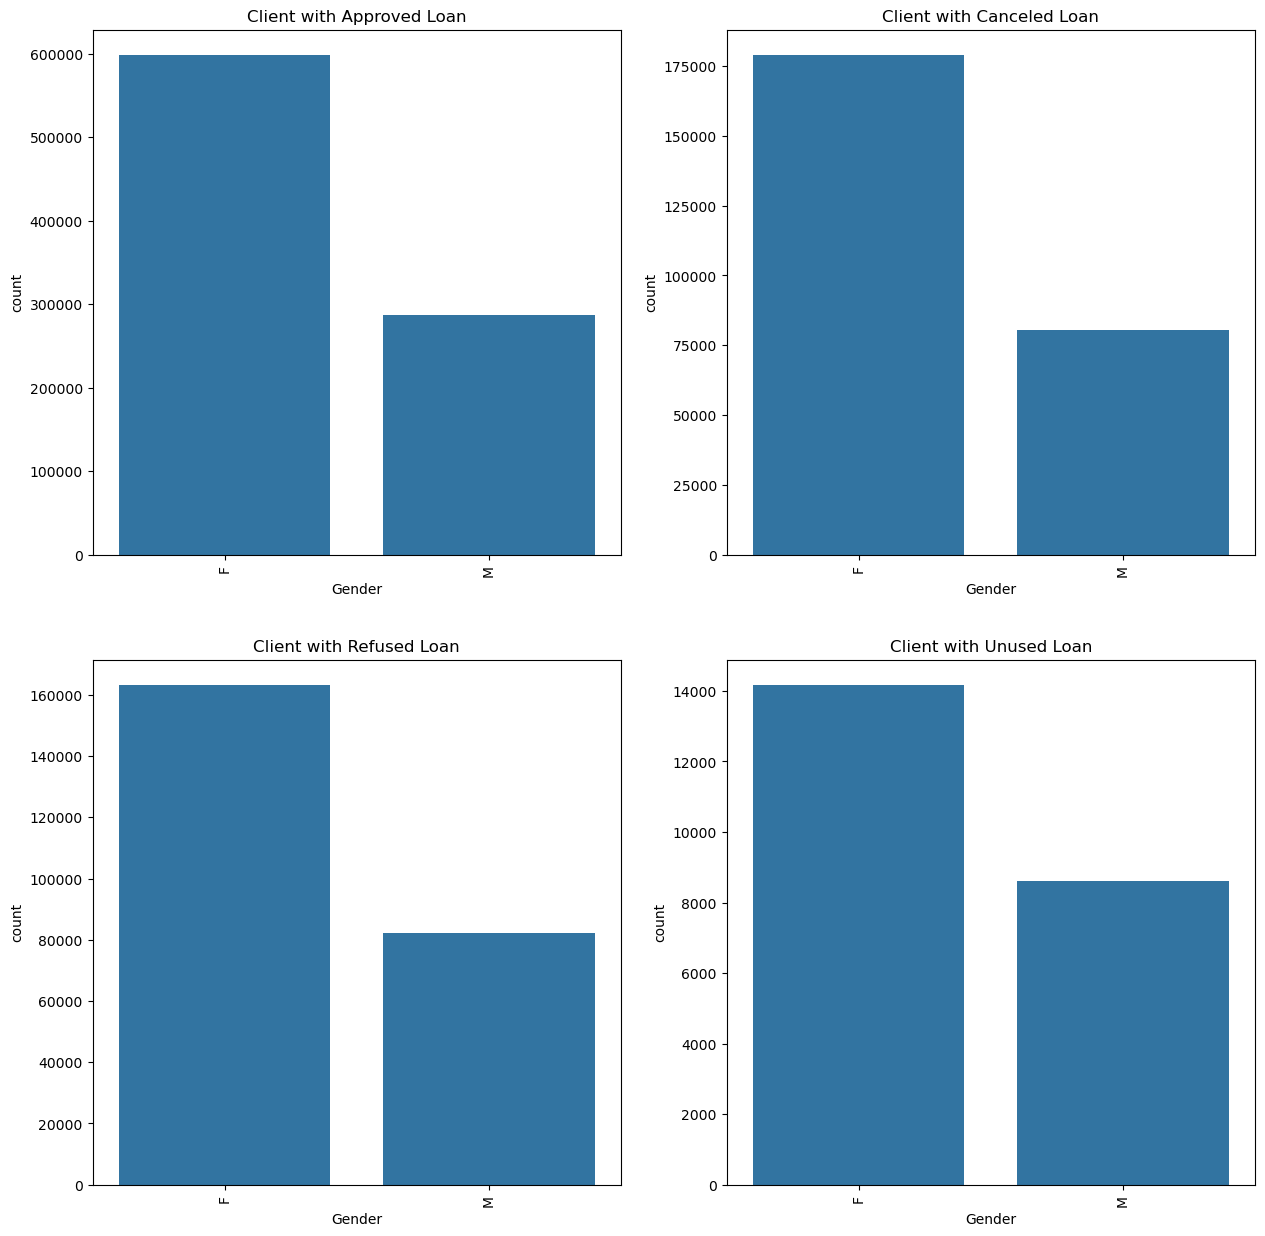

In [203]:
plt.figure(figsize=(15,15)) 

plt.subplot(221)
ax = sns.countplot(data= df_Approved,x='CODE_GENDER')
plt.xlabel("Gender")
plt.xticks(rotation=90)
plt.title('Client with Approved Loan')

plt.subplot(222)
ax = sns.countplot(data=df_Canceled,x='CODE_GENDER')
plt.xlabel("Gender")
plt.title('Client with Canceled Loan')
plt.xticks(rotation=90)

plt.subplot(223)
ax = sns.countplot(data= df_Refused,x='CODE_GENDER')
plt.xlabel("Gender")
plt.xticks(rotation=90)
plt.title('Client with Refused Loan')

plt.subplot(224)
ax = sns.countplot(data=df_UnusedOffer,x='CODE_GENDER')
plt.xlabel("Gender")
plt.title('Client with Unused Loan')
plt.xticks(rotation=90)

# plt.savefig('CodeGen.png', bbox_inches='tight')

plt.show()

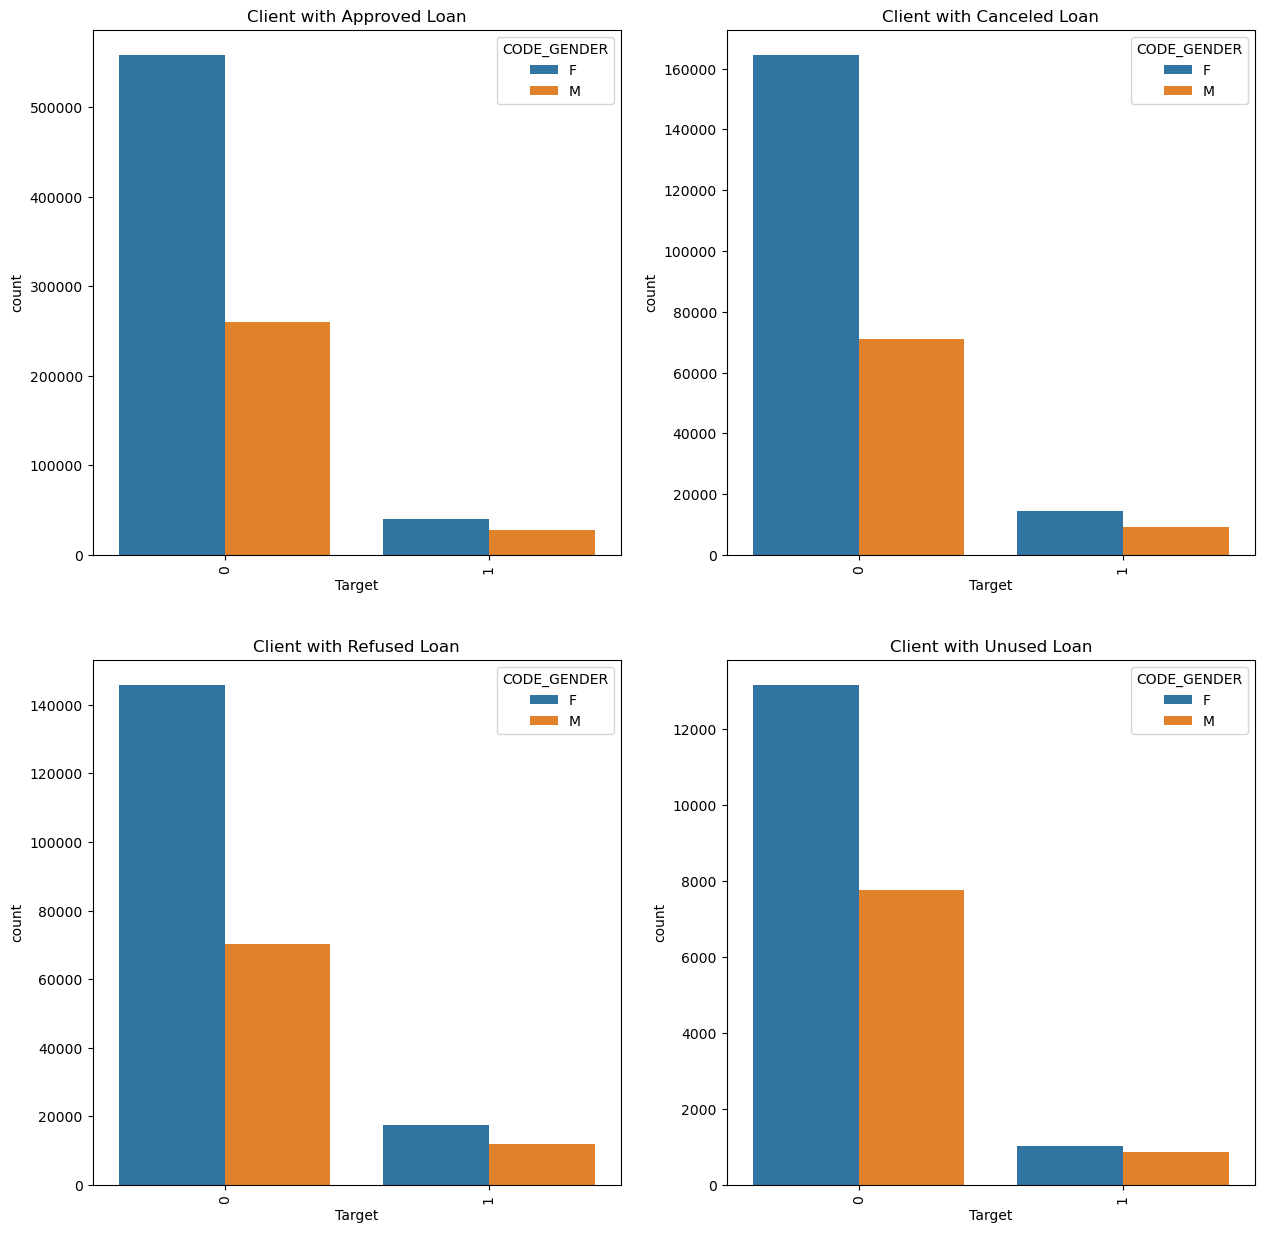

In [204]:
plt.figure(figsize=(15,15)) 

plt.subplot(221)
ax = sns.countplot(data= df_Approved,x='TARGET', hue = "CODE_GENDER")
plt.xlabel("Target")
plt.xticks(rotation=90)
plt.title('Client with Approved Loan')

plt.subplot(222)
ax = sns.countplot(data=df_Canceled,x='TARGET', hue = "CODE_GENDER")
plt.xlabel("Target")
plt.title('Client with Canceled Loan')
plt.xticks(rotation=90)

plt.subplot(223)
ax = sns.countplot(data= df_Refused,x='TARGET', hue = "CODE_GENDER")
plt.xlabel("Target")
plt.xticks(rotation=90)
plt.title('Client with Refused Loan')

plt.subplot(224)
ax = sns.countplot(data=df_UnusedOffer,x='TARGET', hue = "CODE_GENDER")
plt.xlabel("Target")
plt.title('Client with Unused Loan')
plt.xticks(rotation=90)

# plt.savefig('TarGen.png', bbox_inches='tight')

plt.show()

Females are most likely to get their loan cancelled than male due to more applications as compared to other gender

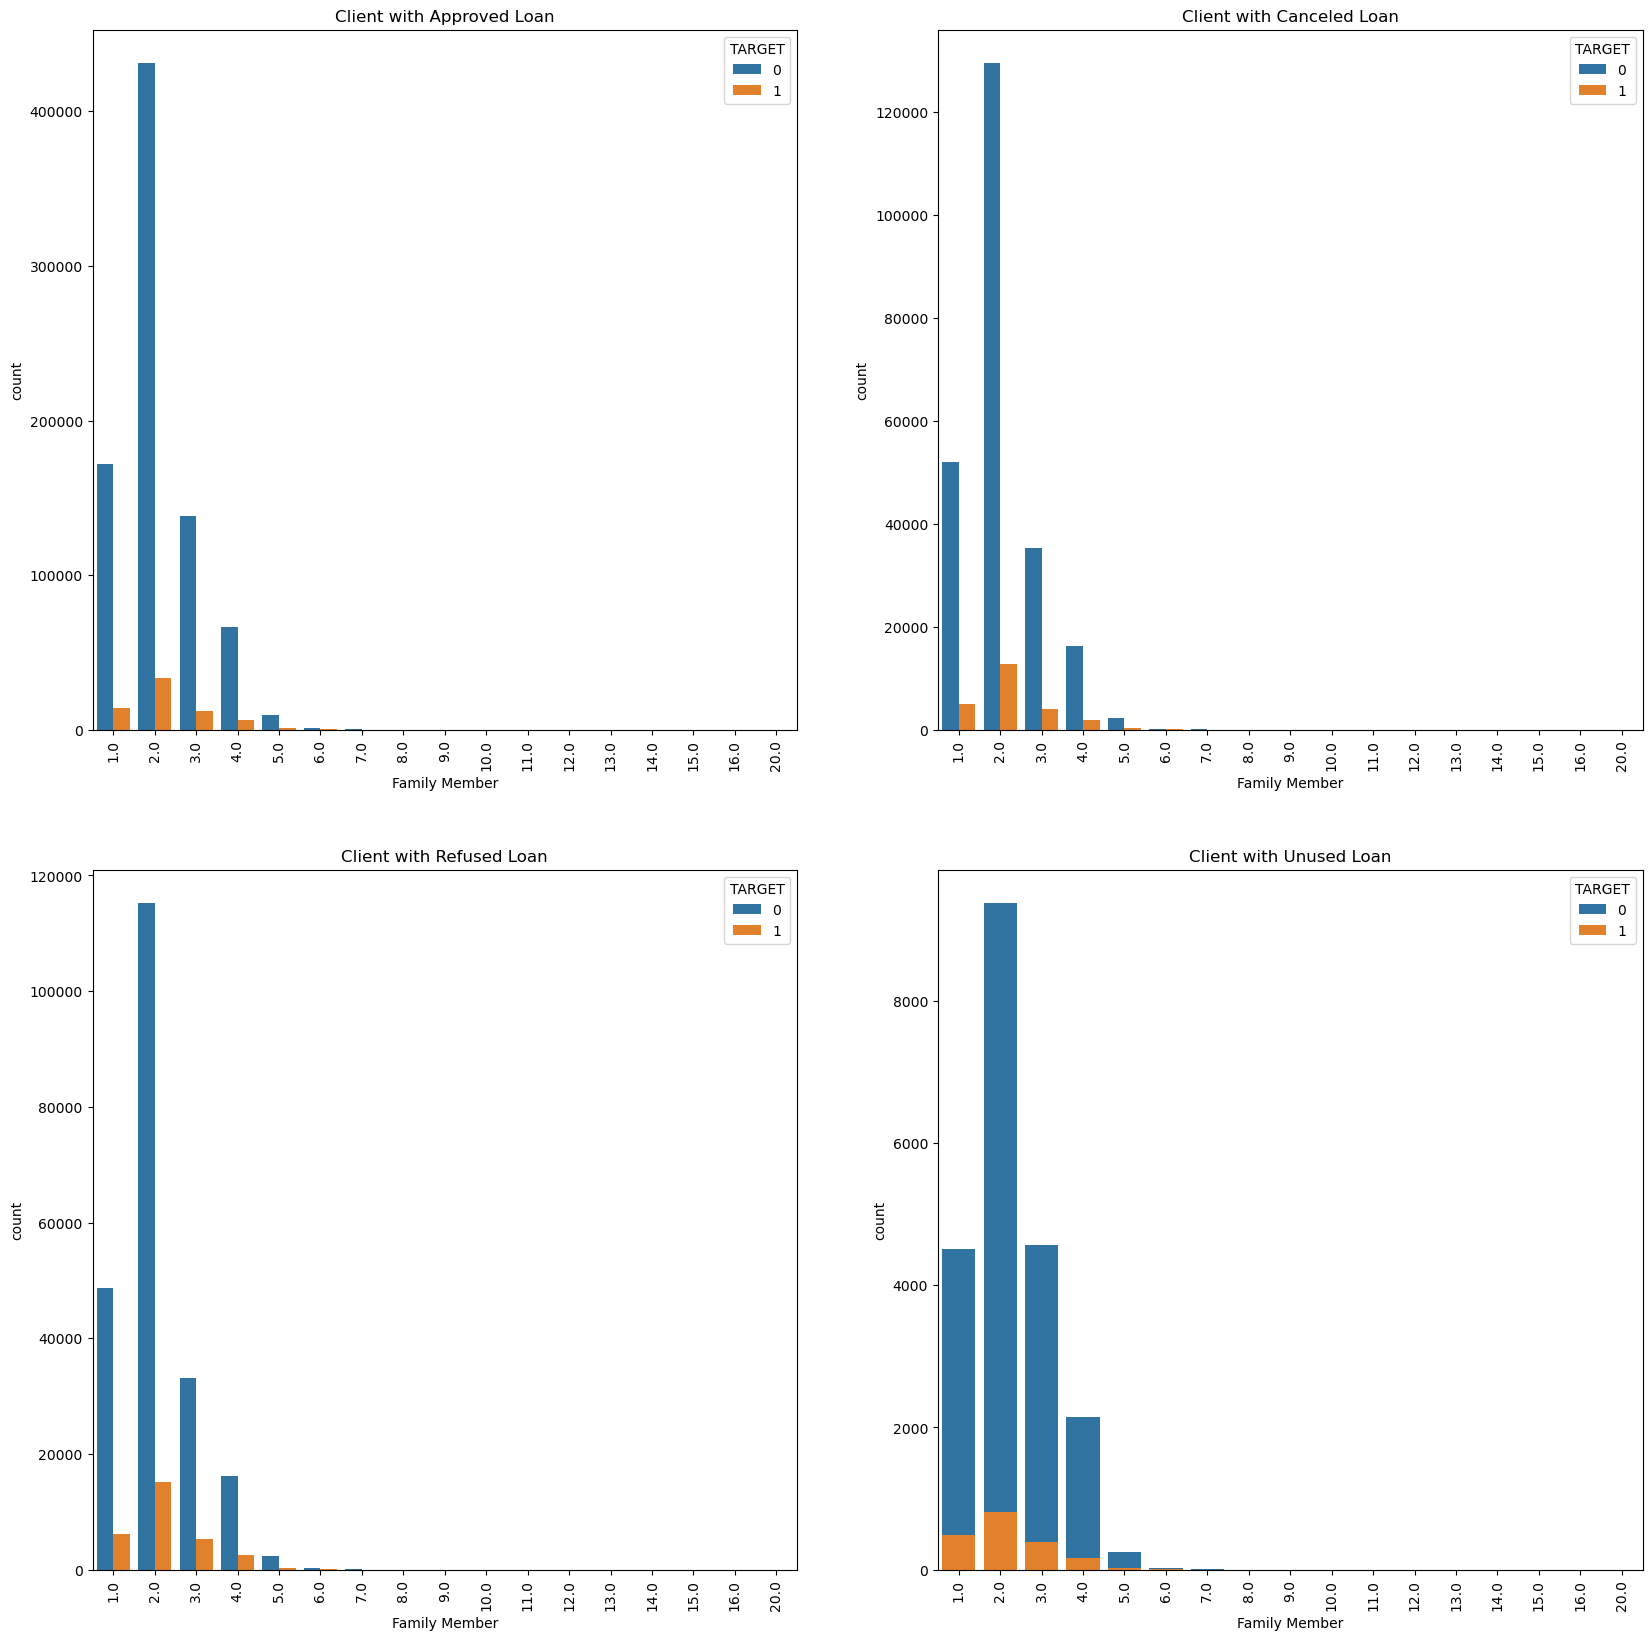

In [206]:
plt.figure(figsize=(20,20)) 

plt.subplot(221)
ax = sns.countplot(data= df_Approved,x='CNT_FAM_MEMBERS', hue = "TARGET")
plt.xlabel("Family Member")
plt.xticks(rotation=90)
plt.title('Client with Approved Loan')

plt.subplot(222)
ax = sns.countplot(data=df_Canceled,x='CNT_FAM_MEMBERS', hue = "TARGET")
plt.xlabel("Family Member")
plt.title('Client with Canceled Loan')
plt.xticks(rotation=90)

plt.subplot(223)
ax = sns.countplot(data= df_Refused,x='CNT_FAM_MEMBERS', hue = "TARGET")
plt.xlabel("Family Member")
plt.xticks(rotation=90)
plt.title('Client with Refused Loan')

plt.subplot(224)
ax = sns.countplot(data=df_UnusedOffer,x='CNT_FAM_MEMBERS', hue = "TARGET")
plt.xlabel("Family Member")
plt.title('Client with Unused Loan')
plt.xticks(rotation=90)

# plt.savefig('FamTar.png', bbox_inches='tight')

plt.show()

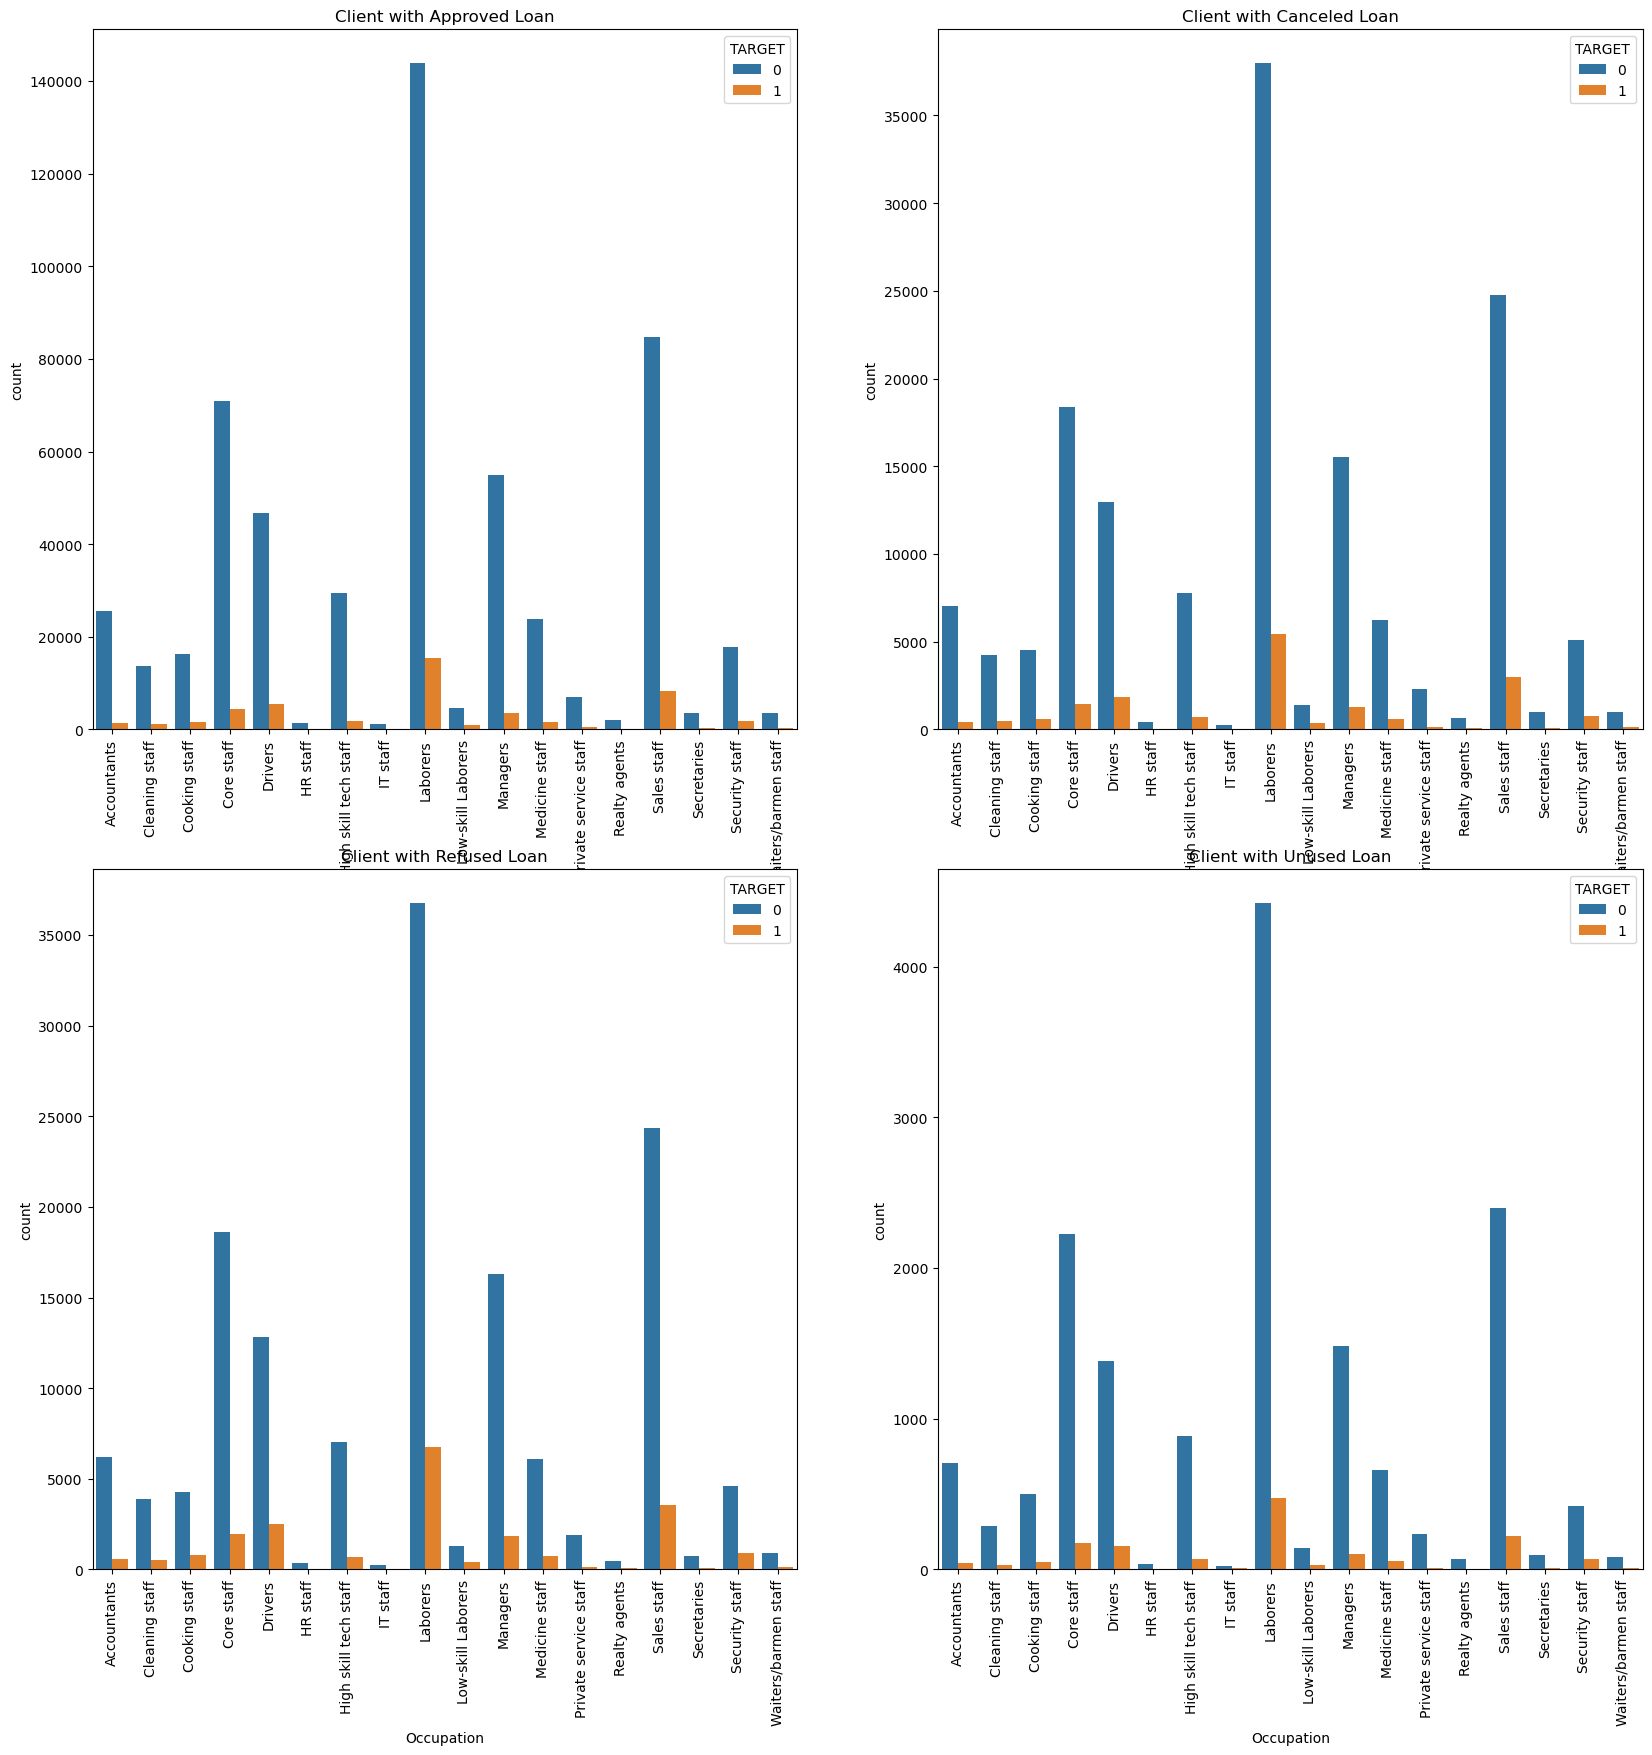

In [207]:
plt.figure(figsize=(20,20)) 

plt.subplot(221)
ax = sns.countplot(data= df_Approved,x='OCCUPATION_TYPE', hue = "TARGET")
plt.xlabel("Occupation")
plt.xticks(rotation=90)
plt.title('Client with Approved Loan')

plt.subplot(222)
ax = sns.countplot(data=df_Canceled,x='OCCUPATION_TYPE', hue = "TARGET")
plt.xlabel("Occupation")
plt.title('Client with Canceled Loan')
plt.xticks(rotation=90)

plt.subplot(223)
ax = sns.countplot(data= df_Refused,x='OCCUPATION_TYPE', hue = "TARGET")
plt.xlabel("Occupation")
plt.xticks(rotation=90)
plt.title('Client with Refused Loan')

plt.subplot(224)
ax = sns.countplot(data=df_UnusedOffer,x='OCCUPATION_TYPE', hue = "TARGET")
plt.xlabel("Occupation")
plt.title('Client with Unused Loan')
plt.xticks(rotation=90)
# plt.savefig('OccupTar.png', bbox_inches='tight')

plt.show()

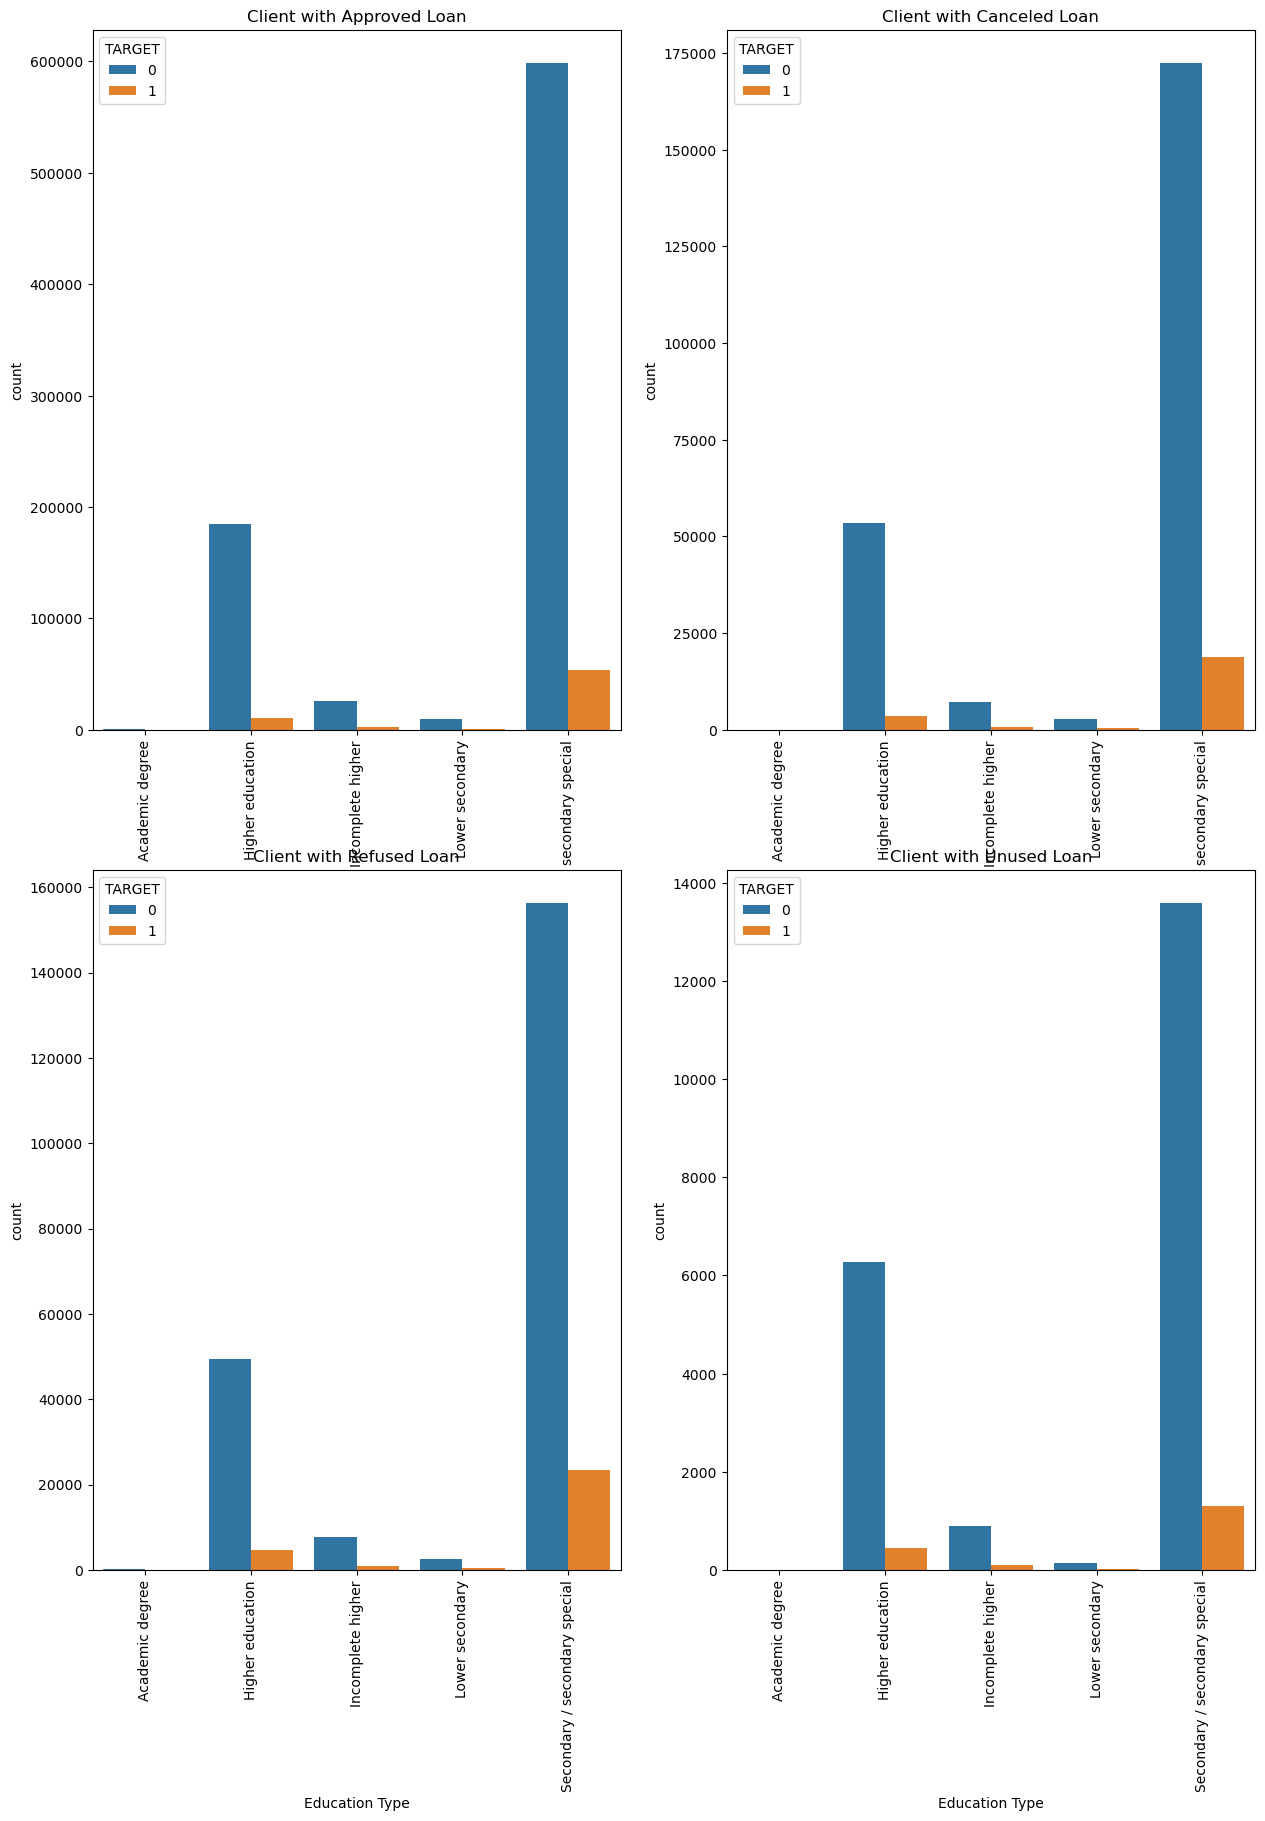

In [208]:
plt.figure(figsize=(15,20)) 

plt.subplot(221)
ax = sns.countplot(data= df_Approved,x='NAME_EDUCATION_TYPE', hue = "TARGET")
plt.xlabel("Education Type")
plt.xticks(rotation=90)
plt.title('Client with Approved Loan')

plt.subplot(222)
ax = sns.countplot(data=df_Canceled,x='NAME_EDUCATION_TYPE', hue = "TARGET")
plt.xlabel("Education Type")
plt.title('Client with Canceled Loan')
plt.xticks(rotation=90)

plt.subplot(223)
ax = sns.countplot(data= df_Refused,x='NAME_EDUCATION_TYPE', hue = "TARGET")
plt.xlabel("Education Type")
plt.xticks(rotation=90)
plt.title('Client with Refused Loan')

plt.subplot(224)
ax = sns.countplot(data=df_UnusedOffer,x='NAME_EDUCATION_TYPE', hue = "TARGET")
plt.xlabel("Education Type")
plt.title('Client with Unused Loan')
plt.xticks(rotation=90)

# plt.savefig('EducTar.png', bbox_inches='tight')

plt.show()

Bank should target the client with Education type Academic Degree and Higher Education

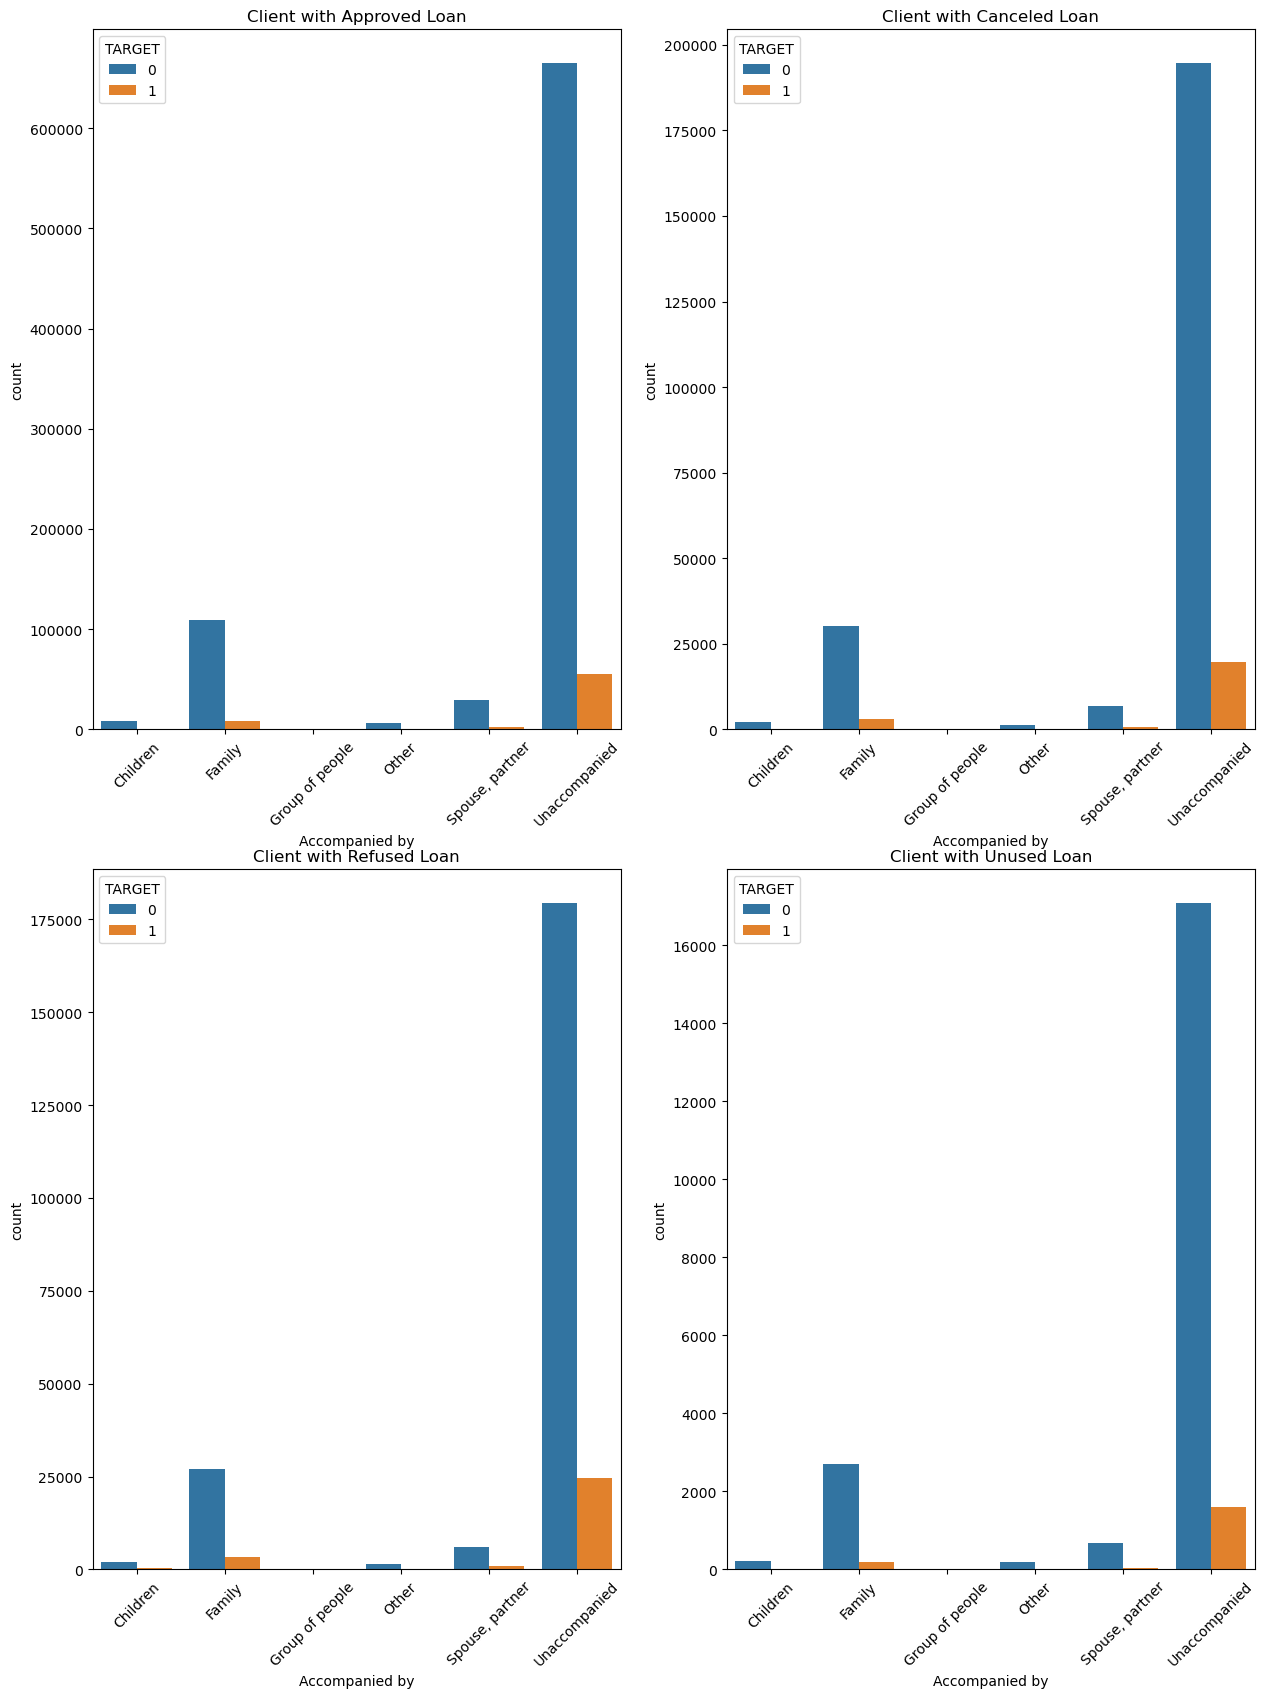

In [210]:
plt.figure(figsize=(15,20)) 

plt.subplot(221)
ax = sns.countplot(data= df_Approved,x='NAME_TYPE_SUITE', hue = "TARGET")
plt.xlabel("Accompanied by")
plt.xticks(rotation=45)
plt.title('Client with Approved Loan')

plt.subplot(222)
ax = sns.countplot(data=df_Canceled,x='NAME_TYPE_SUITE', hue = "TARGET")
plt.xlabel("Accompanied by")
plt.title('Client with Canceled Loan')
plt.xticks(rotation=45)

plt.subplot(223)
ax = sns.countplot(data= df_Refused,x='NAME_TYPE_SUITE', hue = "TARGET")
plt.xlabel("Accompanied by")
plt.xticks(rotation=45)
plt.title('Client with Refused Loan')

plt.subplot(224)
ax = sns.countplot(data=df_UnusedOffer,x='NAME_TYPE_SUITE', hue = "TARGET")
plt.xlabel("Accompanied by")
plt.title('Client with Unused Loan')
plt.xticks(rotation=45)
# plt.savefig('TPSTar.png', bbox_inches='tight')

plt.show()

Most of the client were unaccompanied, the bank can induce some rule to have someone accompanying during the process.

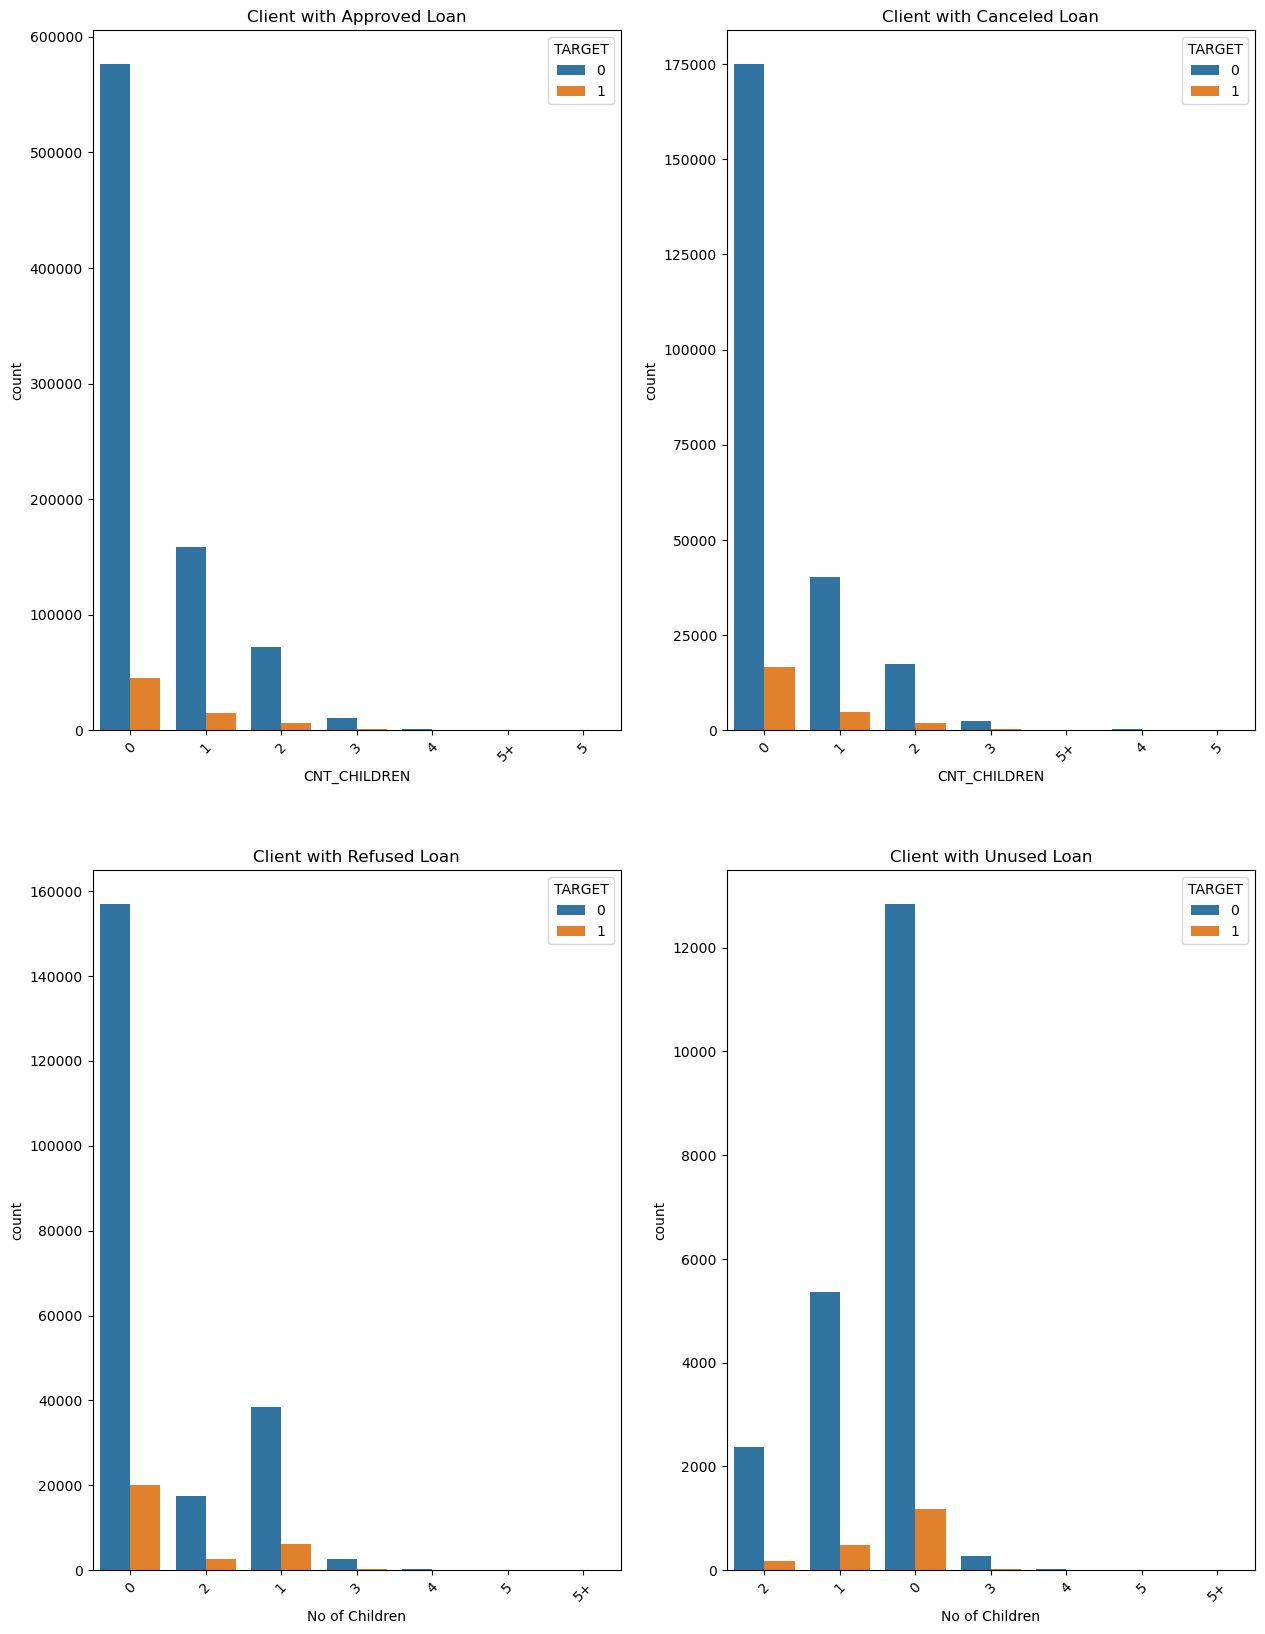

In [212]:
plt.figure(figsize=(15,20)) 

plt.subplot(221)
ax = sns.countplot(data= df_Approved,x='CNT_CHILDREN', hue = "TARGET")
plt.xticks(rotation=45)
plt.title('Client with Approved Loan')

plt.subplot(222)
ax = sns.countplot(data=df_Canceled,x='CNT_CHILDREN', hue = "TARGET")
plt.title('Client with Canceled Loan')
plt.xticks(rotation=45)

plt.subplot(223)
ax = sns.countplot(data= df_Refused,x='CNT_CHILDREN', hue = "TARGET")
plt.xlabel("No of Children")
plt.xticks(rotation=45)
plt.title('Client with Refused Loan')

plt.subplot(224)
ax = sns.countplot(data=df_UnusedOffer,x='CNT_CHILDREN', hue = "TARGET")
plt.xlabel("No of Children")
plt.title('Client with Unused Loan')
plt.xticks(rotation=45)
# plt.savefig('CLDNTar.png', bbox_inches='tight')


plt.show()

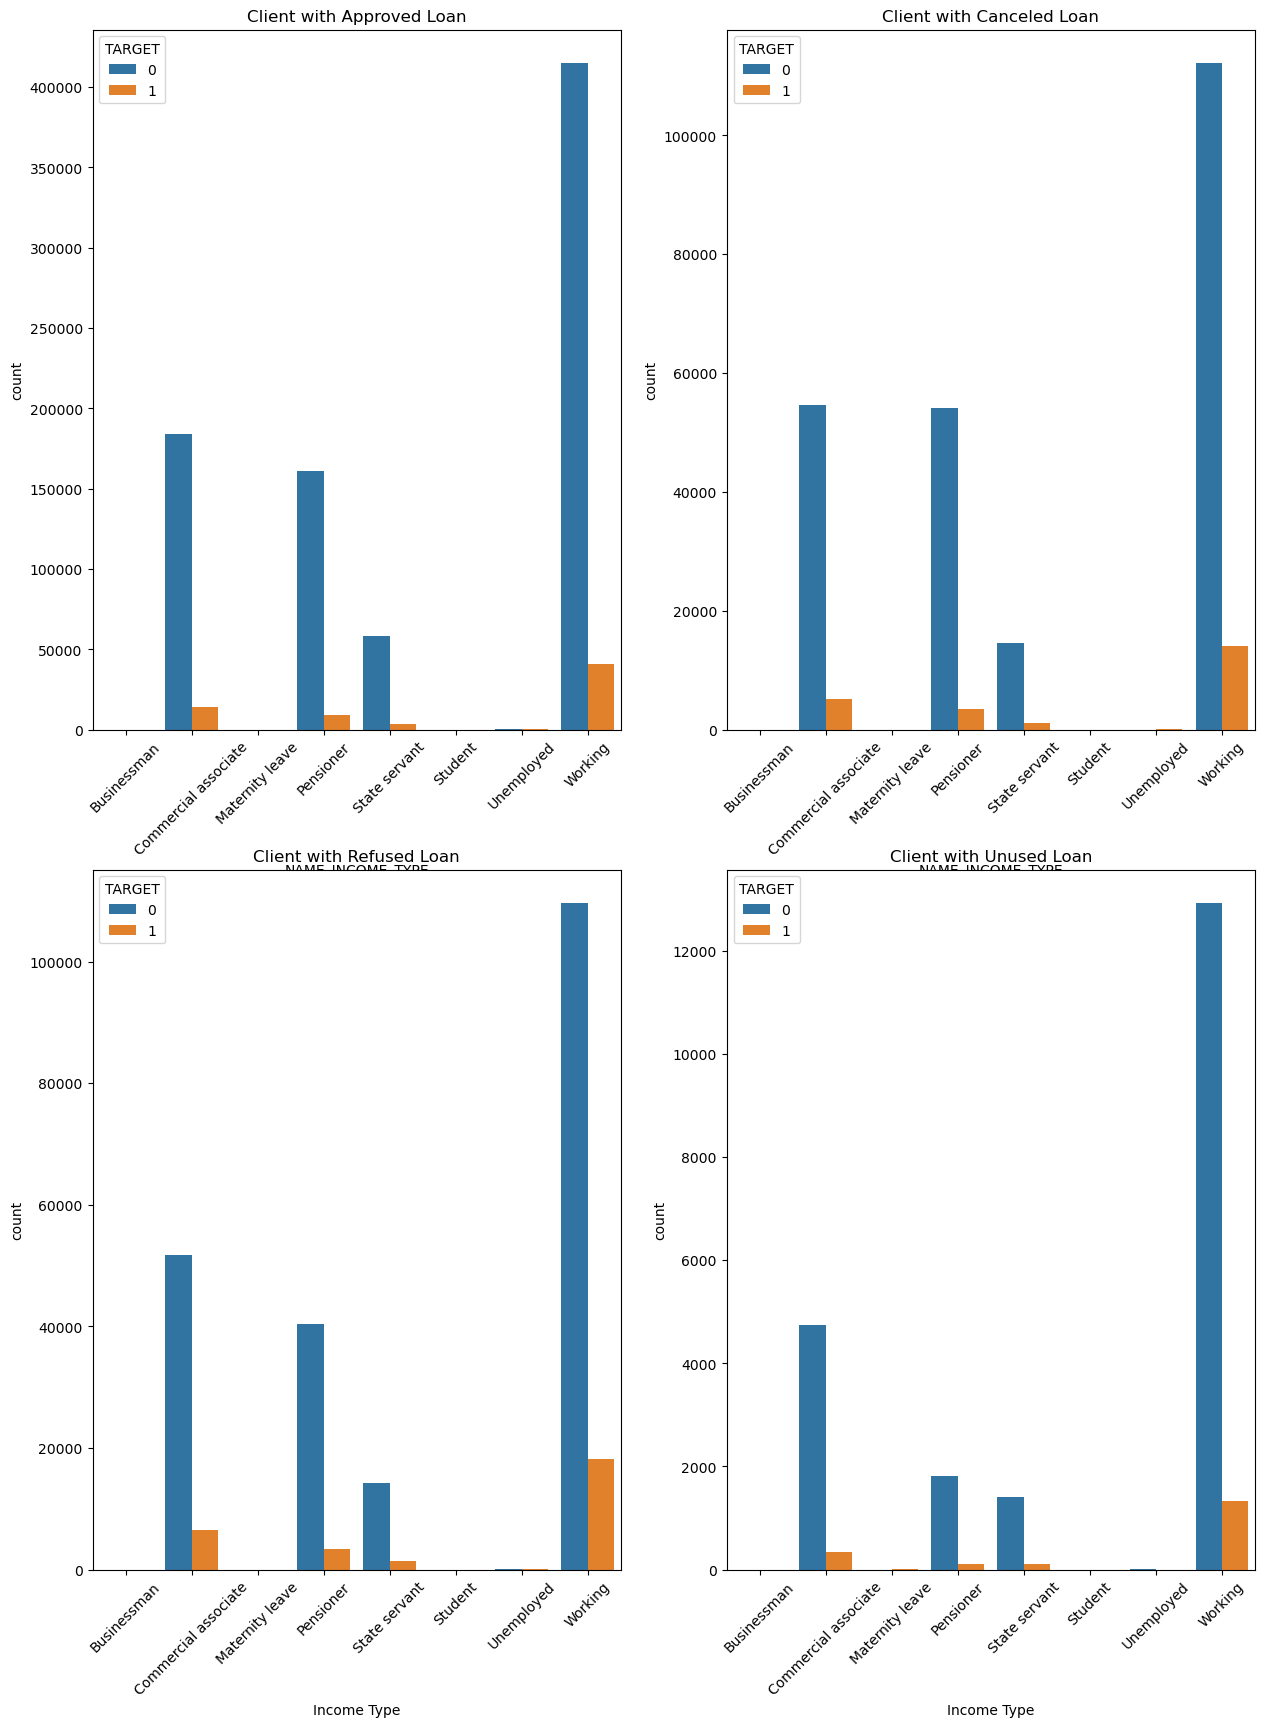

In [213]:
plt.figure(figsize=(15,20)) 

plt.subplot(221)
ax = sns.countplot(data= df_Approved,x='NAME_INCOME_TYPE', hue = "TARGET")
plt.xticks(rotation=45)
plt.title('Client with Approved Loan')

plt.subplot(222)
ax = sns.countplot(data=df_Canceled,x='NAME_INCOME_TYPE', hue = "TARGET")
plt.title('Client with Canceled Loan')
plt.xticks(rotation=45)

plt.subplot(223)
ax = sns.countplot(data= df_Refused,x='NAME_INCOME_TYPE', hue = "TARGET")
plt.xlabel("Income Type")
plt.xticks(rotation=45)
plt.title('Client with Refused Loan')

plt.subplot(224)
ax = sns.countplot(data=df_UnusedOffer,x='NAME_INCOME_TYPE', hue = "TARGET")
plt.xlabel("Income Type")
plt.title('Client with Unused Loan')
plt.xticks(rotation=45)
# plt.savefig('INCTar.png', bbox_inches='tight')

plt.show()

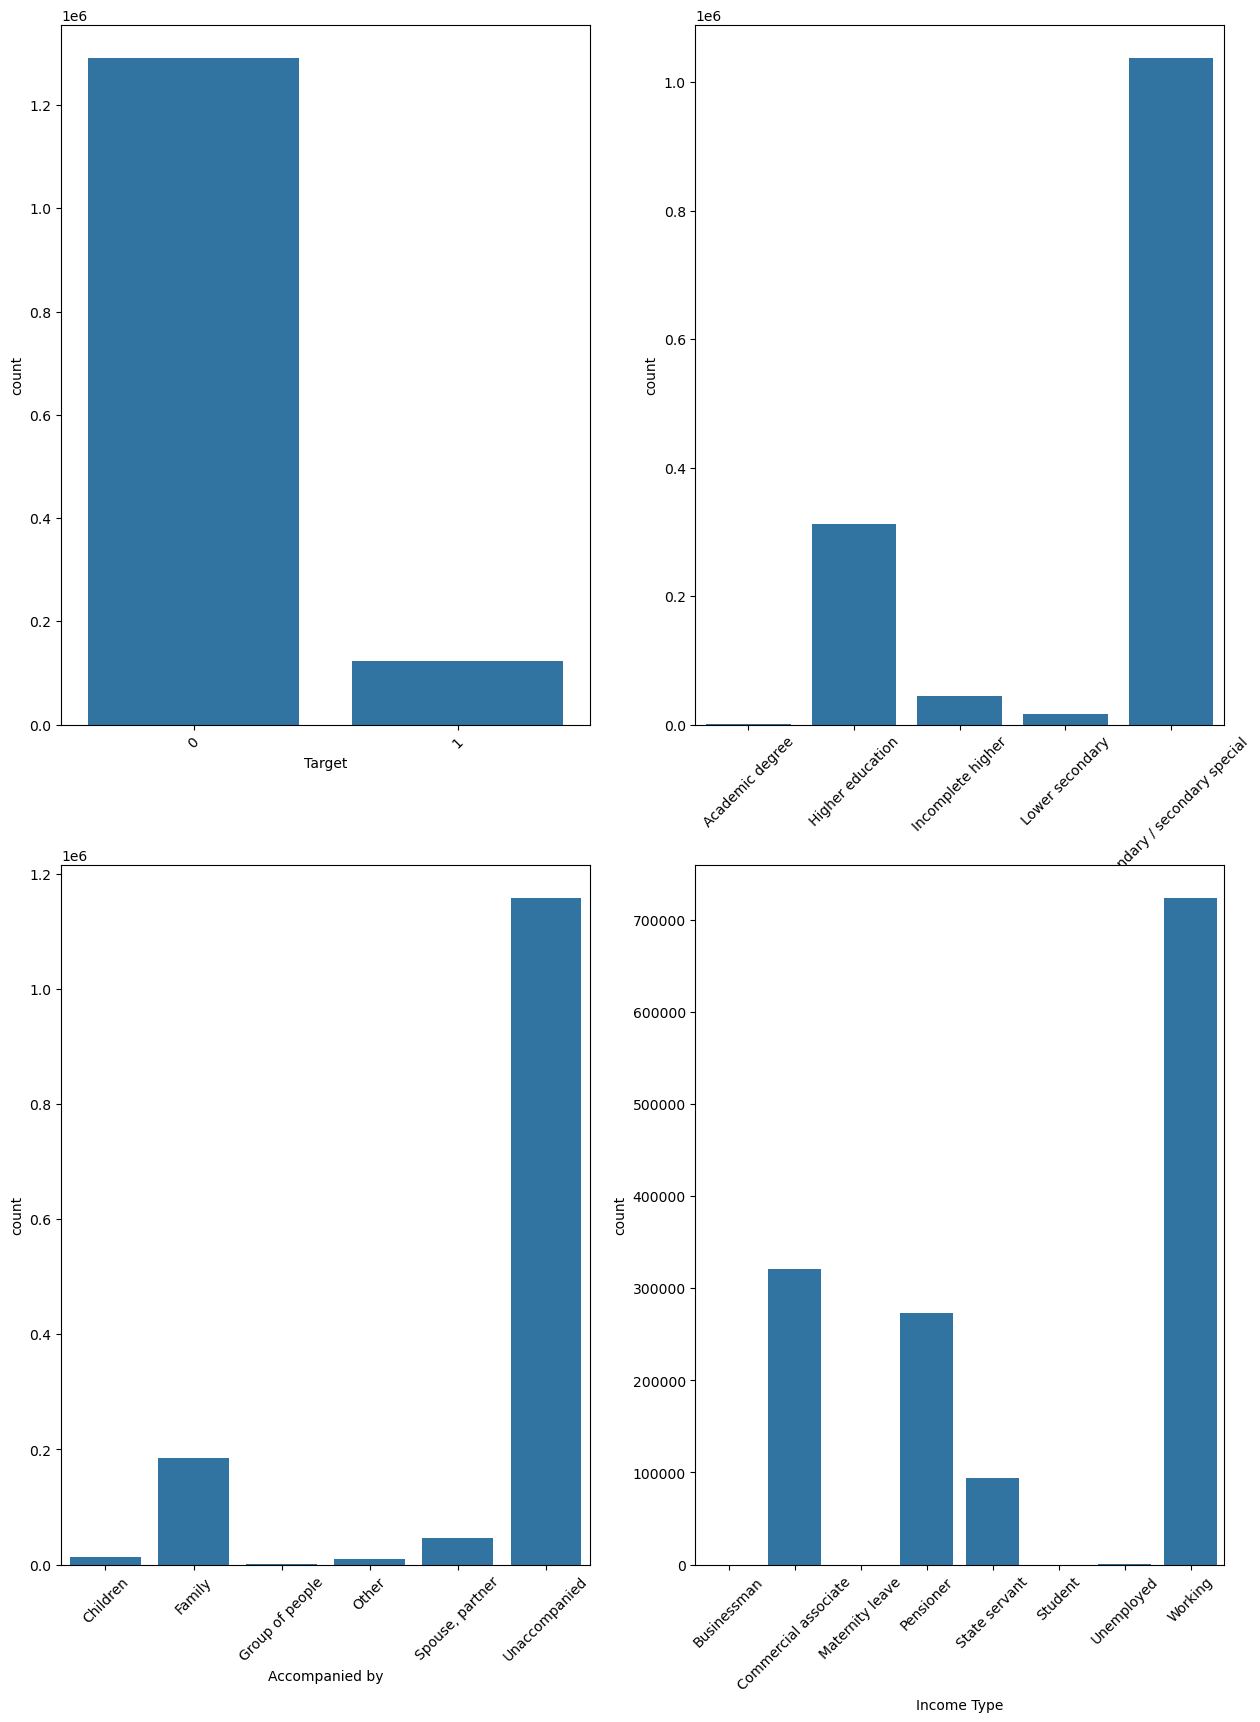

In [214]:
plt.figure(figsize=(15,20)) 

plt.subplot(221)
ax = sns.countplot(data= final_df,x='TARGET')
plt.xlabel("Target")
plt.xticks(rotation=45)

plt.subplot(222)
ax = sns.countplot(data=final_df,x='NAME_EDUCATION_TYPE')
plt.xlabel("Education")
plt.xticks(rotation=45)

plt.subplot(223)
ax = sns.countplot(data= final_df,x='NAME_TYPE_SUITE')
plt.xlabel("Accompanied by")
plt.xticks(rotation=45)

plt.subplot(224)
ax = sns.countplot(data=final_df,x='NAME_INCOME_TYPE')
plt.xlabel("Income Type")
plt.xticks(rotation=45)

plt.show()

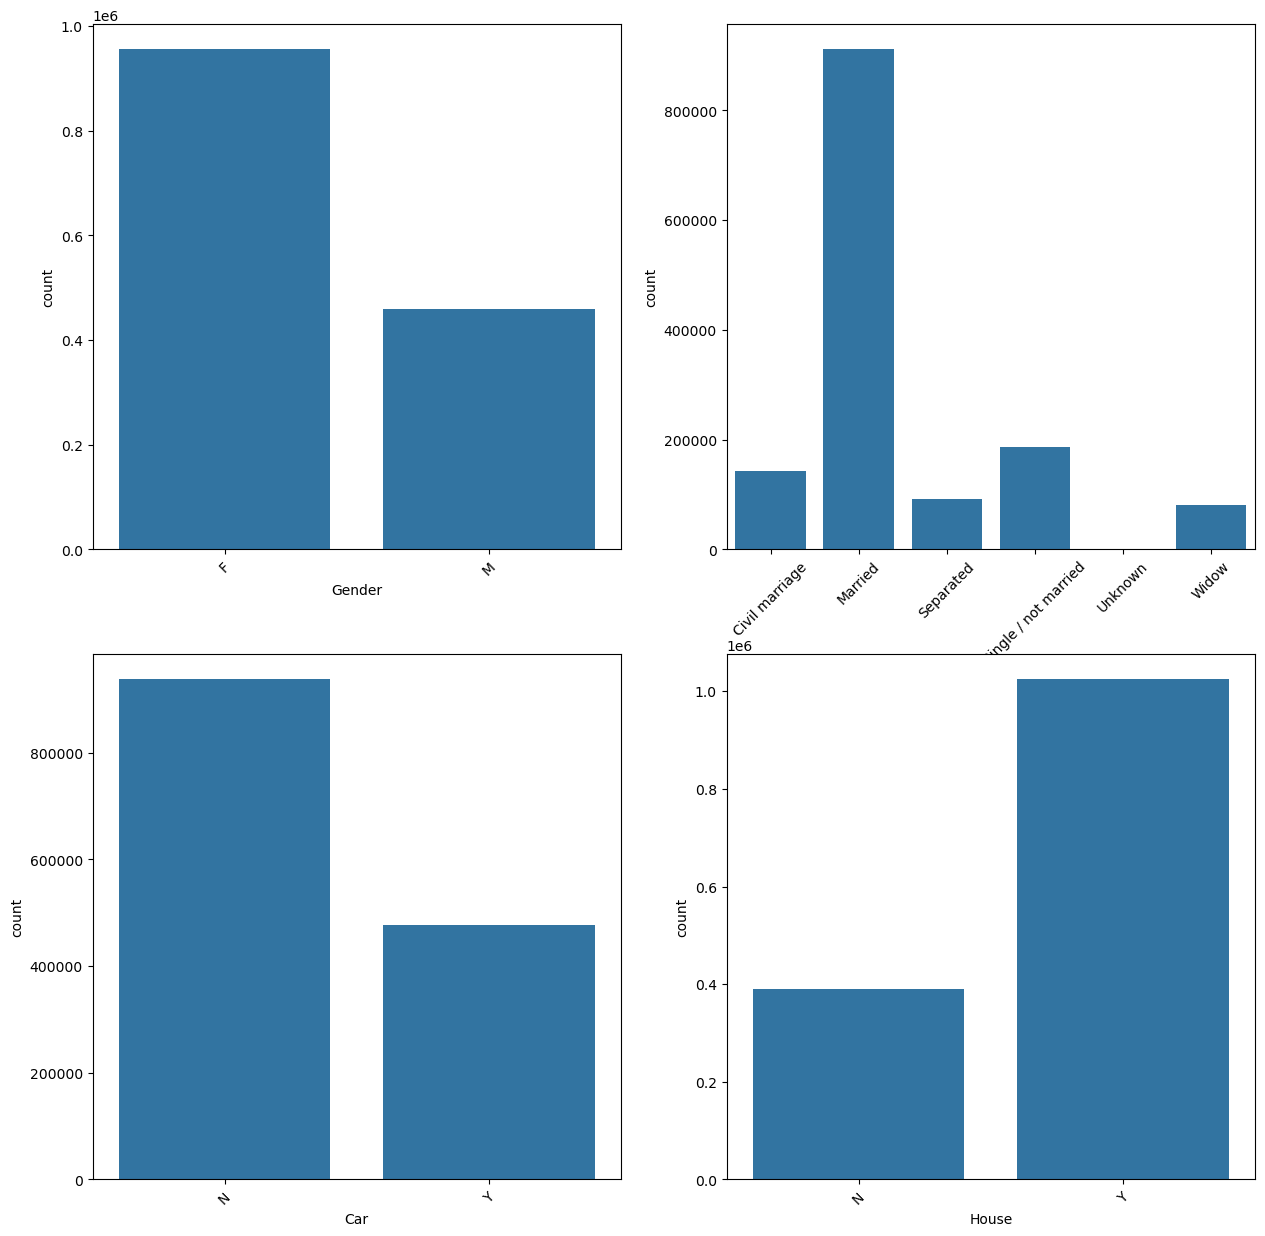

In [215]:
plt.figure(figsize=(15,15)) 


plt.subplot(221)
ax = sns.countplot(data= final_df,x='CODE_GENDER')
plt.xlabel("Gender")
plt.xticks(rotation=45)

plt.subplot(222)
ax = sns.countplot(data=final_df,x='NAME_FAMILY_STATUS')
plt.xlabel("Family Status")
plt.xticks(rotation=45)

plt.subplot(223)
ax = sns.countplot(data= final_df,x='FLAG_OWN_CAR')
plt.xlabel("Car")
plt.xticks(rotation=45)

plt.subplot(224)
ax = sns.countplot(data=final_df,x='FLAG_OWN_REALTY')
plt.xlabel("House")
plt.xticks(rotation=45)

plt.show()

[]

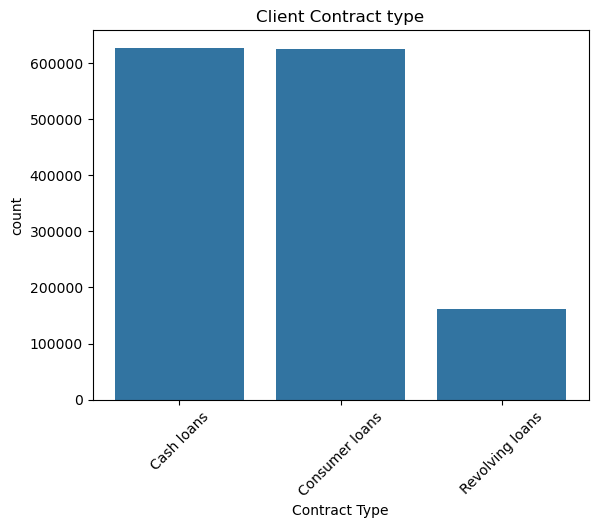

In [216]:
sns.countplot(data= final_df,x='NAME_CONTRACT_TYPE_y')
plt.xlabel("Contract Type")
plt.xticks(rotation=45)
plt.title('Client Contract type')
# plt.savefig('NAME_CONTRACT_TYPE_y.png', bbox_inches='tight')

plt.plot()

Cash loan is the most preferable loan type by the client

[]

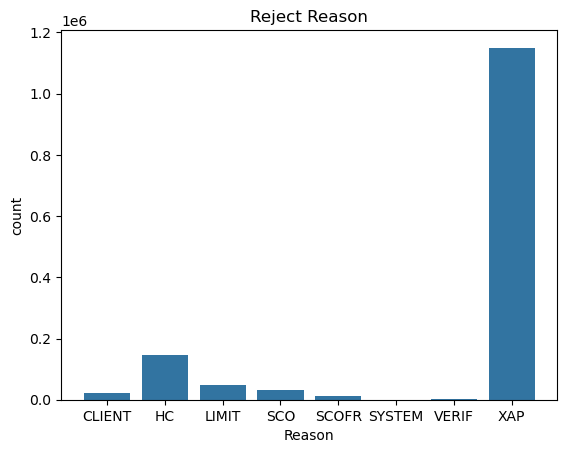

In [218]:
sns.countplot(data= final_df,x='CODE_REJECT_REASON')
plt.xlabel("Reason")
plt.title('Reject Reason')
# plt.savefig('CODE_REJECT_REASON.png', bbox_inches='tight')

plt.plot()

During the Cross application processing most of the loan application got rejected. Maybe the bank should gave more clear documentation or information to the client while applying for the process

[]

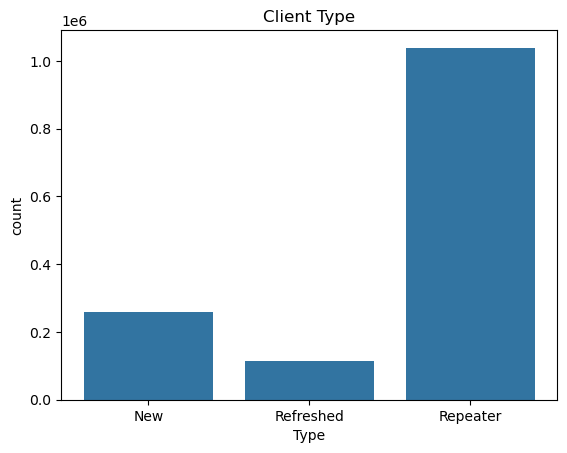

In [220]:
sns.countplot(data= final_df,x='NAME_CLIENT_TYPE')
plt.xlabel("Type")
plt.title('Client Type')
# plt.savefig('NAME_CLIENT_TYPE.png', bbox_inches='tight')

plt.plot()

Most of the Applications are repeater

[]

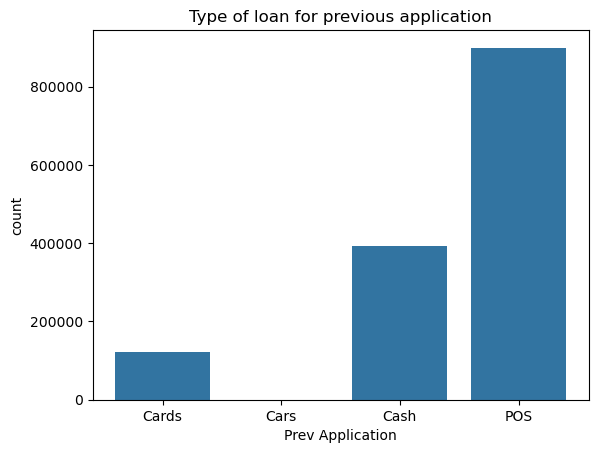

In [222]:
ax = sns.countplot(data= final_df,x='NAME_PORTFOLIO')
plt.xlabel("Prev Application")
plt.title('Type of loan for previous application')
# plt.savefig('NM_Port.png', bbox_inches='tight')
plt.plot()

Previous applications were mostly on POS

[]

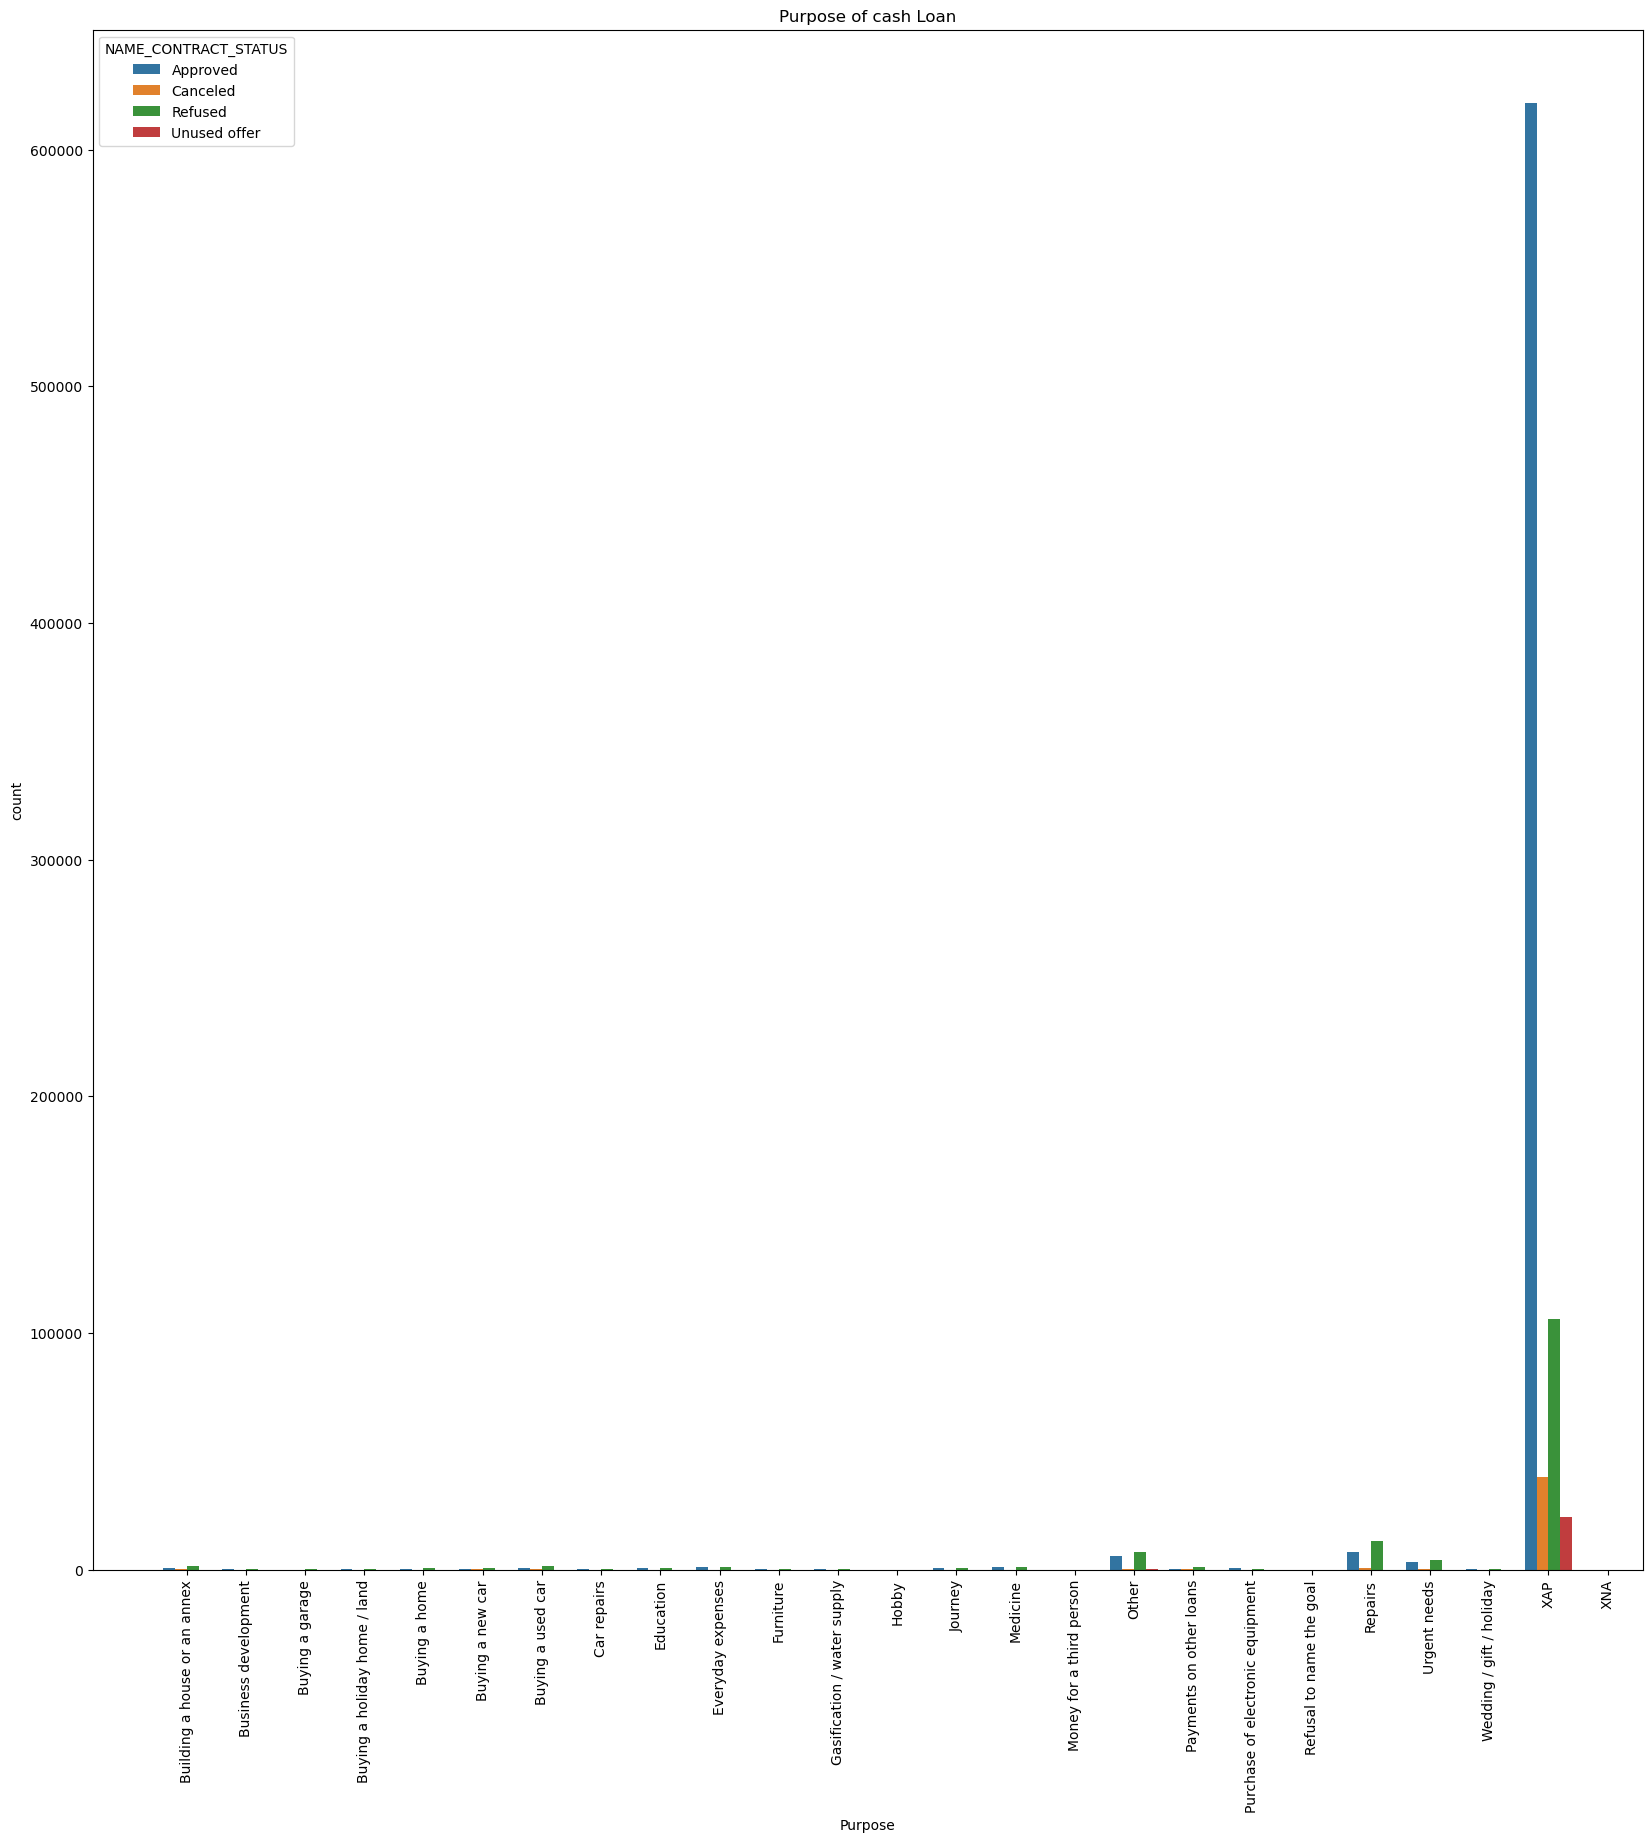

In [224]:
plt.figure(figsize=(20,20)) 

Not_XNA = final_df[final_df['NAME_CASH_LOAN_PURPOSE'] != 'XNA']
#We have a lot of count for XNA, we will exclude them in the plot

ax = sns.countplot(data= Not_XNA,x='NAME_CASH_LOAN_PURPOSE',hue="NAME_CONTRACT_STATUS")
plt.xlabel("Purpose")
plt.title('Purpose of cash Loan')   
plt.xticks(rotation=90)
# plt.savefig('LN_PUR.png', bbox_inches='tight')

plt.plot()

[]

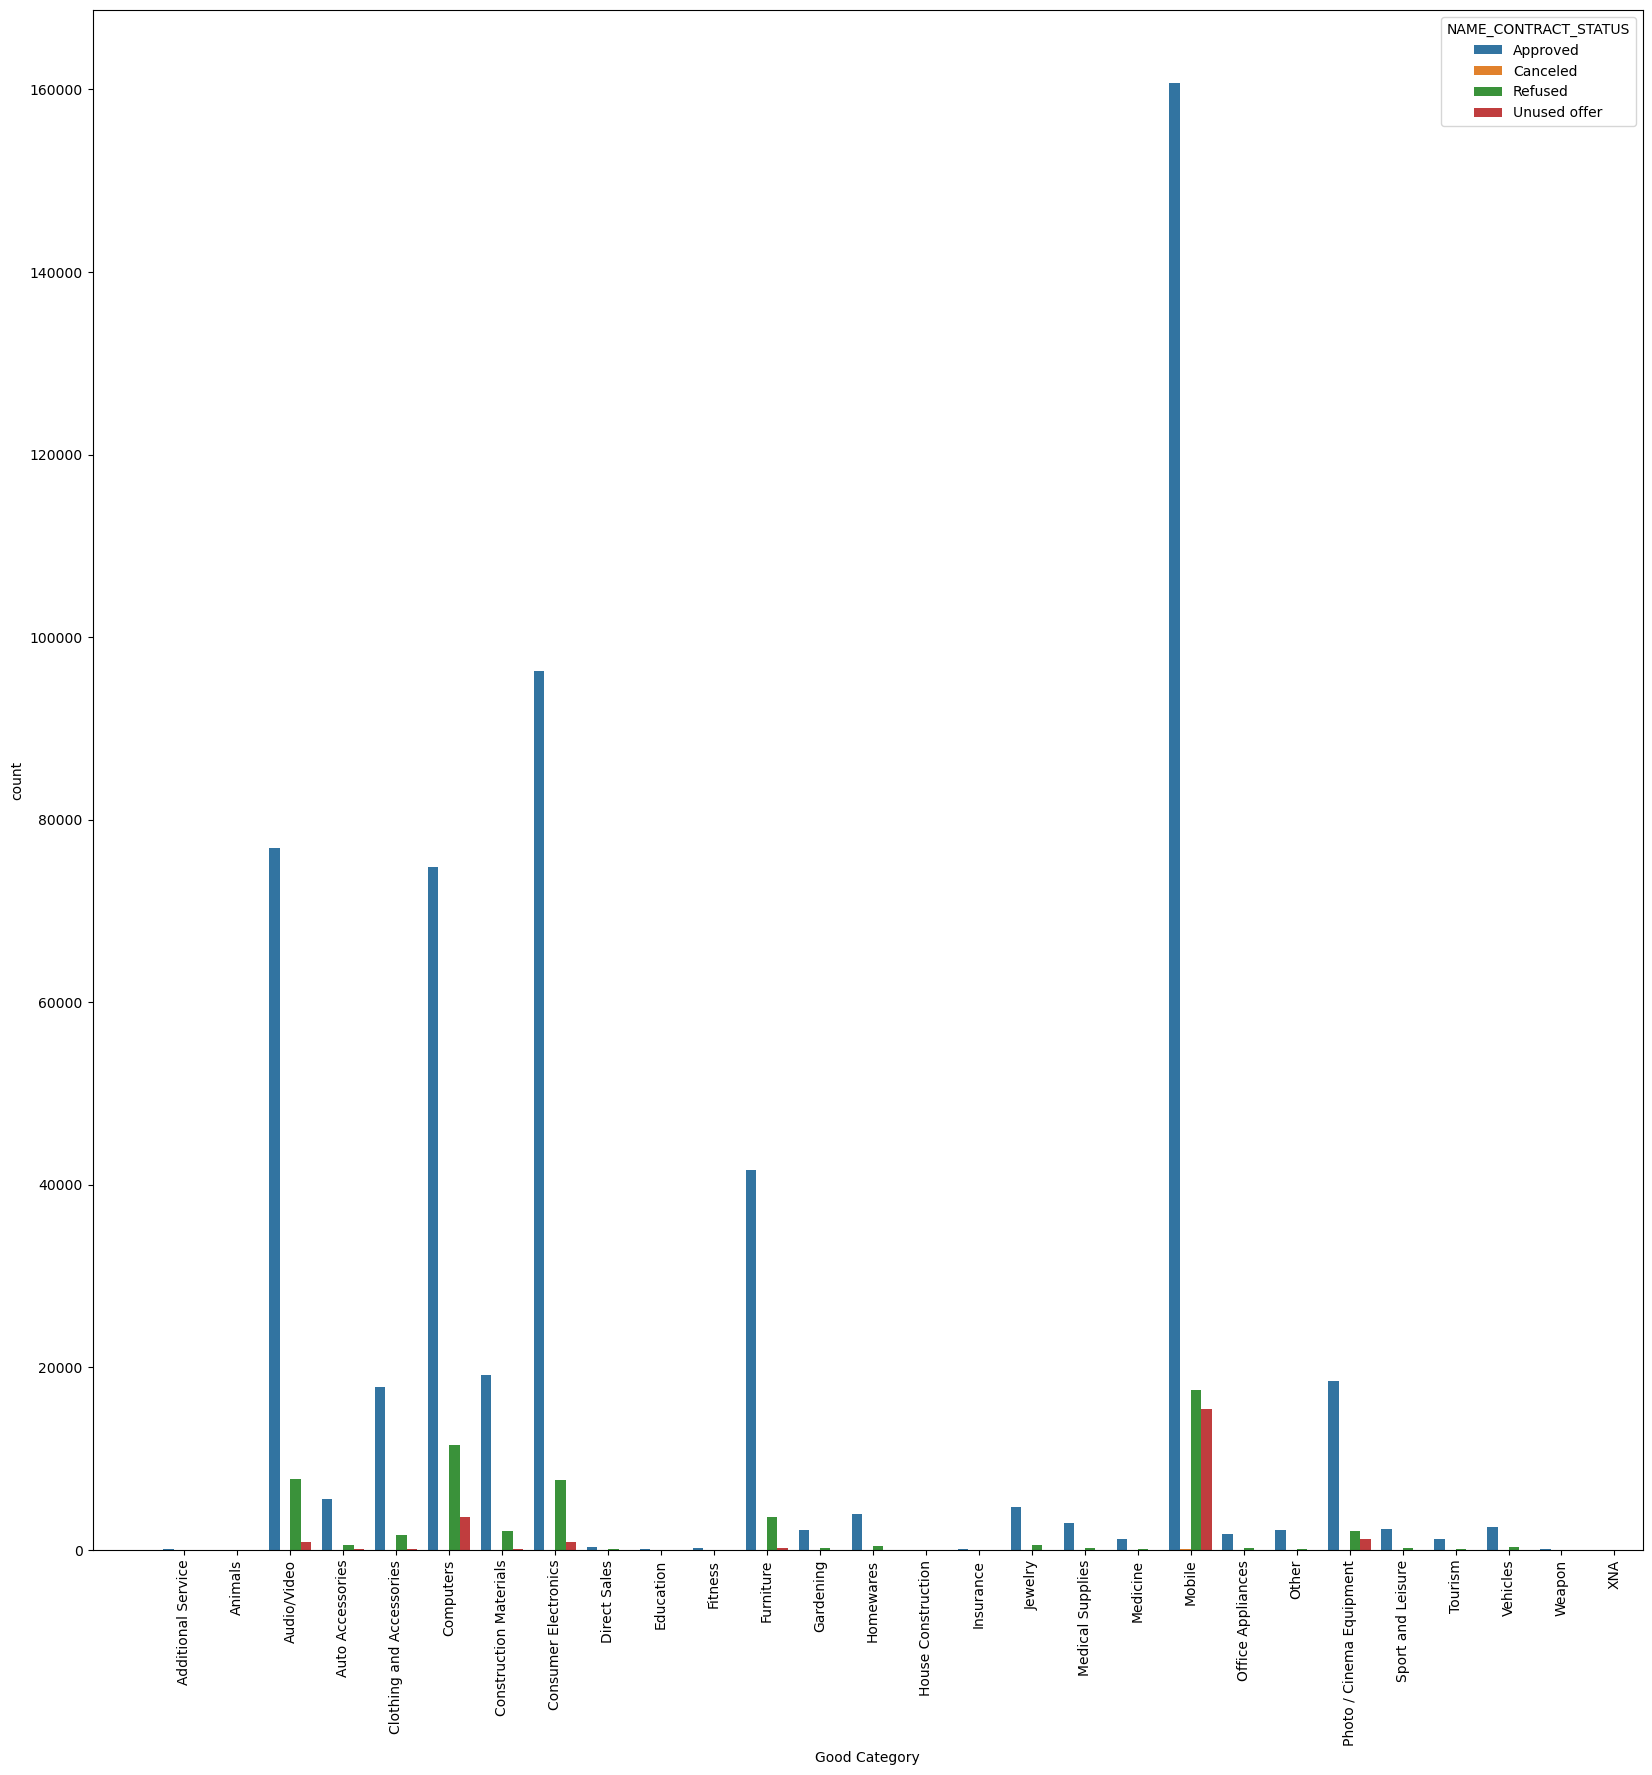

In [225]:
plt.figure(figsize=(20,20)) 

Not_XNA = final_df[final_df['NAME_GOODS_CATEGORY'] != 'XNA']
#We have a lot of count for XNA, we will exclude them in the plot

ax = sns.countplot(data= Not_XNA,x='NAME_GOODS_CATEGORY',hue="NAME_CONTRACT_STATUS")
plt.xlabel("Good Category")
plt.xticks(rotation=90)

plt.plot()

[]

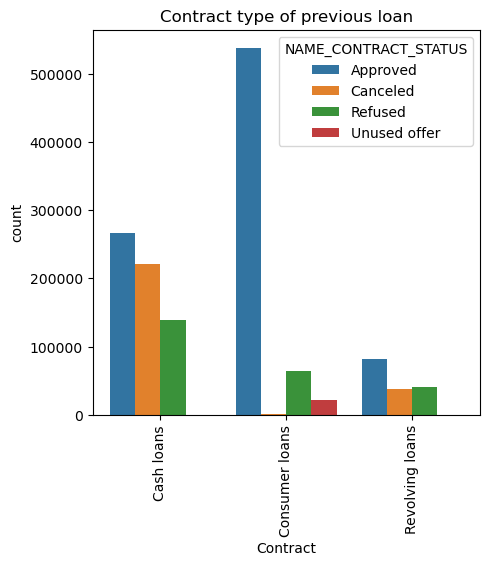

In [226]:
plt.figure(figsize=(5,5)) 

sns.countplot(data= final_df,x='NAME_CONTRACT_TYPE_y',hue="NAME_CONTRACT_STATUS")
plt.xlabel("Contract")
plt.title('Contract type of previous loan')   
plt.xticks(rotation=90)

# plt.savefig('ctrTypeSts.png', bbox_inches='tight')


plt.plot()

Most of the approved application were Consumer Loan that people used for their personal use

[]

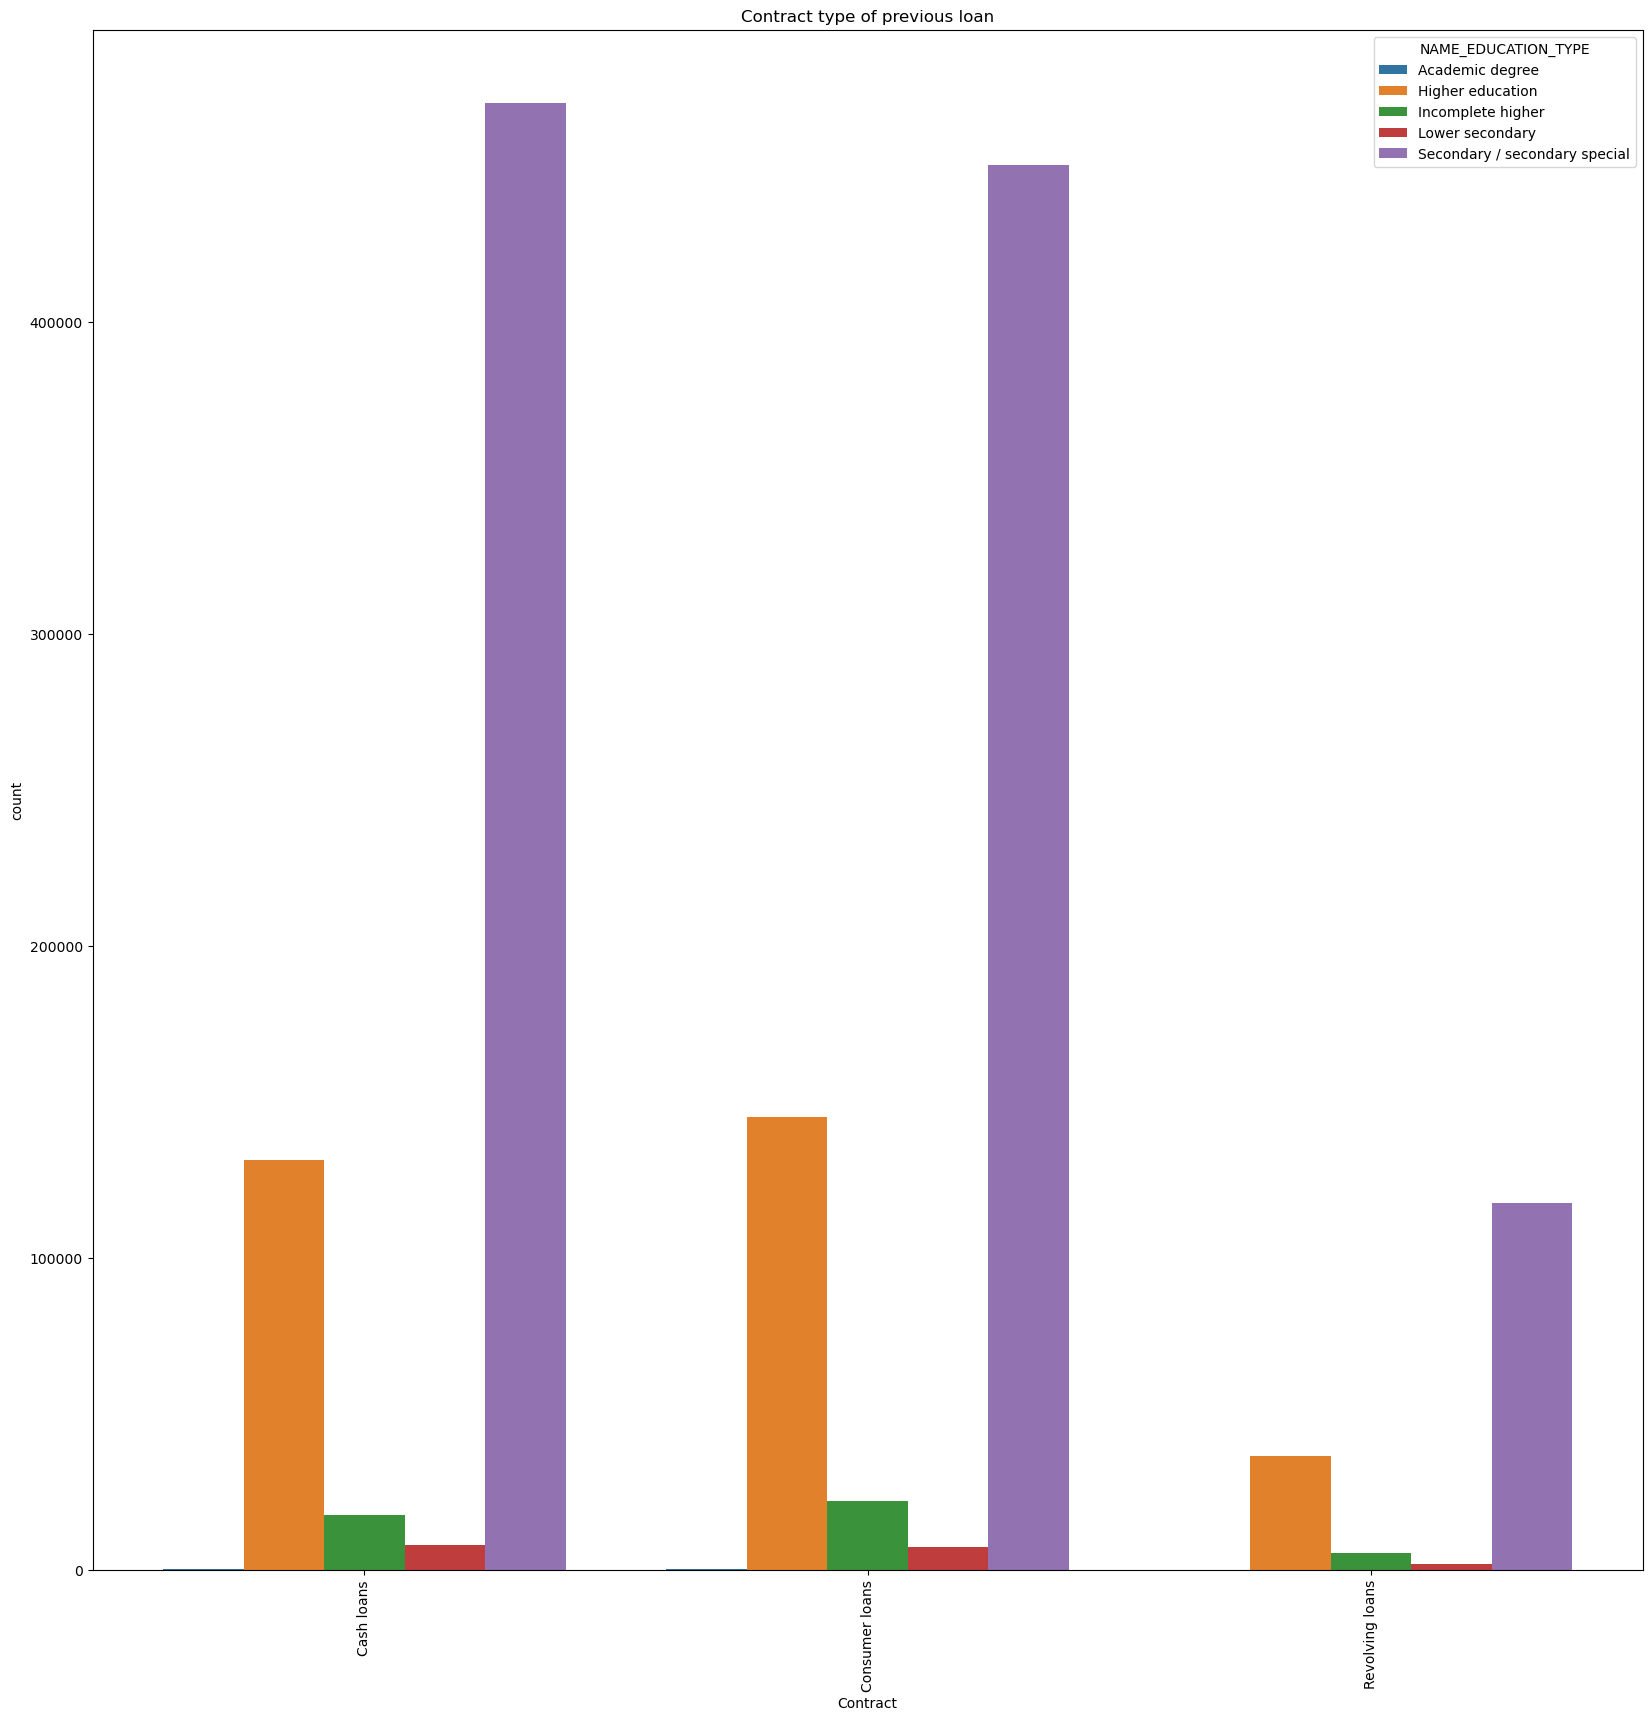

In [228]:
plt.figure(figsize=(20,20)) 

sns.countplot(data= final_df,x='NAME_CONTRACT_TYPE_y',hue="NAME_EDUCATION_TYPE")
plt.xlabel("Contract")
plt.title('Contract type of previous loan')   
plt.xticks(rotation=90)
# plt.savefig('ctrTypeEdu.png', bbox_inches='tight')

plt.plot()

People with Academic degree prefer Cash and consumer loan, if in case bank try to target that group they will have to make the changes based on these things.

[]

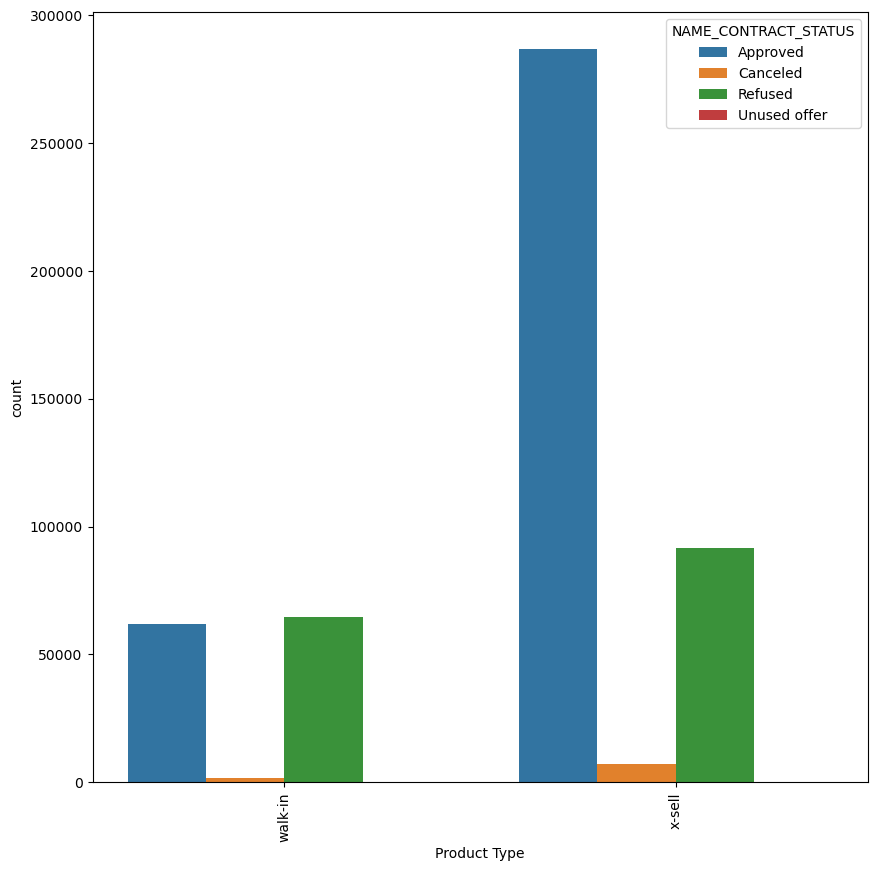

In [230]:
plt.figure(figsize=(10,10)) 

Not_XNA = final_df[final_df['NAME_PRODUCT_TYPE'] != 'XNA']
ax = sns.countplot(data= Not_XNA,x='NAME_PRODUCT_TYPE',hue="NAME_CONTRACT_STATUS")
plt.xlabel("Product Type")
plt.xticks(rotation=90)
# plt.savefig('Prod.png', bbox_inches='tight')

plt.plot()

The x-sell category was the most preferable category. 

[]

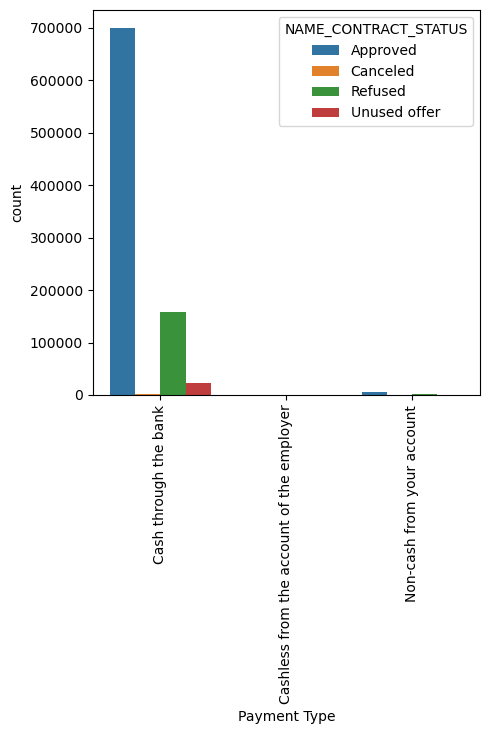

In [232]:
plt.figure(figsize=(5,5)) 

Not_XNA = final_df[final_df['NAME_PAYMENT_TYPE'] != 'XNA']
ax = sns.countplot(data= Not_XNA,x='NAME_PAYMENT_TYPE',hue="NAME_CONTRACT_STATUS")
plt.xlabel("Payment Type")
plt.xticks(rotation=90)
# plt.savefig('PMT.png', bbox_inches='tight')

plt.plot()

Clients preferred to opt in for Cash payment mode to pay the loan amount.

[]

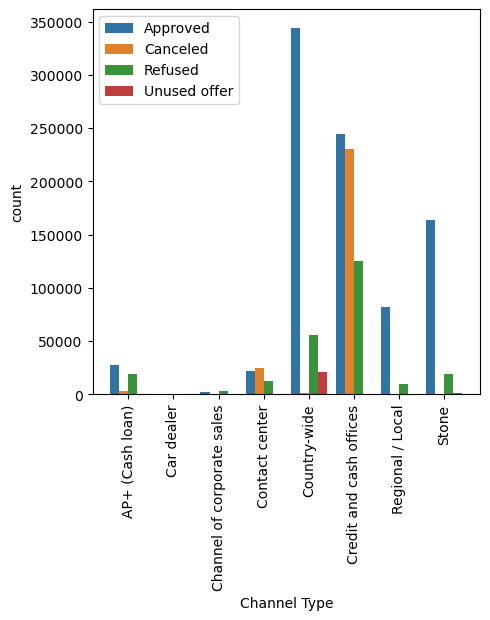

In [234]:
plt.figure(figsize=(5,5)) 

# Not_XNA = final_df[final_df['NAME_PAYMENT_TYPE'] != 'XNA']
sns.countplot(data= final_df,x='CHANNEL_TYPE',hue="NAME_CONTRACT_STATUS")
plt.xlabel("Channel Type")
plt.xticks(rotation=90)
plt.legend(loc='upper left')
# plt.savefig('CHNL.png', bbox_inches='tight')

plt.plot()

Most of the clients were occupied through the Credit and cash officies

[]

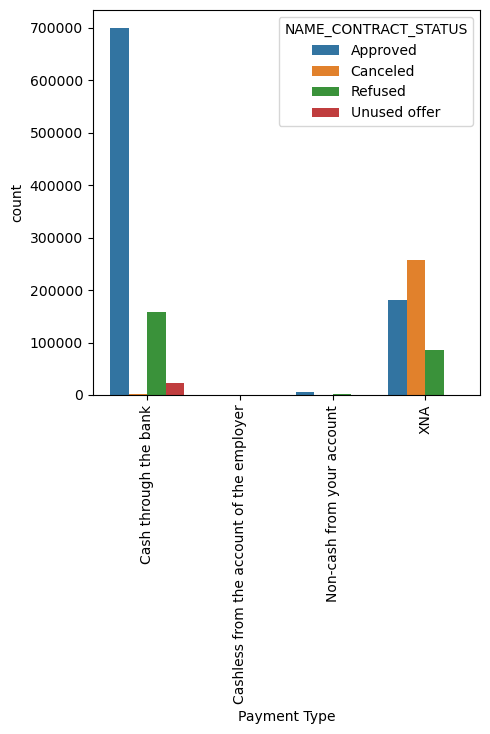

In [236]:
plt.figure(figsize=(5,5)) 

sns.countplot(data= final_df,x='NAME_PAYMENT_TYPE',hue="NAME_CONTRACT_STATUS")
plt.xlabel("Payment Type")
plt.xticks(rotation=90)
# plt.savefig('PmtCtrSts.png', bbox_inches='tight')

plt.plot()

[]

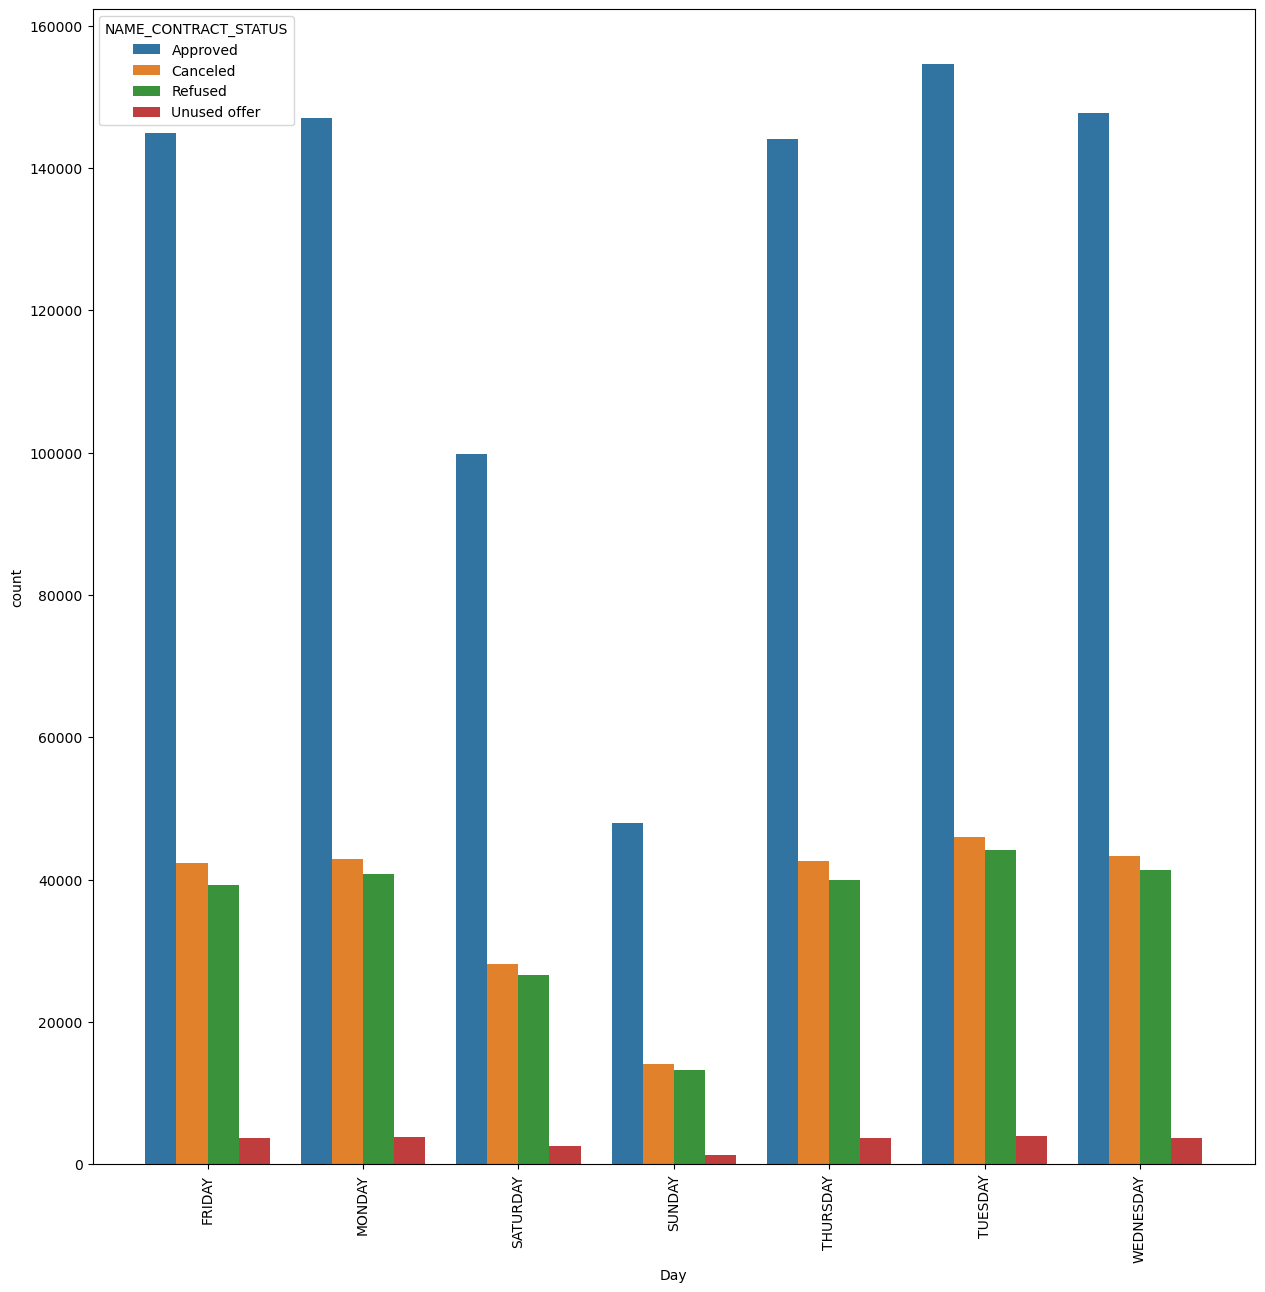

In [237]:
plt.figure(figsize=(15,15)) 

sns.countplot(x='WEEKDAY_APPR_PROCESS_START_x', hue='NAME_CONTRACT_STATUS', data=final_df)
plt.xlabel("Day")
plt.xticks(rotation=90)
plt.plot()

[]

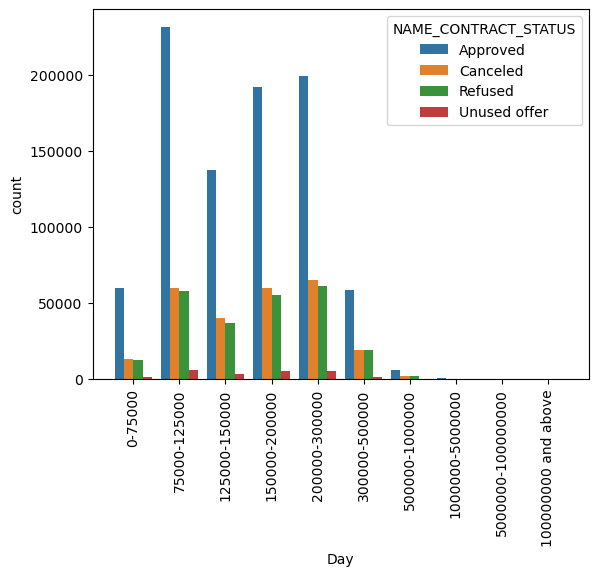

In [238]:
sns.countplot(x='AMT_INCOME_RANGE1', hue='NAME_CONTRACT_STATUS', data=final_df)
plt.xlabel("Day")
plt.xticks(rotation=90)
plt.plot()

[]

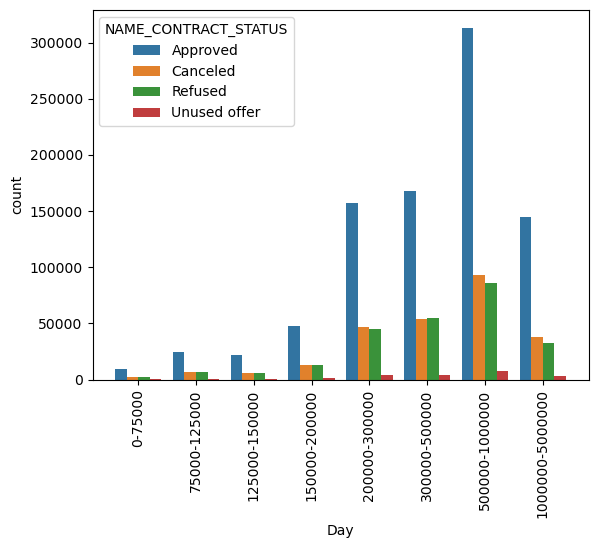

In [239]:
sns.countplot(x='AMT_CREDIT1', hue='NAME_CONTRACT_STATUS', data=final_df)
plt.xlabel("Day")
plt.xticks(rotation=90)
plt.plot()

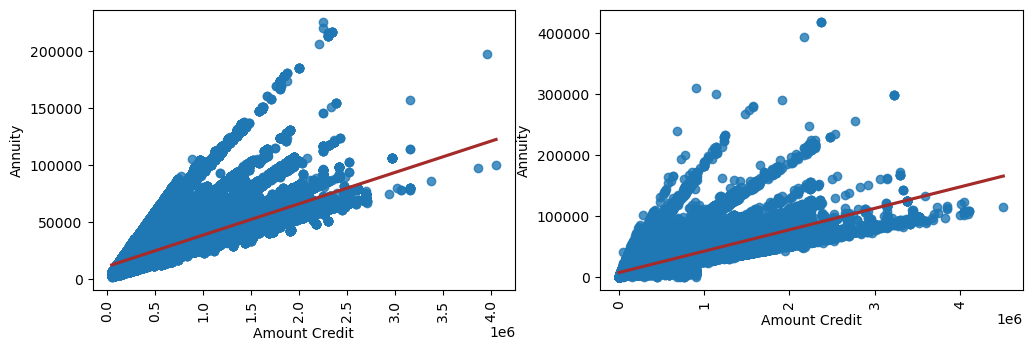

In [240]:
plt.figure(figsize=(12,8)) 

plt.subplot(221)
ax = sns.regplot(data= final_df,x='AMT_CREDIT_x',y='AMT_ANNUITY_x',line_kws= {"color": "brown"})
plt.xlabel("Amount Credit")
plt.ylabel("Annuity")
plt.xticks(rotation=90)

plt.subplot(222)
ax = sns.regplot(data= final_df,x='AMT_CREDIT_y',y='AMT_ANNUITY_y',line_kws= {"color": "brown"})
plt.xlabel("Amount Credit")
plt.ylabel("Annuity")
plt.xticks(rotation=90)

# plt.savefig('Credit_Prev_Current.png', bbox_inches='tight')

plt.show()

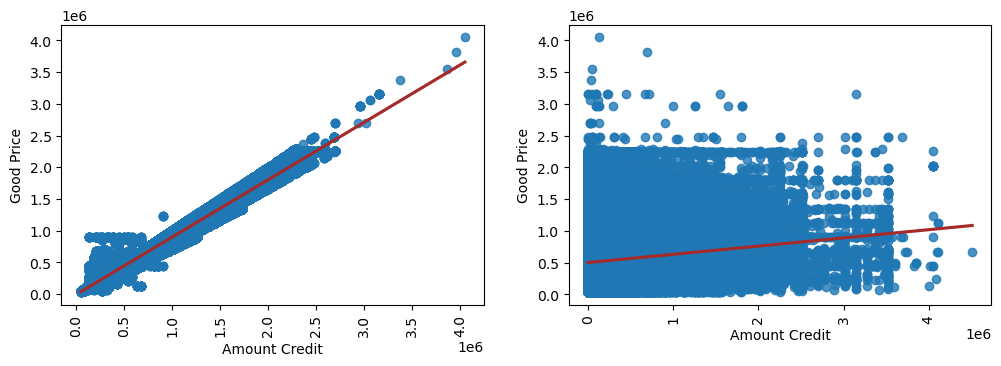

In [241]:
plt.figure(figsize=(12,8)) 

plt.subplot(221)
ax = sns.regplot(data= final_df,x='AMT_CREDIT_x',y='AMT_GOODS_PRICE_x',line_kws= {"color": "brown"})
plt.xlabel("Amount Credit")
plt.ylabel("Good Price")
plt.xticks(rotation=90)

plt.subplot(222)
ax = sns.regplot(data= final_df,x='AMT_CREDIT_y',y='AMT_GOODS_PRICE_x',line_kws= {"color": "brown"})
plt.xlabel("Amount Credit")
plt.ylabel("Good Price")
plt.xticks(rotation=90)

# plt.savefig('Credit_Prev_Current_Goods.png', bbox_inches='tight')


plt.show()

In [242]:
final_df['TARGET'] = pd.to_numeric(final_df['TARGET'])

In [243]:
final_df.groupby('NAME_CONTRACT_STATUS')['TARGET'].mean()

NAME_CONTRACT_STATUS
Approved        0.075887
Canceled        0.091736
Refused         0.119964
Unused offer    0.082517
Name: TARGET, dtype: float64

## Summary

1. The data is Imbalance with 8% of records facing payment difficulties 
2. Laborers faced the most difficulties while paying the loan credit 
3. Most of the people preferred to have a cash loan rather than revolving loan 
4. Females will mostly likely to reapply for the loan 
5. The person who owns house faced more difficulties with the payment. 
6. People with secondary Education are more likely to reapply, but Academic Degree has relatively almost no issue facing payment difficulties. 
7. Married people are the one who applies more for the loan. 
8. Most of the loan application got rejected at XAP 
9. Clients preferred to opt in for Cash payment mode to pay the loan amount.
10. Most of the clients aged  between 30 to 45.
11. DAYS_EMPLOYED & YEAR_EMPLOYED, DAYS_BIRTH & YEAR_BIRTH, DAYS_REGISTRATION & YEAR_REGISTRATION, DAYS_ID_PUBLISH & YEAR_ID_PUBLISH, and AMT_CREDIT & AMT_GOODSPRICE are correlated. If the other member increases, the pair will increase as well.
12. Loan acceptance rates are highest for families with up to three members.
13. A person with no more than two children is more likely to get their loan authorised.
14. The x-sell category was the preferred option.
15. Most applications are repeaters.
16. During the cross application processing (XAP), the majority of loan applications were refused.

## Conclusion

1. Bank should start prioritize client retention by enhancing policies and tactics, as the majority of applicants are repeat customers.
2. They should also begin the Streamline XAP procedure, as the majority of loan applications were denied, which might result in greater acceptance rates and increased customer satisfaction.
3. Make cash loans more appealing and create more flexible payment choices.
4. They should target certain consumer demographics, primarily those aged 30 to 45, and offer greater customization options for loans. Professional graduates should also be targeted because they have a higher rate of loan approval.
5. The bank may consider providing financial education or support programs to assist customers who have payment challenges, such as laborers and homeowners.
6. The bank should priorities cross-selling additional products and services to existing customers, particularly those who already have a loan with them. This method can help the bank generate more revenue from existing customers.
7. Loans are more likely to be accepted for families with up to three people and no more than two children; banks might create focused marketing and financing packages for these households to enhance loan uptake.
